In [1]:
import pandas as pd
import numpy as np

In [33]:
#Establemos que el maximo de filas al imprimir el dataset no tenga limite. Esto significa que si el dataset tiene 15.000 filas, imprimira todas

pd.options.display.max_columns = None
pd.options.display.max_rows = None

# **Primera parte**

### **Carga de datos**

In [ ]:
from pathlib import Path
data_path = Path('./nombre_de_carpeta')

In [ ]:
df =  pd.read_csv('Waltmart_products.csv')

In [ ]:
df = pd.read_csv(data_path/'Waltmart_products.csv')

### **pd.read_csv()**
- sep = Especifica el delimitador que se utiliza en el archivo CSV. El valor predeterminado es la coma (,), pero puedes especificar cualquier otro delimitador que se utilice en tu archivo.
- dtype={} Permite especificar el tipo de datos de las columnas mediante un diccionario {nombre:tipo}

- header = Especifica qué fila del archivo CSV se debe utilizar como encabezado. En este caso, la primera fila (0-indexada) se toma como encabezado.

- names= proporciona nombres de columnas si el archivo CSV no tiene encabezado meddiante una lista [nombre1, nombre2]

- skiprows= filas que se deben omitir durante la carga. Puede ser un numero entero o una lista [0, 2]

- index_col= especifica qué columna se debe utilizar como índice del DataFrame. Por defecto es None

- skip_blank_lines= determina si se deben omitir las líneas en blanco.Por defecto es True

- na_filter= controla si se deben detectar y eliminar valores NaN durante la lectura por defecto es False   

- encoding = se utiliza para especificar la codificación del archivo. Por defecto es "utf-8" pero pueden ser: ("latin-1", "utf-16", "ISO-8859-1")

### **Leer datos desde una URL**

In [ ]:
medals_url = "http://winterolympicsmedals.com/medals.csv"
df = pd.read_csv(medals_url)

#### **Descargar el dataset a una ruta especifica**

In [ ]:
def downloadFromURL(url, filename, sep = ",", delim = "\n", encoding="utf-8", 
                   mainpath = "/content/drive/My Drive/Curso Machine Learning con Python/datasets"):
    #primero importamos la librería y hacemos la conexión con la web de los datos
    import urllib3
    http = urllib3.PoolManager()
    r = http.request('GET', url)
    print("El estado de la respuesta es %d" %(r.status))
    response = r.data ## CORREGIDO: eliminado un doble decode que daba error
    
    #El objeto reponse contiene un string binario, así que lo convertimos a un string descodificándolo en UTF-8
    str_data = response.decode(encoding)

    #Dividimos el string en un array de filas, separándolo por intros
    lines = str_data.split(delim)

    #La primera línea contiene la cabecera, así que la extraemos
    col_names = lines[0].split(sep)
    n_cols = len(col_names)

    #Generamos un diccionario vacío donde irá la información procesada desde la URL externa
    counter = 0
    main_dict = {}
    for col in col_names:
        main_dict[col] = []

    #Procesamos fila a fila la información para ir rellenando el diccionario con los datos como hicimos antes
    for line in lines:
        #Nos saltamos la primera línea que es la que contiene la cabecera y ya tenemos procesada
        if(counter > 0):
            #Dividimos cada string por las comas como elemento separador
            values = line.strip().split(sep)
            #Añadimos cada valor a su respectiva columna del diccionario
            for i in range(len(col_names)):
                main_dict[col_names[i]].append(values[i])
        counter += 1

    print("El data set tiene %d filas y %d columnas"%(counter-1, n_cols))

    #Convertimos el diccionario procesado a Data Frame y comprobamos que los datos son correctos
    df = pd.DataFrame(main_dict)
    print(df.head())

    #Elegimos donde guardarlo (en la carpeta athletes es donde tiene más sentido por el contexto del análisis)
    fullpath = os.path.join(mainpath, filename)

    #Lo guardamos en CSV, en JSON o en Excel según queramos
    df.to_csv(fullpath+".csv")
    df.to_json(fullpath+".json")
    df.to_excel(fullpath+".xls")
    print("Los ficheros se han guardado correctamente en: "+fullpath)
    
    return df

In [ ]:
medals_df = downloadFromURL(medals_url, "athletes/downloaded_medals")
medals_df.head()

### **Otros tipos de lectura de archivos**

In [ ]:
df = pd.read_excel('nombre_del_archivo.xlsx', sheet_name="Nombre_de_hoja")

In [ ]:
df = pd.read_json('nombre_del_archivo')

### **Guardar un dataframe con la extension que necesitemos**

- En caso que necesitemos guardar en otro formato debe cambiarse "to_" y la extension del archivo. 
- El argumento index = False evita que se cree un indice numerico al guardarlo

In [ ]:
df.to_csv('ruta_del_archivo\.csv', index=False)

### **Conectarse a una base de datos**

### **PostegreSQL**

In [ ]:
import psycopg2

db_params = {
    'dbname': 'nombre_db',
    'user': 'usuario',
    'password': 'contraseña',
    'host': 'localhost',
    'port': '5432'}


connection = psycopg2.connect(**db_params)
cursor = connection.cursor()


cursor.close()
connection.close()




### **SQL Lite**

In [ ]:
import sqlite3

# Conexión a SQLite (crea la base de datos si no existe)
sqlite_connection = sqlite3.connect('nombre_db.sqlite')

# Crear un cursor
cursor = sqlite_connection.cursor()

# Realizar operaciones en la base de datos

# Cerrar la conexión
sqlite_connection.close()


### **MySQL**

In [ ]:
import mysql.connector


mysql_params = {
    'host': 'localhost',
    'user': 'usuario',
    'password': 'contraseña',
    'database': 'nombre_db'
}


try:
    mysql_connection = mysql.connector.connect(**mysql_params)
    mysql_cursor = mysql_connection.cursor()

    # Realizar operaciones en la base de datos

except Exception as e:
    print(f"Error: {e}")

finally:
    # Cerrar la conexión
    if mysql_connection:
        mysql_cursor.close()
        mysql_connection.close()
        print("Conexión cerrada")


## **Analisis exploratorio**

- La funcion "head" y "tail" muetran las primeras filas y ultimas filas respectivamente
- Reciben como argumento un numero entero que imprime la cantidad de filas. Por defecto es 5

In [267]:
df.head(3)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700


In [266]:
df.tail(3)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8520,NCJ29,10.60,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.21,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976
8522,DRG01,14.80,Low Fat,0.044878,Soft Drinks,75.4670,OUT046,1997,Small,Tier 1,Supermarket Type1,765.6700


##### El atributo "shape"la estructura del dataframe donde el primer elemento es la cantidad de filas y el segundo la cantidad de columnas

In [50]:
df.shape

(14204, 12)

##### El atributo dtypes imprime el tipo de dato que contienen las columnas

In [51]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

##### El metodo info nos brinda un brve informe sobre la cantidad de filas, columnas, tipo de dato y cantidad de elementos que no son nulos

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                11765 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                10188 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 1.3+ MB


### **describe()**
- Percentiles=[0.1, 0.5, 0.9] una lista con el minimo, medio y maximo
- include= "number" solamente para los datos de tipo numerico, "all" para todas las columnas

In [52]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,11765.000000,14204.000000,14204.000000,14204.000000,8523.000000
mean,12.792854,0.065953,141.004977,1997.830681,2181.288914
std,4.652502,0.051459,62.086938,8.371664,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.710000,0.027036,94.012000,1987.000000,834.247400
50%,12.600000,0.054021,142.247000,1999.000000,1794.331000
75%,16.750000,0.094037,185.855600,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [53]:
df.describe(include='all', percentiles=[0.1, 0.5, 0.9])

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
count,14204,11765.000000,14204,14204.000000,14204,14204.000000,14204,14204.000000,10188,14204,14204,8523.000000
unique,1559,NaN,5,NaN,16,NaN,10,NaN,3,3,4,NaN
top,FDU15,NaN,Low Fat,NaN,Fruits and Vegetables,NaN,OUT027,NaN,Medium,Tier 3,Supermarket Type1,NaN
freq,10,NaN,8485,NaN,2013,NaN,1559,NaN,4655,5583,9294,NaN
mean,NaN,12.792854,NaN,0.065953,NaN,141.004977,NaN,1997.830681,NaN,NaN,NaN,2181.288914
std,NaN,4.652502,NaN,0.051459,NaN,62.086938,NaN,8.371664,NaN,NaN,NaN,1706.499616
min,NaN,4.555000,NaN,0.000000,NaN,31.290000,NaN,1985.000000,NaN,NaN,NaN,33.290000
10%,NaN,6.655000,NaN,0.011797,NaN,53.230580,NaN,1985.000000,NaN,NaN,NaN,343.552800
50%,NaN,12.600000,NaN,0.054021,NaN,142.247000,NaN,1999.000000,NaN,NaN,NaN,1794.331000
90%,NaN,19.350000,NaN,0.137645,NaN,231.166800,NaN,2009.000000,NaN,NaN,NaN,4570.051200


### **unique()** y **nunique()**

- unique(): Imprime los valores unicos de la columna seleccionada, mostrandolos como estan registrados en el dataframe
- nunique() : Cumple la misma funcion exceptuando que devuelve un numero entero con la cantidad de valores unicos

In [330]:
df['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [331]:
df['Item_Fat_Content'].nunique()

5

### **Valores faltantes**

### **isnull()** | **isna()**
Las funciones y devuelven un dataframe con "True" para los valores nulos y "False"


In [9]:
df.isnull().head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,True,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False


In [268]:
df.isna().head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False


### **notnull()** | **notna()** 
Devuelve un dataframe con "True" para los valores no nulos y "False" para los que si lo son

In [8]:
df.notnull().head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,True,True,True,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,False,True,True,True
4,True,True,True,True,True,True,True,True,True,True,True,True


In [6]:
df.notna().head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,True,True,True,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,False,True,True,True
4,True,True,True,True,True,True,True,True,True,True,True,True


Utilizamos la funcion sum() para que sume la cantidad total de valores nulos por columna

In [55]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
dtype: int64

Si guardamos el resultado de la funcion isnull() o notnull() aplicado a una columna en una varible y la filtramos nos devolvera un dataframe con los valores concretos

In [269]:
valores_nulos = df['Item_Outlet_Sales'].isnull()
df[valores_nulos].head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales


###  **dropna()**
Se utiliza para eliminar filas o columnas que contienen valores nulos

- axis: Puede ser 0 o 1 (por defecto es 0). Si axis=0, se eliminan las filas que contienen al menos un valor nulo. Si axis=1, se eliminan las columnas que contienen al menos un valor nulo.

- how: Puede ser 'any' (por defecto) o 'all'.

- Si es 'any', se elimina la fila o columna si hay al menos un valor nulo.Si es 'all', se elimina la fila o columna solo si todos los valores son nulos.
- subset: Lista de etiquetas o índices que se deben considerar.
-  axis=0 elimina las filas, axis = 1 elimina las columnas. Por defecto es 0
- inplace: Si es True, los cambios se realizan directamente en el DataFrame original y no se devuelve un nuevo DataFrame. Si es False (por defecto), se devuelve un nuevo DataFrame sin modificar el original.
- thresh: Este argumento acepta un entero. Solo se eliminarán las filas o columnas que tengan menos valores no nulos que el umbral especificado. Es decir, si thresh=3, se eliminarán las filas o columnas que tengan menos de tres valores no nulos.

In [5]:
df.dropna(axis=0, subset='Item_Outlet_Sales', inplace=False).head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


### **fillna()**
Se utiliza para llenar los valores nulos (NaN) en un DataFrame o Serie con un valor específico o utilizando varios métodos de interpolación.

El valor que se utilizará para rellenar los valores nulos. Puede ser un escalar, un diccionario, una Serie o un DataFrame. Si no se proporciona, se utilizarán otros argumentos como method o axis para determinar cómo llenar los valores nulos. Pueden ser valores de tipo entero, flotante, booleanos o sting


- method: Puede ser None (por defecto) o uno de los siguientes:

-'bfill': Usa el siguiente valor no nulo para rellenar los valores nulos.
-'ffill': Usa el valor anterior no nulo para rellenar los valores nulos.
- axis: Puede ser 0 o 1. Si axis=0, se llenarán los valores nulos a lo largo de las filas

In [87]:
ejemplo = df['Item_Outlet_Sales'].fillna('Valor reemplazado')
ejemplo

0                 3735.138
1                 443.4228
2                  2097.27
3                   732.38
4                 994.7052
               ...        
14199    Valor reemplazado
14200    Valor reemplazado
14201    Valor reemplazado
14202    Valor reemplazado
14203    Valor reemplazado
Name: Item_Outlet_Sales, Length: 14204, dtype: object

##### Tambien los valores nulos se pueden rellenar utilizando funciones tales como mean(), median(), mode(). std()

In [90]:
promedio = df['Item_Outlet_Sales'].mean()

print(f"El valor promedio de la columna seleccionada es: {promedio} ")

ejemplo_2 = df['Item_Outlet_Sales'].fillna(promedio)
ejemplo_2

El valor promedio de la columna seleccionada es: 2181.288913575032 


0        3735.138000
1         443.422800
2        2097.270000
3         732.380000
4         994.705200
            ...     
14199    2181.288914
14200    2181.288914
14201    2181.288914
14202    2181.288914
14203    2181.288914
Name: Item_Outlet_Sales, Length: 14204, dtype: float64

In [93]:
mediana = df['Item_Outlet_Sales'].median()

print(f"El valor promedio de la columna seleccionada es: {mediana} ")

ejemplo_3 = df['Item_Outlet_Sales'].fillna(mediana)

ejemplo_3

El valor promedio de la columna seleccionada es: 1794.331 


0        3735.1380
1         443.4228
2        2097.2700
3         732.3800
4         994.7052
           ...    
14199    1794.3310
14200    1794.3310
14201    1794.3310
14202    1794.3310
14203    1794.3310
Name: Item_Outlet_Sales, Length: 14204, dtype: float64

### **value_counts()**

normalize = True devuelve las frecuencias relativas (proporciones) en lugar de las frecuencias absolutas. Por defecto, es False.

sort = True (Por defecto) ordena las etiquetas por frecuencia en orden descendente. Si es False, devuelve los resultados sin ordenar

ascending: Si sort es True, este parámetro controla el orden de clasificación. Si es True (por defecto), ordena en orden descendente. Si es False, ordena en orden ascendente.

bins: Solo para datos numéricos. Divide los datos en intervalos y cuenta la frecuencia de cada intervalo.

dropna: Si es True (por defecto), excluye los valores nulos de los resultados. Si es False, incluirá los valores nulos en los resultados.

In [94]:
df['Outlet_Establishment_Year'].value_counts()

1985    2439
1987    1553
1999    1550
1997    1550
2004    1550
2002    1548
2009    1546
2007    1543
1998     925
Name: Outlet_Establishment_Year, dtype: int64

In [96]:
df['Outlet_Establishment_Year'].value_counts(normalize=True, ascending=True)

1998    0.065123
2007    0.108631
2009    0.108843
2002    0.108983
1999    0.109124
1997    0.109124
2004    0.109124
1987    0.109335
1985    0.171712
Name: Outlet_Establishment_Year, dtype: float64

## **Indexacion y filtrado**

### **set_index()**
Sirve para seleccionar las columnas que queremos establecer como indice. Estoy se complementa muy bien con la funcion "loc" para el filtrado de datos

- inplace = True. Realiza los cambios permanentemente por defecto es False

- drop = True elimina la columna al realizar la indexacion. Caso contrario mantiene un duplicado. Por defecto es True

In [153]:
df.set_index('Item_Identifier').head(3)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
Item_Identifier,,,,,,,,,,,
FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Valor_reemplazado,Tier 1,Supermarket Type1,2097.2700


In [156]:
df.set_index(['Outlet_Type','Item_Identifier'], drop=False).head(3)

,,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
Outlet_Type,Item_Identifier,,,,,,,,,,,,
Supermarket Type1,FDA15,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
Supermarket Type2,DRC01,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
Supermarket Type1,FDN15,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Valor_reemplazado,Tier 1,Supermarket Type1,2097.2700


### **reset_index()**
Reestablece el valor del o de los indices. 
- En caso que usemos el indice por defecto reestablece el conteo de menor a mayor

- Si estamos utilizando columnas como indices, estas volveran a su lugar original

- inplace =  True. Conserva los cambios realizados, de lo contrario devolvera solo la muestra. Por defecto False

- drop = True evita que se cree un duplicado o se matenga el original

In [178]:
index = df.iloc[300:500]
index.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
373,FDX09,9.000,Low Fat,0.065237,Snack Foods,176.4370,OUT035,2004,Small,Tier 2,Supermarket Type1,7763.2280
374,FDO51,6.785,Regular,0.041948,Meat,41.2112,OUT013,1987,High,Tier 3,Supermarket Type1,809.6128
375,FDW49,19.500,Low Fat,0.082888,Canned,178.6002,OUT018,2009,Medium,Tier 3,Supermarket Type2,1253.7014
376,FDB27,7.575,Low Fat,0.055390,Dairy,195.2768,OUT046,1997,Small,Tier 1,Supermarket Type1,5715.2272
377,FDF45,18.200,Regular,0.012195,Fruits and Vegetables,57.7904,OUT013,1987,High,Tier 3,Supermarket Type1,1464.7600


In [179]:
index.reset_index(inplace=True,drop=True)
index.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDX09,9.000,Low Fat,0.065237,Snack Foods,176.4370,OUT035,2004,Small,Tier 2,Supermarket Type1,7763.2280
1,FDO51,6.785,Regular,0.041948,Meat,41.2112,OUT013,1987,High,Tier 3,Supermarket Type1,809.6128
2,FDW49,19.500,Low Fat,0.082888,Canned,178.6002,OUT018,2009,Medium,Tier 3,Supermarket Type2,1253.7014
3,FDB27,7.575,Low Fat,0.055390,Dairy,195.2768,OUT046,1997,Small,Tier 1,Supermarket Type1,5715.2272
4,FDF45,18.200,Regular,0.012195,Fruits and Vegetables,57.7904,OUT013,1987,High,Tier 3,Supermarket Type1,1464.7600


In [173]:
df_indexado = df.set_index(['Item_Identifier','Item_Fat_Content'])
df_indexado.head(3)

,,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
Item_Identifier,Item_Fat_Content,,,,,,,,,,
FDA15,Low Fat,9.30,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
DRC01,Regular,5.92,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
FDN15,Low Fat,17.50,0.016760,Meat,141.6180,OUT049,1999,Valor_reemplazado,Tier 1,Supermarket Type1,2097.2700


In [175]:
df_indexado = df_indexado.reset_index()
df_indexado.head()

,Item_Identifier,Item_Fat_Content,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,Low Fat,9.30,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,Regular,5.92,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,Low Fat,17.50,0.016760,Meat,141.6180,OUT049,1999,Valor_reemplazado,Tier 1,Supermarket Type1,2097.2700
3,FDX07,Regular,19.20,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,Low Fat,8.93,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


### **Filtracion por booleanos**
- Debemos crear una condicion en la cual el resultado sea True o False, guardarla en una variable y utilizarla como mascara para realizar el filtro

In [181]:
condicion = df['Item_Fat_Content'] == 'Regular'
condicion

0        False
1         True
2        False
3         True
4        False
         ...  
14199     True
14200     True
14201    False
14202     True
14203     True
Name: Item_Fat_Content, Length: 11765, dtype: bool

In [182]:
df[condicion].head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986


In [187]:
condicion_2 = df['Outlet_Location_Type'].isin(['Tier 3','Tier 2'])
condicion_2.head()

0    False
1     True
2    False
3     True
4     True
Name: Outlet_Location_Type, dtype: bool

In [188]:
df[condicion_2].head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528


## **Metodos str**

### **contains()**

- pat (patrón): Este es el patrón que estás buscando en cada elemento de la Serie. Puede ser una cadena o una expresión regular según el valor del argumento regex.

- case (distinguir mayúsculas y minúsculas): Es un booleano que indica si la búsqueda debe ser sensible a mayúsculas y minúsculas. Si está configurado en True, distingue entre mayúsculas y minúsculas; si está configurado en False, la búsqueda es insensible a mayúsculas y minúsculas.

- flags (indicadores): Este argumento se usa cuando regex=True. Puede tomar varios valores, como re.IGNORECASE para hacer la búsqueda insensible a mayúsculas y minúsculas u otros indicadores de expresiones regulares.

- na (valor de NA): Este es el valor que se utilizará para rellenar los elementos que son valores NaN (por defecto, nan).

- regex (expresión regular): Es un booleano que indica si el patrón proporcionado debe ser interpretado como una expresión regular. Si está configurado en True, pat se tratará como una expresión regular; si está configurado en False, se tratará como una cadena literal.

En este caso buscamamos valores string "Soft" dentro de la columa "Item_type"

In [372]:
str_col = df.loc[:,['Item_Type','Outlet_Establishment_Year']]

In [373]:
contains_soft = str_col['Item_Type'].str.contains('Soft')
str_col[contains_soft].head()


,Item_Type,Outlet_Establishment_Year
1,Soft Drinks,2009
34,Soft Drinks,1997
37,Soft Drinks,2009
68,Soft Drinks,2002
92,Soft Drinks,2002


### **count()**
Cuenta la cantidad de caracteres que contiene un determinado valor por fila

- flags (indicadores): Este argumento se usa cuando regex=True. Puede tomar varios valores, como re.IGNORECASE para hacer la búsqueda insensible a mayúsculas y minúsculas u otros indicadores de expresiones regulares.

In [362]:
count_a = str_col['Item_Type'].str.count('a')
count_a.to_frame(name='Count_a')

,Count_a
0,1
1,0
2,1
3,2
4,0
...,...
14199,1
14200,1
14201,2
14202,1


### **startwith()**
Devuelve todos los valores que comiencen con la letra que le brindemos en el argumento, en este caso es la letra S. Tener cuidado porque es "case sensitve"

In [374]:
start_with = str_col['Item_Type'].str.startswith('S')
str_col[start_with].head()

,Item_Type,Outlet_Establishment_Year
1,Soft Drinks,2009
6,Snack Foods,1987
7,Snack Foods,1985
13,Snack Foods,1997
20,Snack Foods,1987


In [378]:
start_with = str_col['Item_Type'].str.startswith('s')
str_col[start_with].head()

,Item_Type,Outlet_Establishment_Year


### **endstwith()**
Devuelve todos los valores que comiencen con la letra que le brindemos en el argumento, en este caso es la letra S. Tener cuidado porque es "case sensitve"

In [377]:
ends_with = str_col['Item_Type'].str.endswith('s')
str_col[ends_with].head()

,Item_Type,Outlet_Establishment_Year
1,Soft Drinks,2009
3,Fruits and Vegetables,1998
5,Baking Goods,2009
6,Snack Foods,1987
7,Snack Foods,1985


In [379]:
ends_with = df['Item_Type'].str.endswith('S')
str_col[ends_with].head()

,Item_Type,Outlet_Establishment_Year


### **get()**
Esta funcion extrae el caracter segun la indexacion del string. Por ejemplo: Si la palabra es FRUTA y le pasamos el argumento 1, nos devolvera R

In [387]:
str_col.head()

,Item_Type,Outlet_Establishment_Year
0,Dairy,1999
1,Soft Drinks,2009
2,Meat,1999
3,Fruits and Vegetables,1998
4,Household,1987


In [386]:
first_letter = str_col['Item_Type'].str.get(0)
first_letter.to_frame()

,Item_Type
0,D
1,S
2,M
3,F
4,H
...,...
14199,S
14200,S
14201,H
14202,C


### **extract()**
Se utiliza para extraer patrones coincidentes con expresiones regulares en cada elemento de una Serie que contiene cadenas de texto. 

- flags=0: Este argumento se utiliza cuando se usan expresiones regulares y representa los indicadores de expresiones regulares. En este caso, flags=0 significa que no se están utilizando indicadores adicionales.

- expand=True: Este argumento determina si expandir el resultado a un DataFrame (True) o devolver una Serie (False). En tu caso, expand=True indica que deseas que el resultado se expanda a un DataFrame.

In [446]:
reg_e = df[['Fat_Size',	'Item_Identifier']] + "!!"

In [450]:
extracted= reg_e['Item_Identifier'].str.extract(r'(.*)!!',expand=True)
extracted

,0
0,FDA15
1,DRC01
2,FDN15
3,FDX07
4,NCD19
...,...
14199,FDB58
14200,FDD47
14201,NCO17
14202,FDJ26


### **str.extractall()**
Devuelve todas las coincidencias de la expresión regular en cada elemento de la Serie. Crea un índice de nivel superior que representa la posición de la coincidencia y devuelve un DataFrame con tantas filas como coincidencias.

In [452]:
reg_e['Fat_Size'].str.extractall(r'(.*)!!')

,,0
,match,
0,0,Medium/ Low Fat
1,0,Medium/ Regular
2,0,Medium/ Low Fat
4,0,High/ Low Fat
5,0,Medium/ Regular
...,...,...
14196,0,Medium/ Low Fat
14197,0,Small/ Low Fat
14198,0,Medium/ Regular


### **Selecciones de columnas**

In [97]:
df[['Item_Weight','Item_Fat_Content']]

,Item_Weight,Item_Fat_Content
0,9.30,Low Fat
1,5.92,Regular
2,17.50,Low Fat
3,19.20,Regular
4,8.93,Low Fat
...,...,...
14199,10.50,Regular
14200,7.60,Regular
14201,10.00,Low Fat
14202,15.30,Regular


### **Selecciones de columnas y filas**

In [416]:
df[['Item_Weight','Item_Fat_Content']][:5]

,Item_Weight,Item_Fat_Content
0,9.30,Low Fat
1,5.92,Regular
2,17.50,Low Fat
3,19.20,Regular
4,8.93,Low Fat


### **Metodo iloc y loc**
Sirven para filtrar las columnas acorde a su numero de indice y los nombres de filas y columnas respectivamente.

- Si usamos el metodo iloc siempre seran valores enteros ya que correspoden a los indices

- Si usamos el metodo loc siempre filtraremos por el tipo de valor, ya sea booleano, float,string, etc 

- La estructura siempre sera primero las filas y despues las columnas al igual que el "slicing" tradicional de python

In [109]:
df.loc[50:100, ['Item_Visibility','Item_Fat_Content']]

,Item_Visibility,Item_Fat_Content
50,0.067780,Low Fat
51,0.159804,Low Fat
52,0.028697,Regular
53,0.065042,Low Fat
54,0.028760,Low Fat
...,...,...
96,0.131384,Low Fat
97,0.074613,Regular
98,0.028460,Low Fat
99,0.074627,Regular


In [115]:
df.iloc[0:50, 0:3].head()

,Item_Identifier,Item_Weight,Item_Fat_Content
0,FDA15,9.30,Low Fat
1,DRC01,5.92,Regular
2,FDN15,17.50,Low Fat
3,FDX07,19.20,Regular
4,NCD19,8.93,Low Fat


### **Utilizando listas podemos seleccionar columnas y filas especificas**

In [117]:
df.iloc[[1,20,100], [2,4,5]]

,Item_Fat_Content,Item_Type,Item_MRP
1,Regular,Soft Drinks,48.2692
20,Regular,Snack Foods,250.8724
100,Low Fat,Frozen Foods,151.0708


In [198]:
df.loc[df['Outlet_Establishment_Year'] == 1999].head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.3,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
2,FDN15,17.5,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Valor_reemplazado,Tier 1,Supermarket Type1,2097.2700
10,FDY07,11.8,Low Fat,0.000000,Fruits and Vegetables,45.5402,OUT049,1999,Medium,Tier 1,Supermarket Type1,1516.0266
12,FDX32,15.1,Regular,0.100014,Fruits and Vegetables,145.4786,OUT049,1999,Medium,Tier 1,Supermarket Type1,1589.2646
17,FDP49,9.0,Regular,0.069196,Breakfast,54.3614,OUT049,1999,Medium,Tier 1,Supermarket Type1,718.3982


##### Podemos establecer todas las condiciones que deseemos utilizando los operadores de python siempre y cuando se encuentren entre parentesis
- "and"( & ), "or" ( | )  
-  Mayor >, Mayor igual >=
-  Menor < , Menor <=

In [199]:
df.loc[(df['Item_Type']== 'Meat') | (df['Outlet_Location_Type'] =='Tier 1')].head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.3,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
2,FDN15,17.5,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Valor_reemplazado,Tier 1,Supermarket Type1,2097.2700
10,FDY07,11.8,Low Fat,0.000000,Fruits and Vegetables,45.5402,OUT049,1999,Medium,Tier 1,Supermarket Type1,1516.0266
11,FDA03,18.5,Regular,0.045464,Dairy,144.1102,OUT046,1997,Small,Tier 1,Supermarket Type1,2187.1530
12,FDX32,15.1,Regular,0.100014,Fruits and Vegetables,145.4786,OUT049,1999,Medium,Tier 1,Supermarket Type1,1589.2646


In [112]:
df.loc[(df['Item_Type']== 'Meat') & (df['Outlet_Location_Type'] =='Tier 1')].head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
89,FDN27,20.850,Low Fat,0.039624,Meat,117.2808,OUT049,1999,Medium,Tier 1,Supermarket Type1,1523.3504
112,FDW39,NaN,Regular,0.064625,Meat,176.9370,OUT019,1985,Small,Tier 1,Grocery Store,176.4370
164,FDW51,6.155,Regular,0.094660,Meat,214.5560,OUT046,1997,Small,Tier 1,Supermarket Type1,2769.7280
190,FDV15,10.300,Low Fat,0.146400,Meat,103.9648,OUT049,1999,Medium,Tier 1,Supermarket Type1,1661.8368


### **Drop()**
La función drop() se utiliza para eliminar filas o columnas
- labels: Nombre o lista de nombres de etiquetas para eliminar (puede ser una fila o una columna).

- axis: Eje a lo largo del cual eliminar (0 para filas, 1 para columnas).

- index: Alias de labels, más utilizado para claridad.

- columns: Alias de labels, más utilizado para claridad.

- level: Para DataFrames con MultiIndex, elimina a lo largo de un nivel específico.

- inplace: Si es True, realiza la eliminación directamente en el DataFrame original; de lo contrario, devuelve una copia con las eliminaciones.

- errors: Si es 'raise', genera un error si las etiquetas no se encuentran en el DataFrame; si es 'ignore', elimina todas las etiquetas proporcionadas, ignorando las que no se encuentran.

### **Eliminacion de columnas**

In [202]:
df.drop(columns=['Item_Identifier',	'Item_Weight'], axis=1).head()

,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Valor_reemplazado,Tier 1,Supermarket Type1,2097.2700
3,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


### **Eliminacion por indice**

In [201]:
df.drop([0,4]).head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Valor_reemplazado,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528


### **Eliminacion de elementos filtrados**


In [207]:
df.drop(df[df['Outlet_Establishment_Year'] == 1985].index).head() # - Debemos especificar el agumento "inplace" = "True" para conservar los cambios

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


## **Manipulacion de columnas**

### **rename()**
Se utiliza para cambiar el nombre de columnas o índices
- mapper: Diccionario o función para mapear nuevos nombres a los antiguos. Puede ser un diccionario de la forma {nombre_viejo: nombre_nuevo} o una función que toma el nombre antiguo y devuelve el nuevo.

- index: Diccionario o función para mapear nuevos nombres a los índices.

- columns: Diccionario o función para mapear nuevos nombres a las columnas.

- axis: Eje a renombrar (0 para índices, 1 para columnas).

- copy: Si es True, devuelve una copia del DataFrame con los cambios; si es False, realiza los cambios en el lugar.

- inplace: Si es True, realiza los cambios en el lugar en el DataFrame original.

- level: Si el DataFrame tiene índices jerárquicos (MultiIndex), especifica el nivel al que se aplica el cambio de nombre.

In [284]:
col_re = df.rename({'Item_Fat_Content':'Columna_renombrada 2', 'Item_Visibility':'Columna_renombrada 3'},axis=1).head()
col_re.iloc[:,[2,3]]

,Columna_renombrada 2,Columna_renombrada 3
0,Low Fat,0.016047
1,Regular,0.019278
2,Low Fat,0.016760
3,Regular,0.000000
4,Low Fat,0.000000


In [288]:
nuevos_nombres = ['Columna_renombrada 5', 'Columna_renombrada 6']

col_re = df.rename(columns=dict(zip(df.columns[5:7], nuevos_nombres))).head()

col_re.iloc[:,5:7]

,Columna_renombrada 5,Columna_renombrada 6
0,249.8092,OUT049
1,48.2692,OUT018
2,141.6180,OUT049
3,182.0950,OUT010
4,53.8614,OUT013


In [262]:
index_re = df.rename({0:'Indice_cero', 1:'Indice_uno', 2:'Indice_dos', 3:'Indice_tres', 4:'Indice_cuatro', }, axis=0).head()
index_re.iloc[:6,0:1]

,Item_Identifier
Indice_cero,FDA15
Indice_uno,DRC01
Indice_dos,FDN15
Indice_tres,FDX07
Indice_cuatro,NCD19


##### Para este metodo la lista debe contener la misma cantidad de columnas que el dataframe, de lo contrario dara error

In [299]:
cambio_nombres = ['Columna_renombrada 0', 'Columna_renombrada 1','Columna_renombrada 2', 'Columna_renombrada 3','Columna_renombrada 4', 'Columna_renombrada 5',
'Columna_renombrada 6', 'Columna_renombrada 7','Columna_renombrada 8', 'Columna_renombrada 9','Columna_renombrada 10', 'Columna_renombrada 11']

df.columns = cambio_nombres

#Filtramos el dataset para que no ocupe tanto espacio
df.iloc[:,:7].head()

,Columna_renombrada 0,Columna_renombrada 1,Columna_renombrada 2,Columna_renombrada 3,Columna_renombrada 4,Columna_renombrada 5,Columna_renombrada 6
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013


## **Crear nuevas columnas**

##### Creamos 3 nuevas columnas agregando el resultado de las fuciones mean(), median(), std() como valores

In [326]:
df['Promedio'] = df['Item_Weight'].mean()

df['Mediana'], df['Desviacion_Estandar'] = df['Item_Outlet_Sales'].median(), df['Item_Outlet_Sales'].std()

df.iloc[:,-3:].head()

,Promedio,Mediana,Desviacion_Estandar
0,12.792854,1794.331,1706.499616
1,12.792854,1794.331,1706.499616
2,12.792854,1794.331,1706.499616
3,12.792854,1794.331,1706.499616
4,12.792854,1794.331,1706.499616


##### Tambien podemos realizar operaciones entre columnas

In [327]:
df['Divison_items'] = df['Item_Outlet_Sales'] / df['Item_Weight']
df.iloc[:,-1:].head()

,Divison_items
0,401.627742
1,74.902500
2,119.844000
3,38.144792
4,111.389160


In [328]:
df['Fat_Size'] = df['Outlet_Size'] + "/ "  + df['Item_Fat_Content'] 
df.iloc[:,-1:].head()

,Fat_Size
0,Medium/ Low Fat
1,Medium/ Regular
2,Medium/ Low Fat
3,NaN
4,High/ Low Fat


## **Reindexar columnas**

### **reindex()**
La función reindex se utiliza para cambiar el índice o las etiquetas de las filas y/o columnas
- labels o index: Puedes proporcionar las nuevas etiquetas de índice (para filas) o las nuevas etiquetas de columna. Esto puede ser una nueva secuencia de etiquetas o una secuencia que contenga las etiquetas existentes reorganizadas.

- columns: Puedes proporcionar las nuevas etiquetas de las columnas. Al igual que con index, esto puede ser una nueva secuencia de etiquetas o una secuencia que contenga las etiquetas existentes reorganizadas.

- axis: Indica el eje a lo largo del cual realizar la reindexación. En este caso, sería axis=1 para reindexar las columnas.

- method: Método para completar valores faltantes. Puede ser None, 'pad', 'backfill', 'bfill', 'nearest', entre otros.

- copy: Booleano que indica si se debe devolver una copia del DataFrame o si se debe realizar la reindexación en su lugar.

- level: Para DataFrames con MultiIndex, especifica el nivel en el que realizar la reindexación.

- fill_value: Valor a utilizar para completar los valores faltantes.

- limit: Máximo número de cambios consecutivos permitidos a lo largo del eje. Utilizado con el método pad o backfill.

- tolerance: Acepta un valor entero para especificar la tolerancia cuando se utiliza el método nearest.

In [329]:
ultimas_columnas = df.columns[-4:]

nuevo_orden_columnas = ultimas_columnas.tolist() + [col for col in df.columns if col not in ultimas_columnas]

df = df.reindex(columns=nuevo_orden_columnas)

df.head()

,Mediana,Desviacion_Estandar,Divison_items,Fat_Size,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Promedio
0,1794.331,1706.499616,401.627742,Medium/ Low Fat,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,12.792854
1,1794.331,1706.499616,74.902500,Medium/ Regular,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,12.792854
2,1794.331,1706.499616,119.844000,Medium/ Low Fat,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,12.792854
3,1794.331,1706.499616,38.144792,NaN,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,12.792854
4,1794.331,1706.499616,111.389160,High/ Low Fat,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,12.792854


### **transpose()**
Se utiliza para intercambiar los ejes de un objeto de pandas, como un DataFrame o una Serie

- axis =  Una lista de dos enteros que especifica los ejes que se deben intercambiar. Por edefecto es  0 y 1.
- copy = True Indica si se debe crear una copia de los datos. El valor predeterminado es False


In [86]:
df.transpose()

,0,1,2,4,5,6,10,11,12,13,...,8511,8512,8513,8515,8516,8517,8518,8520,8521,8522
Item_Identifier,FDA15,DRC01,FDN15,NCD19,FDP36,FDO10,FDY07,FDA03,FDX32,FDS46,...,FDF05,FDR26,FDH31,FDH24,NCJ19,FDF53,FDF22,NCJ29,FDN46,DRG01
Item_Weight,9.3,5.92,17.5,8.93,10.395,13.65,11.8,18.5,15.1,17.6,...,17.5,20.7,12.0,20.7,18.6,20.75,6.865,10.6,7.21,14.8
Item_Fat_Content,Low Fat,Regular,Low Fat,Low Fat,Regular,Regular,Low Fat,Regular,Regular,Regular,...,Low Fat,Low Fat,Regular,Low Fat,Low Fat,reg,Low Fat,Low Fat,Regular,Low Fat
Item_Visibility,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Item_Type,Dairy,Soft Drinks,Meat,Household,Baking Goods,Snack Foods,Fruits and Vegetables,Dairy,Fruits and Vegetables,Snack Foods,...,Frozen Foods,Dairy,Meat,Baking Goods,Others,Frozen Foods,Snack Foods,Health and Hygiene,Snack Foods,Soft Drinks
Item_MRP,249.8092,48.2692,141.618,53.8614,51.4008,57.6588,45.5402,144.1102,145.4786,119.6782,...,262.591,178.3028,99.9042,157.5288,58.7588,178.8318,214.5218,85.1224,103.1332,75.467
Outlet_Identifier,OUT049,OUT018,OUT049,OUT013,OUT018,OUT013,OUT049,OUT046,OUT049,OUT046,...,OUT018,OUT013,OUT035,OUT018,OUT018,OUT046,OUT013,OUT035,OUT018,OUT046
Outlet_Establishment_Year,1999,2009,1999,1987,2009,1987,1999,1997,1999,1997,...,2009,1987,2004,2009,2009,1997,1987,2004,2009,1997
Outlet_Size,Medium,Medium,Medium,High,Medium,High,Medium,Small,Medium,Small,...,Medium,High,Small,Medium,Medium,Small,High,Small,Medium,Small
Outlet_Location_Type,Tier 1,Tier 3,Tier 1,Tier 3,Tier 3,Tier 3,Tier 1,Tier 1,Tier 1,Tier 1,...,Tier 3,Tier 3,Tier 2,Tier 3,Tier 3,Tier 1,Tier 3,Tier 2,Tier 3,Tier 1


 ### **melt()**

- Permite convertir un DataFrame de formato ancho a formato largo. En este formato los datos se encuentran en columnas separadas, una para cada variable
- En un DataFrame de formato largo, los datos se encuentran en una sola columna, con las variables representadas como valores de índice.

- La función melt() tiene los siguientes argumentos:

  + id_vars = Las columnas que se deben conservar como variables de identificación en el DataFrame de formato largo.

  + value_vars = Las columnas que se deben convertir en valores en el DataFrame de formato largo.

  + var_name = El nombre de la columna que se utilizará para almacenar las variables.

  + value_name = El nombre de la columna que se utilizará para almacenar los valores.

  + ignore_index = True, False. Indica si se debe ignorar el índice del DataFrame original.

In [257]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088


In [262]:
df.melt(id_vars='Item_Identifier', value_vars='Outlet_Type', var_name='Columna_nueva', value_name='Valores_Outlet')

,Item_Identifier,Columna_nueva,Valores_Outlet
0,FDA15,Outlet_Type,Supermarket Type1
1,DRC01,Outlet_Type,Supermarket Type2
2,FDN15,Outlet_Type,Supermarket Type1
3,NCD19,Outlet_Type,Supermarket Type1
4,FDP36,Outlet_Type,Supermarket Type2
...,...,...,...
4645,FDF53,Outlet_Type,Supermarket Type1
4646,FDF22,Outlet_Type,Supermarket Type1
4647,NCJ29,Outlet_Type,Supermarket Type1
4648,FDN46,Outlet_Type,Supermarket Type2


## **Manipulacion de datos**

### **str.strip**()
Elimina los pacios en blancos al principio y al final de los strings

In [499]:
df['Item_Type'] = df['Item_Type'] + "           "

In [500]:
print(df["Item_Type"].unique())

['Dairy                      ' 'Soft Drinks                      '
 'Meat                      '
 'Fruits and Vegetables                      '
 'Household                      ' 'Baking Goods                      '
 'Snack Foods                      ' 'Frozen Foods                      '
 'Breakfast                      '
 'Health and Hygiene                      '
 'Hard Drinks                      ' 'Canned                      '
 'Breads                      ' 'Starchy Foods                      '
 'Others                      ' 'Seafood                      ']


In [501]:
df["Item_Type"] = df["Item_Type"].str.strip()

In [502]:
print(df["Item_Type"].unique())

['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']


### **str.split**()
Es un método que se utiliza para dividir las cadenas en una Serie basándose en un delimitador especificado. Este método es especialmente útil cuando tienes una columna que contiene cadenas con información separada por algún carácter o secuencia de caracteres, y deseas dividir esas cadenas en partes más pequeñas para trabajar con ellas de manera más efectiva.

- (str o patrón de expresión regular): Especifica el delimitador o patrón según el cual se dividirán las cadenas. Puede ser una cadena de caracteres o una expresión regular.

- n =(int, opcional): Número máximo de divisiones a realizar. Si se especifica, se devolverá una lista con hasta n+1 elementos.

- expand (bool, opcional): Si es True, devuelve un DataFrame con cada elemento dividido en una columna separada. Si es False, devuelve una Serie con listas de elementos.

In [525]:
soft_drinks = df.loc[df.Item_Type == 'Soft Drinks']
soft_drinks.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
34,DRH01,17.50,Low Fat,0.097904,Soft Drinks,174.8738,OUT046,1997,Small,Tier 1,Supermarket Type1,2085.2856
37,DRZ11,8.85,Regular,0.113124,Soft Drinks,122.5388,OUT018,2009,Medium,Tier 3,Supermarket Type2,1609.9044
68,DRH37,17.60,Low Fat,0.041701,Soft Drinks,164.8526,OUT045,2002,NaN,Tier 2,Supermarket Type1,2302.3364
92,DRI25,19.60,Low Fat,0.033970,Soft Drinks,55.1614,OUT045,2002,NaN,Tier 2,Supermarket Type1,1381.5350


In [ ]:
soft_drinks[['Soft', 'Drinks']] = soft_drinks['Item_Type'].str.split(" ", expand=True, n=2)

In [529]:
soft_drinks.iloc[:,-5:].head()

,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Soft,Drinks
1,Tier 3,Supermarket Type2,443.4228,Soft,Drinks
34,Tier 1,Supermarket Type1,2085.2856,Soft,Drinks
37,Tier 3,Supermarket Type2,1609.9044,Soft,Drinks
68,Tier 2,Supermarket Type1,2302.3364,Soft,Drinks
92,Tier 2,Supermarket Type1,1381.5350,Soft,Drinks


### **replace**()
Se utiliza para reemplazar las ocurrencias de un patrón específico con otro valor.

- (str o patrón de expresión regular): El patrón a buscar y reemplazar.

- (str o función): El valor o la función que se utilizará para el reemplazo. Puede ser una cadena de caracteres o una función que toma una coincidencia y devuelve la cadena de reemplazo.

- n =  (int, opcional): Número máximo de reemplazos a realizar. Por defecto, se reemplazan todas las ocurrencias.

- case (bool, opcional): Si es True, realiza el reemplazo teniendo en cuenta mayúsculas y minúsculas. Por defecto, None sigue las configuraciones del sistema.

- flags (int, opcional): Modificadores de expresiones regulares. Por defecto, es 0.

- regex (bool, opcional): Si es True, interpreta pat como una expresión regular. Si es False, realiza una coincidencia de cadena exacta. Por defecto, es True.

In [531]:
df['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [538]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('LF','Low Fat') \
                                              .replace('reg','Regular')\
                                              .replace('low fat', 'Low Fat')

In [539]:
df['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

In [33]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [35]:
df['Item_Weight'].replace(17.50, 5000).head()

0       9.30
1       5.92
2    5000.00
3      19.20
4       8.93
Name: Item_Weight, dtype: float64

### **astype()**
Se utiliza para cambiar el tipo de datos de las columnas. Los valores son los tradicionales: str, int, float, bool, obj

- new_dtype: El nuevo tipo de datos que se desea asignar. Puede ser una cadena que representa el tipo de datos, o una instancia de la clase numpy.dtype.
- copy: Un valor booleano que indica si se debe copiar el array original o no. Si es True, se crea una copia del array original y se asigna el nuevo tipo de datos a la copia. Si es False, se cambia el tipo de datos del array original.

In [65]:
df['Item_Visibility'].dtypes

dtype('float64')

In [66]:
df['Item_Visibility']= df['Item_Visibility'].astype(int)
df['Item_Visibility'].dtypes

dtype('int32')

### **duplicated()**

- subset (lista de columnas o str, opcional): Especifica el subconjunto de columnas para buscar duplicados. Si se proporciona, el método verificará la duplicación solo en función de estas columnas, en lugar de considerar todo el DataFrame.

- keep (str, opcional): Determina cómo manejar los duplicados cuando se encuentran. Los valores posibles son:

- 'first' (predeterminado): Mantiene el primer encuentro de cada conjunto de duplicados y marca los demás como duplicados.
- 'last'  Mantiene el último encuentro de cada conjunto de duplicados y marca los demás como duplicados.
- False: Marca todos los duplicados como True, lo que significa que se consideran duplicados.

In [545]:
df.duplicated().sum()

0

In [576]:
duplicados_col = df.duplicated(subset='Outlet_Identifier') == False
df[duplicados_col].head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636


### **drop_duplicates()**
Devuelve un dataframe sin los valores duplicados. Debemos establecer el argumento "inplace = True" para conservar los cambios

- subset (lista de columnas o str, opcional): Especifica el subconjunto de columnas para buscar duplicados. Si se proporciona, el método verificará la duplicación solo en función de estas columnas, en lugar de considerar todo el DataFrame.
inplace = True conserva los cambios. Por efecto es False

- keep (str, opcional): Determina cómo manejar los duplicados cuando se encuentran. Los valores posibles son:

- 'first' (predeterminado): Mantiene el primer encuentro de cada conjunto de duplicados y marca los demás como duplicados.
- 'last'  Mantiene el último encuentro de cada conjunto de duplicados y marca los demás como duplicados.
- False: Marca todos los duplicados como True, lo que significa que se consideran duplicados.

In [ ]:
df.drop_duplicates(subset='Outlet_Identifier',inplace=True,keep='first')

## **Concatenacion y Agrupamiento**

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4650 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            4650 non-null   object 
 1   Item_Weight                4650 non-null   float64
 2   Item_Fat_Content           4650 non-null   object 
 3   Item_Visibility            4650 non-null   int32  
 4   Item_Type                  4650 non-null   object 
 5   Item_MRP                   4650 non-null   float64
 6   Outlet_Identifier          4650 non-null   object 
 7   Outlet_Establishment_Year  4650 non-null   int64  
 8   Outlet_Size                4650 non-null   object 
 9   Outlet_Location_Type       4650 non-null   object 
 10  Outlet_Type                4650 non-null   object 
 11  Item_Outlet_Sales          4650 non-null   float64
dtypes: float64(3), int32(1), int64(1), object(7)
memory usage: 454.1+ KB


### **pd.concat()**
Se utiliza para combinar dos o más objetos de pandas, pueden ser series o dataframes.

- objs = Una lista o tupla que se desean combinar.
- axis = 0 , 1
- join = El tipo de unión que se debe utilizar para combinar los objetos ("Inner, "Left","Right" ). Por defecto es "'Outer"
- ignore_index = Un valor booleano que indica si se debe ignorar el índice de los objetos. El valor predeterminado es False, que indica que el índice de los objetos se combina.
- sort = True, Flase. El valor predeterminado es False.
- names = Lista con los nombres de las columnas


In [70]:
data_1 = df.loc[:,['Outlet_Establishment_Year', 'Outlet_Size']]
data_2 = df.loc[:,["Item_Weight", "Item_Fat_Content"]]

In [71]:
data_1.head()

,Outlet_Establishment_Year,Outlet_Size
0,1999,Medium
1,2009,Medium
2,1999,Medium
4,1987,High
5,2009,Medium


In [72]:
data_2.head()

,Item_Weight,Item_Fat_Content
0,9.300,Low Fat
1,5.920,Regular
2,17.500,Low Fat
4,8.930,Low Fat
5,10.395,Regular


##### En este caso seleccionamos 2 columnas distintas y unificamos en un solo dataframe

In [75]:
concatenado = pd.concat([data_1, data_2], axis=1)
concatenado.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4650 entries, 0 to 8522
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Outlet_Establishment_Year  4650 non-null   int64  
 1   Outlet_Size                4650 non-null   object 
 2   Item_Weight                4650 non-null   float64
 3   Item_Fat_Content           4650 non-null   object 
dtypes: float64(1), int64(1), object(2)
memory usage: 181.6+ KB


##### Si quisieramos concatenar filas una debajo de la otra de columnas iguales, debemos utilizar el parametro axis = 0

In [79]:
divison = concatenado.iloc[:2000,:]
divison_2 = concatenado.iloc[2000:,:]
print(divison)
print(divison_2)

      Outlet_Establishment_Year Outlet_Size  Item_Weight Item_Fat_Content
0                          1999      Medium        9.300          Low Fat
1                          2009      Medium        5.920          Regular
2                          1999      Medium       17.500          Low Fat
4                          1987        High        8.930          Low Fat
5                          2009      Medium       10.395          Regular
...                         ...         ...          ...              ...
3632                       2009      Medium       21.250          Low Fat
3633                       2004       Small        4.905          Low Fat
3636                       2004       Small       17.750          Regular
3638                       2004       Small       10.395          Low Fat
3640                       2009      Medium       13.500          Low Fat

[2000 rows x 4 columns]
      Outlet_Establishment_Year Outlet_Size  Item_Weight Item_Fat_Content
3641         

In [80]:
union = pd.concat([divison,divison_2], axis=0)
print(union)

      Outlet_Establishment_Year Outlet_Size  Item_Weight Item_Fat_Content
0                          1999      Medium        9.300          Low Fat
1                          2009      Medium        5.920          Regular
2                          1999      Medium       17.500          Low Fat
4                          1987        High        8.930          Low Fat
5                          2009      Medium       10.395          Regular
...                         ...         ...          ...              ...
8517                       1997       Small       20.750              reg
8518                       1987        High        6.865          Low Fat
8520                       2004       Small       10.600          Low Fat
8521                       2009      Medium        7.210          Regular
8522                       1997       Small       14.800          Low Fat

[4650 rows x 4 columns]


### **pd.merge()**
Se utiliza para combinar dos o mas objetos de pandas que tienen una o mas columnas en comun

- left = Posicion que tomara el primer Dataframe o serie

- right = Posicion que tomara el segundod Dataframe o serie

- how = "left" "righ", "outer". Tipo de union entre los dos dataframes. Por defecto es "inner"

- on: Columnas que se utilizarán para combinarse. Por defecto son todas las columnas en comun

- left_on = Columnas del Dataframe izquierdo que se utilizarán para combinar

- right_on: Columnas del Dataframe derecho que se utilizarán para combinar 

- left_index: True, False indica si se debe utilizar el índice del objeto izquierdo

- right_index: True, False indica si se debe utilizar el índice del objeto derecho 

- sort: True , False ordenada los valores. Por defecto es Falso

- suffixes: Sufijo para indicar las columnas que fueron combinadas

- copy: True, False que indica si se debe crear una copia de los datos. Por defecto es False

- indicator: True, False que indica si se debe agregar una columna indicadora a los datos combinados. Por defecto True


In [113]:
merge_1 = df.loc[:2000, ['Item_Identifier',	'Item_Weight', 'Item_MRP','Item_Type']]
merge_2 = df.loc[2000:,['Item_Identifier', 'Outlet_Establishment_Year','Item_Type']]

In [114]:
merge_1.head(3)

,Item_Identifier,Item_Weight,Item_MRP,Item_Type
0,FDA15,9.30,249.8092,Dairy
1,DRC01,5.92,48.2692,Soft Drinks
2,FDN15,17.50,141.6180,Meat


In [115]:
merge_2.head(3)

,Item_Identifier,Outlet_Establishment_Year,Item_Type
2000,FDJ50,2004,Canned
2001,FDV35,1997,Breads
2007,FDS13,2009,Canned


##### Como podemos observar al utilizar merge sobre la columna "Item_Identifier" el dataframe se crea unicamente con los valores que tienen en comun

In [116]:
merge_final = pd.merge(left=merge_1, right=merge_2, on='Item_Identifier', how='inner')
merge_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1953 entries, 0 to 1952
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            1953 non-null   object 
 1   Item_Weight                1953 non-null   float64
 2   Item_MRP                   1953 non-null   float64
 3   Item_Type_x                1953 non-null   object 
 4   Outlet_Establishment_Year  1953 non-null   int64  
 5   Item_Type_y                1953 non-null   object 
dtypes: float64(2), int64(1), object(3)
memory usage: 106.8+ KB


In [117]:
merge_final.head()

,Item_Identifier,Item_Weight,Item_MRP,Item_Type_x,Outlet_Establishment_Year,Item_Type_y
0,FDA15,9.30,249.8092,Dairy,2004,Dairy
1,FDA15,9.30,249.8092,Dairy,2009,Dairy
2,FDA15,9.30,249.8092,Dairy,1987,Dairy
3,DRC01,5.92,48.2692,Soft Drinks,1997,Soft Drinks
4,DRC01,5.92,48.2692,Soft Drinks,1987,Soft Drinks


##### En este caso al utilizar la columna "Item_Type" podemos observar que aumenta la cantidad de datos ya que sus valores en comun estan menso delimitados

In [120]:
merge_final2 = pd.merge(left=merge_1, right=merge_2, on='Item_Type', suffixes=('__suf','__suf_2'))
merge_final2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 360697 entries, 0 to 360696
Data columns (total 6 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Item_Identifier__suf       360697 non-null  object 
 1   Item_Weight                360697 non-null  float64
 2   Item_MRP                   360697 non-null  float64
 3   Item_Type                  360697 non-null  object 
 4   Item_Identifier__suf_2     360697 non-null  object 
 5   Outlet_Establishment_Year  360697 non-null  int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 19.3+ MB


In [121]:
merge_final2.head()

,Item_Identifier__suf,Item_Weight,Item_MRP,Item_Type,Item_Identifier__suf_2,Outlet_Establishment_Year
0,FDA15,9.3,249.8092,Dairy,FDC51,1987
1,FDA15,9.3,249.8092,Dairy,FDC51,2004
2,FDA15,9.3,249.8092,Dairy,FDC03,1987
3,FDA15,9.3,249.8092,Dairy,DRE27,1999
4,FDA15,9.3,249.8092,Dairy,FDC39,2009


### **groupby()**
Se utiliza para agrupar los datos de un objeto de pandas en funcion de los valores de una o mas columnas.
- by = Se especifica la columna o la lista de columnas

- axis = 0 , 1. Por defecto es False

- level = Agrupacion por los valores de la columna

- as_index = True, False. Indica si se debe utilizar el índice del grupo como columna en los datos agrupados. Por defecto es True

- sort = True, False .Ordena los datos agrupados. Por defecto es False

- group_keys: True, False. Indica si debe crear una columna con los valores. Por defecto es False

- squeeze: True, False si se deben eliminar las columnas de grupo innecesarias. Por defecto es False.

- observed: Devuelve  una copia de los datos agrupados que solo incluye los datos observados. Por defecto es False.

In [148]:
df['Item_Type'].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [147]:
agrupamiento = df.groupby('Item_Type')

In [150]:
agrupamiento.get_group('Baking Goods').head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
21,FDW12,NaN,Regular,0.035400,Baking Goods,144.5444,OUT027,1985,Medium,Tier 3,Supermarket Type3,4064.0432
23,FDC37,NaN,Low Fat,0.057557,Baking Goods,107.6938,OUT019,1985,Small,Tier 1,Grocery Store,214.3876
48,FDL12,15.850,Regular,0.121633,Baking Goods,60.6220,OUT046,1997,Small,Tier 1,Supermarket Type1,2576.6460
71,FDL12,15.850,Regular,0.121532,Baking Goods,59.2220,OUT013,1987,High,Tier 3,Supermarket Type1,599.2200


In [156]:
agrupamiento_2 = df.groupby(['Item_Fat_Content','Outlet_Type'])

agrupamiento_2.get_group(('Regular','Supermarket Type1')).head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
6,FDO10,13.65,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
8,FDH17,16.20,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.20,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350
11,FDA03,18.50,Regular,0.045464,Dairy,144.1102,OUT046,1997,Small,Tier 1,Supermarket Type1,2187.1530
12,FDX32,15.10,Regular,0.100014,Fruits and Vegetables,145.4786,OUT049,1999,Medium,Tier 1,Supermarket Type1,1589.2646


## **Funciones de agregacion**

### **assign()**
Permite asignar nuevas columnas a un DataFrame. Estas columnas pueden ser calculadas a partir de los datos del DataFrame agrupado o pueden ser valores constantes.
- obj = DataFrame o Series sobre el que se desea aplicar las funciones de agregación o calculo.


In [217]:
# Agregar dos columnas nuevas
assign= df.assign(Promedio=df['Item_Weight'].mean(),
                   Mediana=df['Item_Weight'].median(),
                   Varianza=df['Item_Weight'].sum())

# Mostrar el DataFrame
assign.iloc[:,-3:]

,Promedio,Mediana,Varianza
0,12.792854,12.6,150507.93
1,12.792854,12.6,150507.93
2,12.792854,12.6,150507.93
3,12.792854,12.6,150507.93
4,12.792854,12.6,150507.93
...,...,...,...
14199,12.792854,12.6,150507.93
14200,12.792854,12.6,150507.93
14201,12.792854,12.6,150507.93
14202,12.792854,12.6,150507.93


### **agg()**
Permite aplicar funciones de agregacion o calculo a los datos de un DataFrame agrupados por una o varias columnas.

- obj = DataFrame o Series sobre el que se desea aplicar las funciones de agregación o calculo.
- func = La función o lista de funciones de agregación o cálculo que se desean aplicar. Si se especifica una lista de funciones, se aplicarán a todas las columnas del DataFrame.
- axis: = 0, 1. El eje sobre el que se desea aplicar las funciones de agregación o cálculo. Por defecto es 0
- kwargs = Opciones adicionales para las funciones de agregación o cálculo.

In [218]:
agrupamiento_4 = df.groupby(['Item_Fat_Content', 'Outlet_Type']).agg({'Item_Weight': 'sum', 'Item_Weight': 'mean','Item_Outlet_Sales':'std'})
agrupamiento_4.head(7)

Item_Weight  Item_Outlet_Sales
Item_Fat_Content Outlet_Type                                      
LF               Grocery Store        12.610000         213.008848
                 Supermarket Type1    12.647833        1419.874288
                 Supermarket Type2    13.215091        1496.738517
                 Supermarket Type3          NaN        1513.645004
Low Fat          Grocery Store        12.821611         258.791044
                 Supermarket Type1    12.947198        1509.547869
                 Supermarket Type2    12.905269        1381.689426

### **apply()**
Permite aplicar una función a los datos de un DataFrame agrupados por una o varias columnas.
- La función aplicada puede ser:

  + Función de agregación

  + Funcion cálculo personalizada
  
  + Función que devuelve un valor escalar.
- Argumentos :

  + df = El DataFrame al que se desea aplicar la función.

  + func = La función que se desea aplicar. La función debe aceptar un objeto Series como entrada y devolver un valor.

  + axis = El eje a lo largo del cual se aplicará la función. El valor predeterminado es 1, que indica que la función se aplicará a las columnas.
  
  + kwargs** = ** Un diccionario que contiene los argumentos que se desea pasar a la función.

In [255]:
ap = df.groupby(['Item_Fat_Content', 'Outlet_Type'])['Item_Weight'].apply(np.mean)
ap = ap.to_frame()
ap

Item_Weight
Item_Fat_Content Outlet_Type                   
LF               Supermarket Type1    12.922963
                 Supermarket Type2    12.694167
Low Fat          Supermarket Type1    13.043969
                 Supermarket Type2    13.008263
Regular          Supermarket Type1    12.689066
                 Supermarket Type2    12.683333
low fat          Supermarket Type1    12.122273
                 Supermarket Type2    12.781667
reg              Supermarket Type1    12.814811
                 Supermarket Type2    12.530833

In [252]:
def mi_funcion(x):
    return (x.mean(), x.median())

ap_2 = df.groupby(['Item_Fat_Content', 'Outlet_Type'])['Item_Weight']
ap_2.apply(mi_funcion).reset_index()

,Item_Fat_Content,Outlet_Type,Item_Weight
0,LF,Supermarket Type1,"(12.922962962962963, 11.8)"
1,LF,Supermarket Type2,"(12.694166666666666, 12.7)"
2,Low Fat,Supermarket Type1,"(13.043969465648853, 12.85)"
3,Low Fat,Supermarket Type2,"(13.008263254113347, 12.65)"
4,Regular,Supermarket Type1,"(12.689065716547903, 12.35)"
5,Regular,Supermarket Type2,"(12.683333333333334, 12.5)"
6,low fat,Supermarket Type1,"(12.122272727272728, 11.2725)"
7,low fat,Supermarket Type2,"(12.781666666666668, 10.195)"
8,reg,Supermarket Type1,"(12.814811320754718, 12.35)"
9,reg,Supermarket Type2,"(12.530833333333334, 12.4)"


In [243]:
ap_3 = df['Item_MRP']
ap_3

0       249.8092
1        48.2692
2       141.6180
4        53.8614
5        51.4008
          ...   
8517    178.8318
8518    214.5218
8520     85.1224
8521    103.1332
8522     75.4670
Name: Item_MRP, Length: 4650, dtype: float64

In [244]:
ap_3 = ap_3.apply((lambda x: x**2))
ap_3

0       62404.636405
1        2329.915669
2       20055.657924
4        2901.050410
5        2642.042241
            ...     
8517    31980.812691
8518    46019.602675
8520     7245.822982
8521    10636.456942
8522     5695.268089
Name: Item_MRP, Length: 4650, dtype: float64

### **pd.cut()**
Se utiliza para dividir los datos de una serie o un dataframe en intervalos o categorías. Los bins siempre deben tener 1 valor adicional con respecto a los labels
- data: La serie o el dataframe que se desea dividir.

- bins: Los intervalos o categorías en los que se desea dividir los datos

- labels: Las etiquetas que se desea asignar a cada intervalo. Si no se especifica, se utilizan los nombres de los intervalos.

- duplicates: Un valor que indica cómo se deben tratar los valores duplicados. Puede ser: "drop", "keep", "raise"

- precision: La cantidad de decimales a redondear

- include_lowest: Un valor que indica si el primer intervalo debe incluir el límite inferior. Puede ser: True, False

- right: Un valor que indica si el último intervalo debe incluir el límite superior. Puede ser: True, False


In [249]:
bins = [5, 12, 20,30]
intervalo = pd.cut(df['Item_Weight'], bins=bins)
intervalo.to_frame()

,Item_Weight
0,"(5, 12]"
1,"(5, 12]"
2,"(12, 20]"
4,"(5, 12]"
5,"(5, 12]"
...,...
8517,"(20, 30]"
8518,"(5, 12]"
8520,"(5, 12]"
8521,"(5, 12]"


In [248]:
intervalo_2 = pd.cut(df['Item_Weight'], bins=bins, labels=['Low','Medium','High'])
intervalo_2.to_frame()

,Item_Weight
0,Low
1,Low
2,Medium
4,Low
5,Low
...,...
8517,High
8518,Low
8520,Low
8521,Low


### **pd.qcut()**
Se utiliza para dividir los datos en cuantiles.
- data = La serie o el dataframe que se desea dividir.

- q= Cantidad de quantiles a dividir

- labels= Las etiquetas que se desea asignar a cada intervalo. Si no se especifica, se utilizan los nombres de los intervalos.

- duplicates= Un valor que indica cómo se deben tratar los valores duplicados. Puede ser: "drop", "keep", "raise"

- precision= La cantidad de decimales a redondear

- include_lowest= Un valor que indica si el primer intervalo debe incluir el límite inferior. Puede ser: True, False

- right= Un valor que indica si el último intervalo debe incluir el límite superior. Puede ser: True, False


In [251]:
intervalo_3 = pd.qcut(df['Item_Weight'], q=4, precision=1)
intervalo_3.to_frame()

,Item_Weight
0,"(8.8, 12.6]"
1,"(4.5, 8.8]"
2,"(17.0, 21.4]"
4,"(8.8, 12.6]"
5,"(8.8, 12.6]"
...,...
8517,"(17.0, 21.4]"
8518,"(4.5, 8.8]"
8520,"(8.8, 12.6]"
8521,"(4.5, 8.8]"


In [245]:
labels=['Very_Low', 'Low', 'Medium', 'High']
intervalo_4 = pd.qcut(df['Item_Weight'], q=4, precision=1, labels=labels)
intervalo_4.to_frame()


,Item_Weight
0,Low
1,Very_Low
2,High
4,Low
5,Low
...,...
8517,High
8518,Very_Low
8520,Low
8521,Very_Low


### **pivot_table()**

Es una tabla dinámica, que permite organizar y resumir grandes cantidades de datos de manera rápida y sencilla.

data = El DataFrame en el que se creará la pivot table.

values = Las columnas que se utilizarán para crear los valores de la pivot table.

index = Las columnas que se utilizarán para crear los índices de la pivot table.

aggfunc = La función de agregación que se utilizará para calcular los valores de la pivot table.

other = Otros argumentos opcionales, como el nombre de las columnas de la pivot table.

In [263]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088


In [278]:
pivot = df.pivot_table(index='Item_Fat_Content', values=['Item_Outlet_Sales','Item_Weight'], aggfunc=['mean', 'median'], margins=True)
pivot

mean                        median            
                 Item_Outlet_Sales Item_Weight Item_Outlet_Sales Item_Weight
Item_Fat_Content                                                            
LF                     2234.992799   12.868672         2055.9904       12.15
Low Fat                2262.004857   13.036929         1925.8265       12.85
Regular                2296.063084   12.687930         1966.7732       12.35
low fat                2364.883913   12.234245         1857.5820       11.15
reg                    2154.097437   12.742817         1605.9096       12.35
All                    2272.037489   12.898675         1939.8083       12.65

### **stack()**
Permite apilar las columnas de un DataFrame en un nuevo nivel del índice

- level = El nivel del índice en el que se apilan las columnas. Si no se aplica apila las columnas en el último nivel del índice.

- dropna =True, False que indica si se deben eliminar las filas con valores NaN.

- fill_value =  El valor que se utilizará para rellenar los valores NaN.

In [289]:
pivot.stack()

mean     median
Item_Fat_Content                                          
LF               Item_Outlet_Sales  2234.992799  2055.9904
                 Item_Weight          12.868672    12.1500
Low Fat          Item_Outlet_Sales  2262.004857  1925.8265
                 Item_Weight          13.036929    12.8500
Regular          Item_Outlet_Sales  2296.063084  1966.7732
                 Item_Weight          12.687930    12.3500
low fat          Item_Outlet_Sales  2364.883913  1857.5820
                 Item_Weight          12.234245    11.1500
reg              Item_Outlet_Sales  2154.097437  1605.9096
                 Item_Weight          12.742817    12.3500
All              Item_Outlet_Sales  2272.037489  1939.8083
                 Item_Weight          12.898675    12.6500

### **unstack()**
Permite desapilar las columnas de un DataFrame de formato largo en un formato ancho.

- level = El nivel del índice en el que se apilan las columnas. Si no se aplica, desapila las columnas el nivel mas externo del indice

- dropna =True, False que indica si se deben eliminar las filas con valores NaN.


In [283]:
pivot.unstack().to_frame()

0
                         Item_Fat_Content             
mean   Item_Outlet_Sales LF                2234.992799
                         Low Fat           2262.004857
                         Regular           2296.063084
                         low fat           2364.883913
                         reg               2154.097437
                         All               2272.037489
       Item_Weight       LF                  12.868672
                         Low Fat             13.036929
                         Regular             12.687930
                         low fat             12.234245
                         reg                 12.742817
                         All                 12.898675
median Item_Outlet_Sales LF                2055.990400
                         Low Fat           1925.826500
                         Regular           1966.773200
                         low fat           1857.582000
                         reg               1605.909600
                         All               1939.808300
       Item_Weight       LF                  12.150000
                         Low Fat             12.850000
                         Regular             12.350000
                         low fat             11.150000
                         reg                 12.350000
                         All                 12.650000

# **Segunda Parte**

## **Visualizacion**

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
penguins = sns.load_dataset('penguins')

## **Estructura base**
- plt_subplots(fila, columna) = Cra la cantidad de cuadriculas 
- figsize = Tamaño de la cuadricula(ancho, alto)
- sharey = True, False. Comparte el mismo eje Y
- tight_layout = True, False. Distribuye proporcionalmente los graficos dentro de la cuadricula 

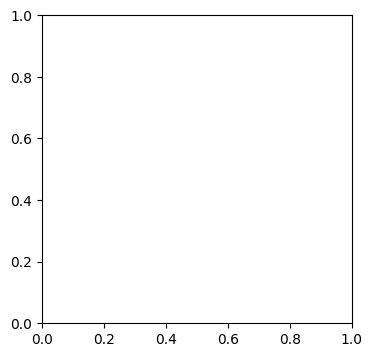

In [363]:
f, ax = plt.subplots(figsize=(4,4))

Text(0.5, 1.0, 'ax2_titulo')

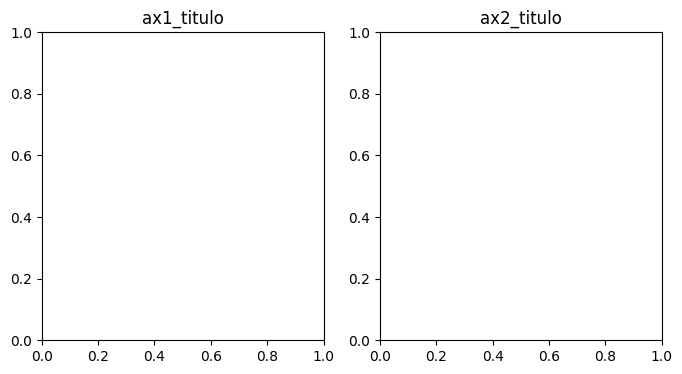

In [376]:
f, ax = plt.subplots(1,2,figsize=(8,4))
ax[0].set_title('ax1_titulo')
ax[1].set_title('ax2_titulo')

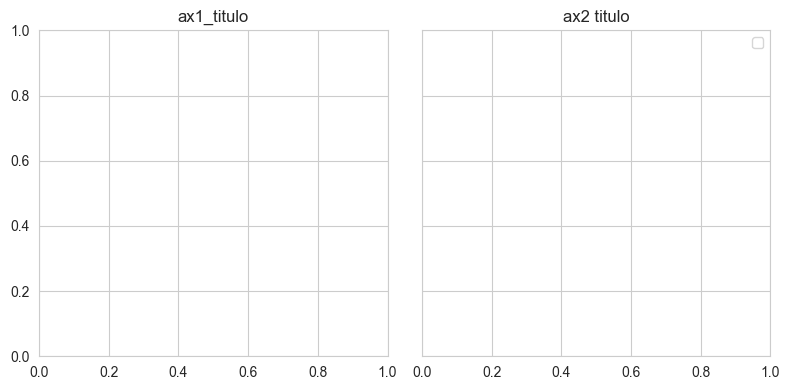

In [762]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(8,4),sharey=True, tight_layout=True)
ax1.set_title('ax1_titulo')
ax2.set_title('ax2 titulo')


### **sns.FacetGrid()**
Crea una cuadrícula de facetas, que es un tipo de gráfico que permite visualizar cómo la distribución de una variable difiere entre diferentes grupos de datos.

- data = Un objeto de Pandas DataFrame que contiene los datos que desea visualizar.
- col = El nombre de la variable que se utilizará para crear las facetas.
- height = Alto
- aspect = Ancho

In [698]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


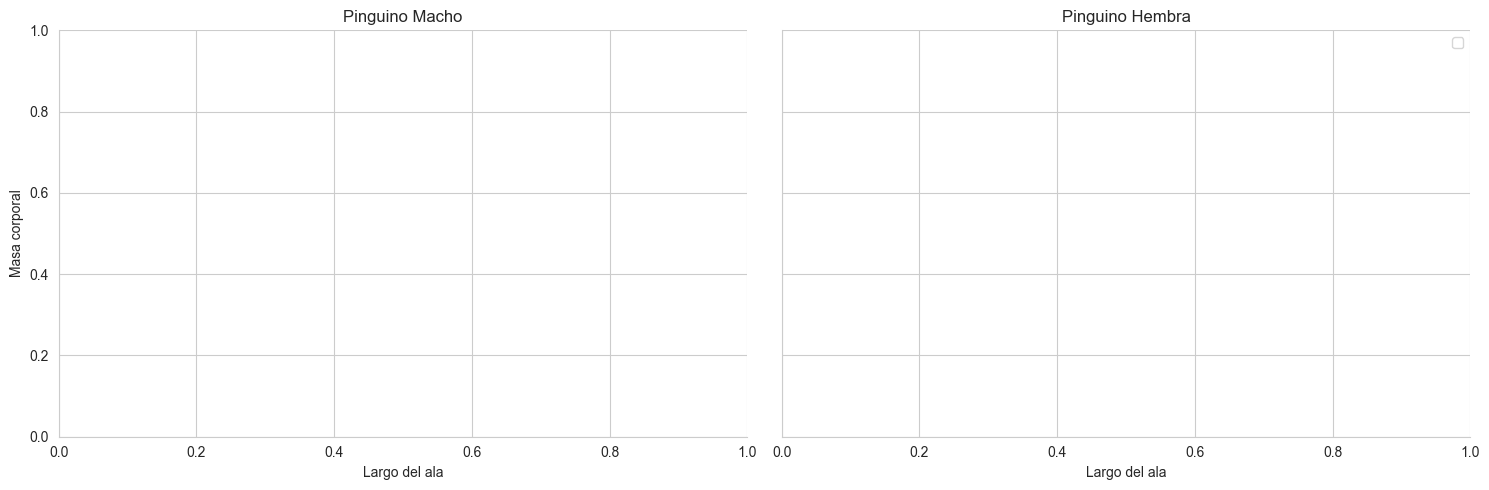

In [764]:
g = sns.FacetGrid(penguins, height=5, aspect=1.5, col='sex')
g.axes.flat[0].set_title("Pinguino Macho")
g.axes.flat[1].set_title("Pinguino Hembra")
g.set_axis_labels('Largo del ala', 'Masa corporal')
g.tight_layout()


### **Estilos**

### **sns.set_style**
- darkgrid

- black

- withe

- whitegrid

- ticks


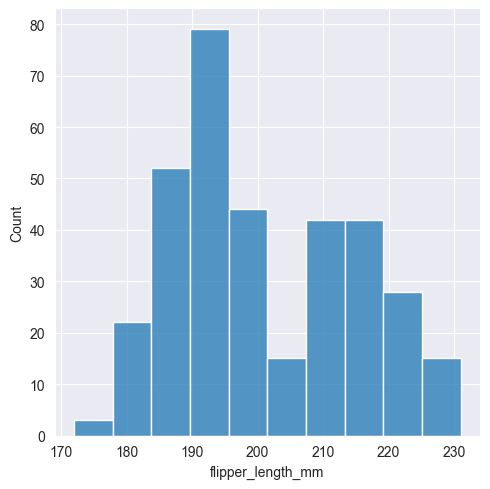

In [776]:
sns.set_style('darkgrid')
sns.displot(penguins, x="flipper_length_mm")


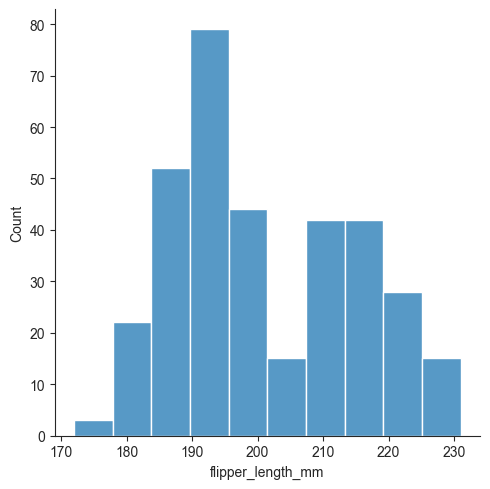

In [779]:
sns.set_style('ticks')
sns.displot(penguins, x="flipper_length_mm")

### **sns_despine**


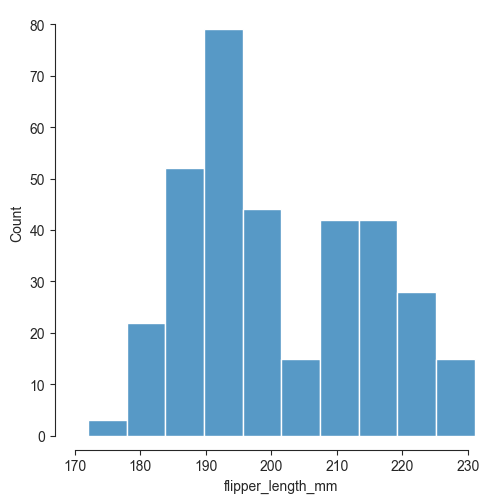

In [778]:
sns.set_style('ticks')
sns.displot(penguins, x="flipper_length_mm")
sns.despine(offset=10, trim=True);

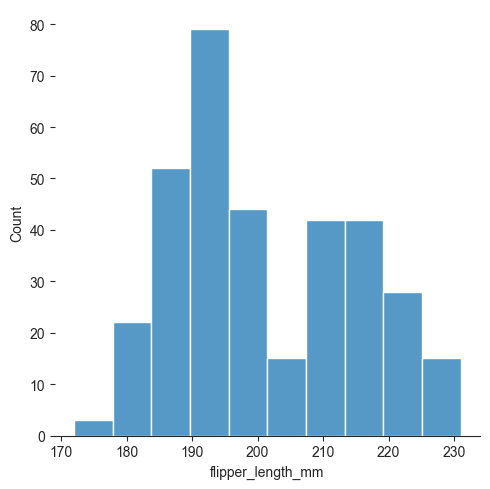

In [780]:
sns.displot(penguins, x="flipper_length_mm")
sns.despine(left=True)

### **sns.set_contex()**


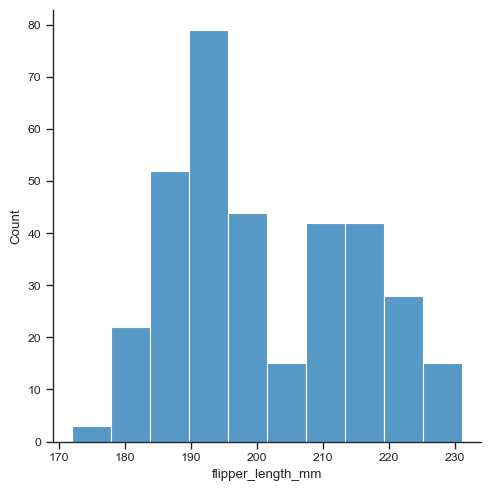

In [782]:
sns.set_context("paper")
sns.displot(penguins, x="flipper_length_mm")

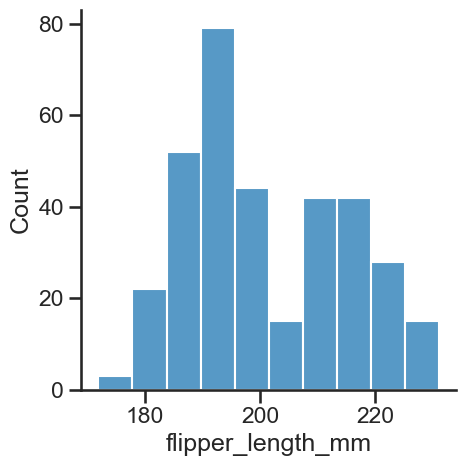

In [783]:
sns.set_context("talk")
sns.displot(penguins, x="flipper_length_mm")

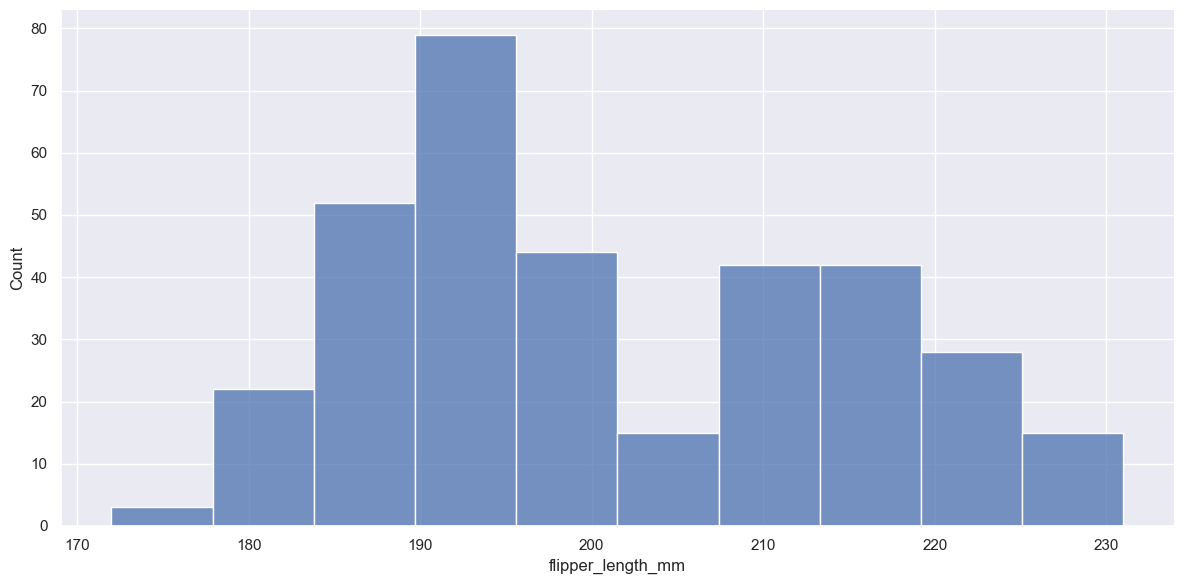

In [801]:
sns.displot(penguins, x="flipper_length_mm", aspect=2, height=6)
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})


### **Palettes**


### **sns.color_palette()**
- Set1, Set2, Set3

- Paired
   
Dos argumentos:
  - (rocket, as_cmap = True)

  - (mako, as_cmap = True)
  
  - (flare, as_cmap = True)
  
  - (crest, as_cmap = True)

  - ("viridis", as_cmap=True)


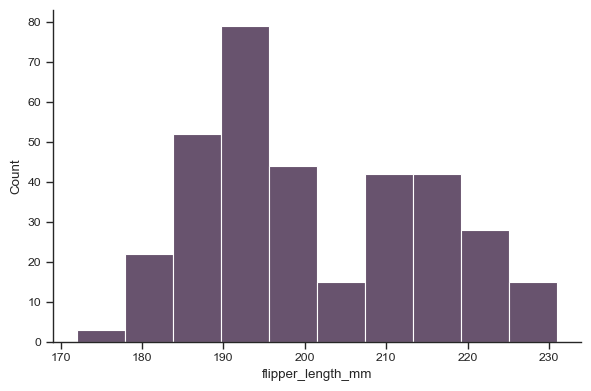

In [798]:
sns.set_palette('rocket')
sns.set_context('paper')
sns.displot(penguins, x="flipper_length_mm", aspect=1.5, height=4)

### **Realacionales**

### **sns.relplot()**
- data: Un objeto de Pandas DataFrame que contiene los datos que desea trazar.

- x: La variable que desea trazar en el eje x.

- y: La variable que desea trazar en el eje y.

- hue: Una variable categórica que desea usar para diferenciar los puntos.

- style: Una variable categórica que desea usar para diferenciar los puntos.

- size: Recibe el nombre de una columna 

- alpha: [0.1 - 1]. Regula la transparencia

- ax: El objeto AxesSubplot en el que desea trazar el gráfico.

- color: El color de los puntos.

- edgecolor: El color de los bordes de los puntos.

- legend: True, False .Si desea mostrar una leyenda para el gráfico.

- kind = scatter, line. Por defecto scatter




### scatter
-  linewidth = El ancho de los bordes de los puntos.

- edgecolor = El color de los bordes de los puntos.

- sizes: El tamaño de los puntos.

In [816]:
sns.set_style("whitegrid")

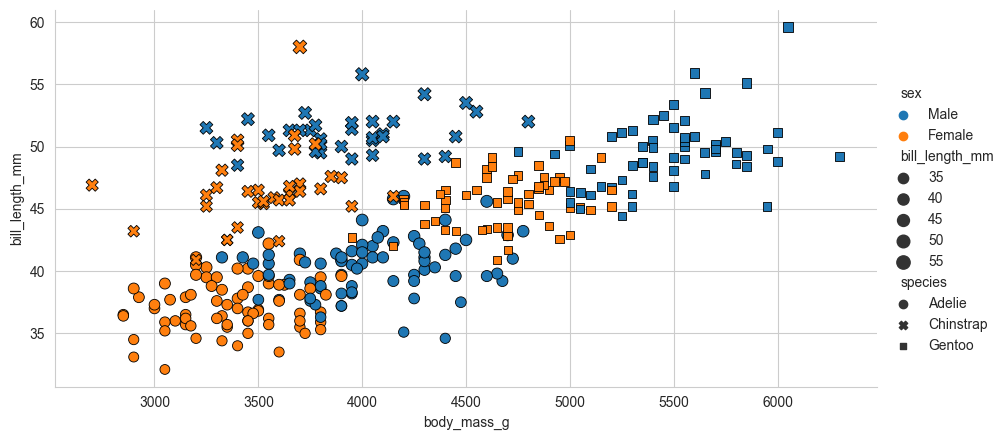

In [761]:
sns.relplot(x='body_mass_g', y='bill_length_mm', data=penguins, hue='sex', edgecolor ='black', 
            style='species', size='bill_length_mm',legend=True,sizes=(50, 100), height=4.5, aspect=2)


### line
- linewidth = int
- markers = True, False
- errorbar = [ci', 'pi', 'se', 'sd']
- alpha= [0.1 - 1.0]

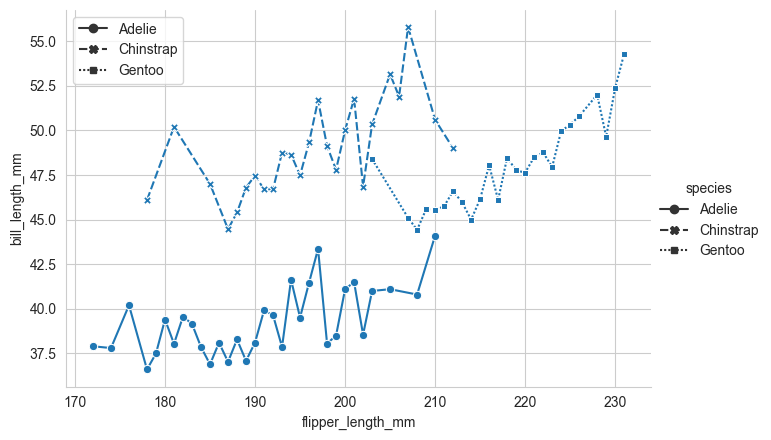

In [765]:
sns.relplot(x='flipper_length_mm', y='bill_length_mm', data=penguins, kind='line',
             height=4.5, aspect=1.5, errorbar=None
             ,dashes=True, style='species', markers=True, alpha=1)


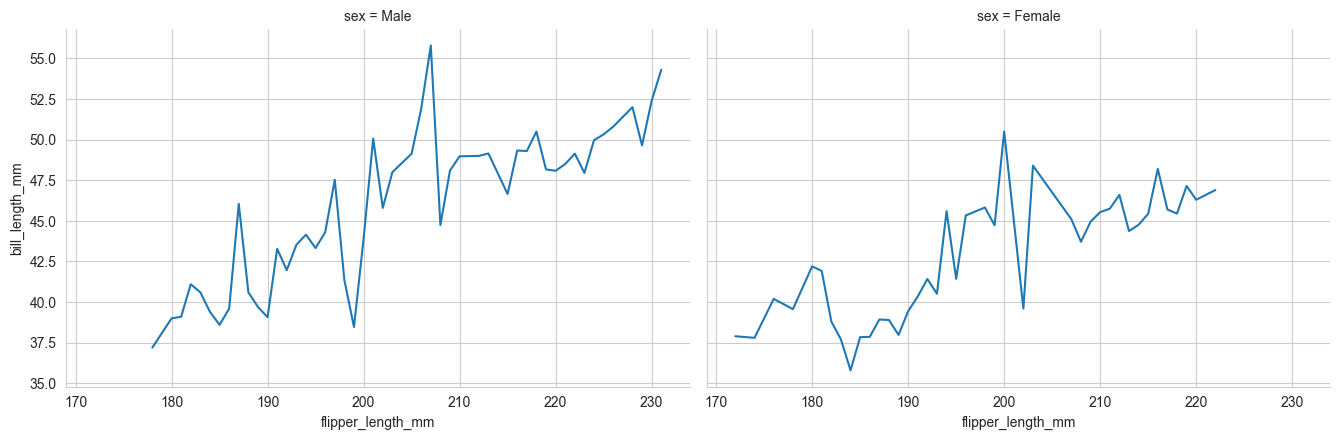

In [565]:
sns.relplot(x='flipper_length_mm', y='bill_length_mm', data=penguins, kind='line',
             height=4.5, aspect=1.5, errorbar=None ,dashes=True, col='sex', markers=True)

### **sns.displot()**
- data: Un objeto de Pandas DataFrame que contiene los datos que desea trazar.

- x: La variable que desea trazar en el eje x.

- y: La variable que desea trazar en el eje y.

- hue: Una variable categórica que desea usar para diferenciar los puntos.

- alpha: [0.1 - 1]. Regula la transparencia

- ax: El objeto AxesSubplot en el que desea trazar el gráfico

- edgecolor: El color de los bordes de los puntos.

- legend: True, False .Si desea mostrar una leyenda para el gráfico

- kind = hist, kde

### **histplot**()
- discrete = True, False

- shrink= separacion entre barras

- multiple = [layer', 'stack', 'fill', 'dodge']

- common_norm= True ,False

- stat = [density, probability, count, percent, frequency]

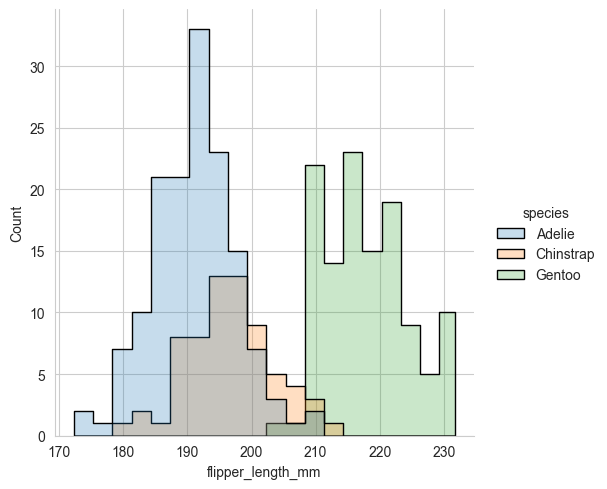

In [590]:
sns.displot(penguins, x="flipper_length_mm", binwidth=3, discrete=False, shrink=.8,
             hue='species', element='step',multiple="layer", edgecolor = 'black')

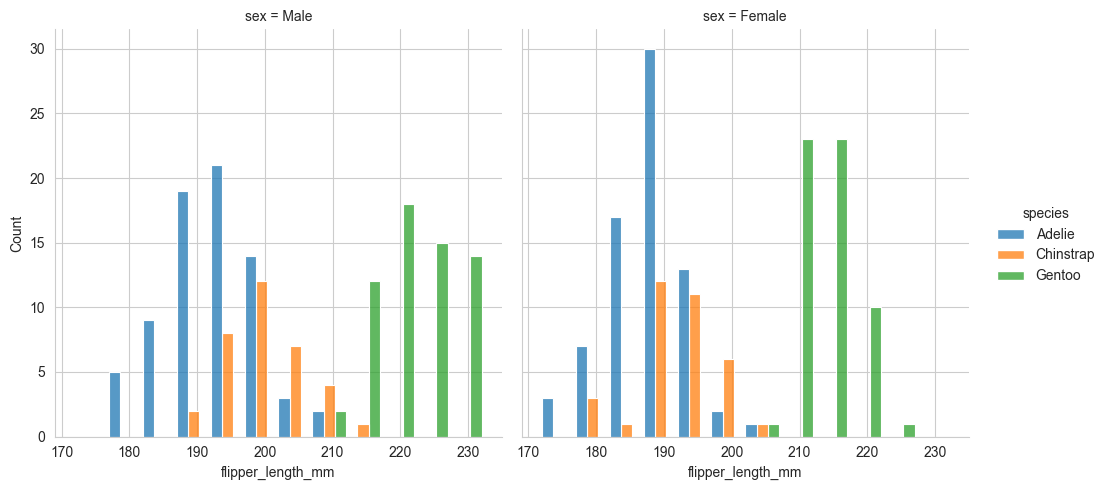

In [589]:
sns.displot(penguins, x="flipper_length_mm", binwidth=5, discrete=False, hue='species',
             multiple="dodge", col='sex',stat='count')

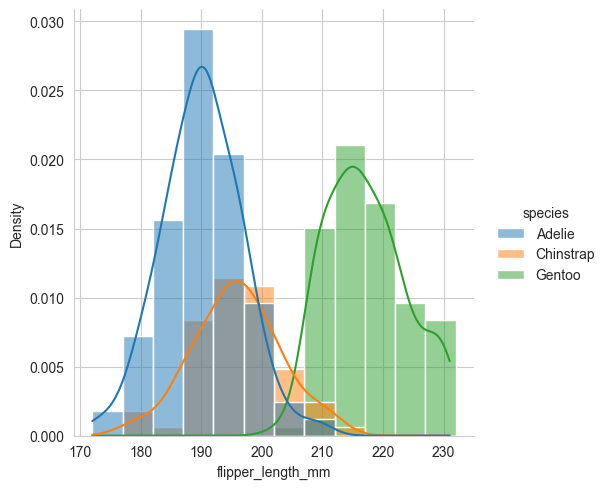

In [604]:
sns.displot(penguins, x="flipper_length_mm", binwidth=5, discrete=False, hue='species', stat="density", kde=True)

### kde

- bw_adjust=.25

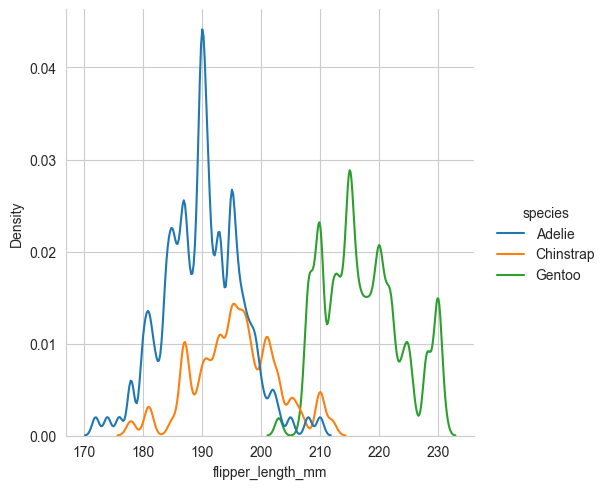

In [597]:
sns.displot(penguins, x="flipper_length_mm", kind="kde",  bw_adjust=.25, hue='species', multiple='layer')

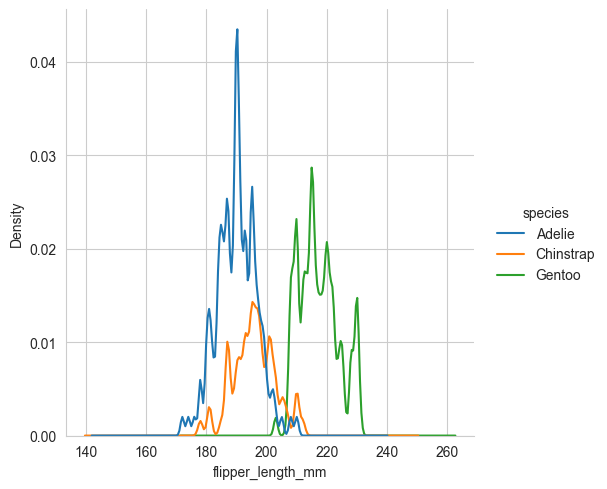

In [603]:
sns.displot(penguins, x="flipper_length_mm", kind="kde",  bw_adjust=.25, hue='species', multiple='layer', cut=50)

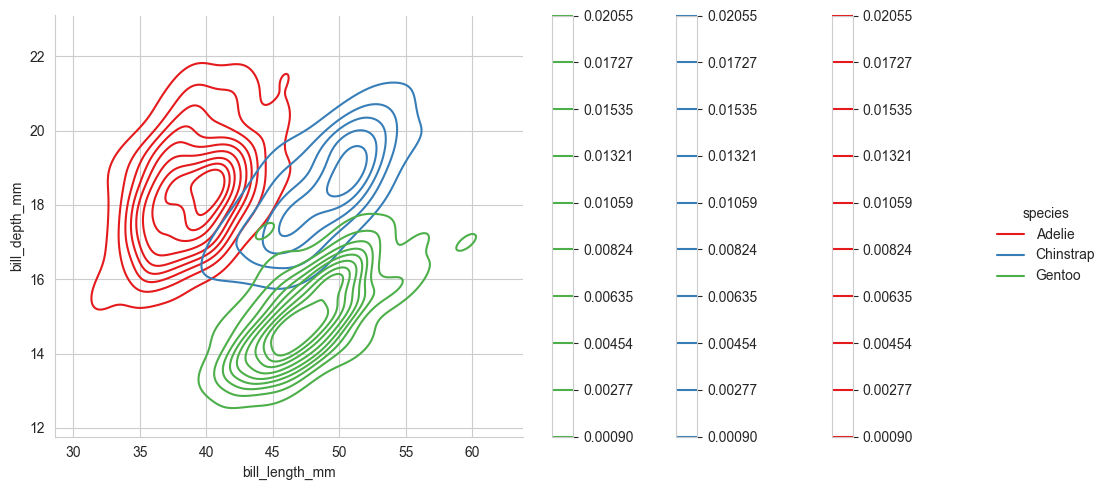

In [614]:
sns.displot(penguins, x="bill_length_mm", y="bill_depth_mm", hue="species", kind="kde", cbar=True, aspect=2 ,palette='Set1')

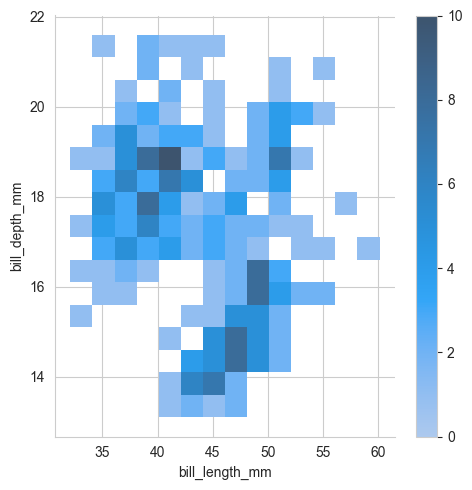

In [619]:
sns.displot(penguins, x="bill_length_mm", y="bill_depth_mm", binwidth=(2, 0.5), cbar=True)

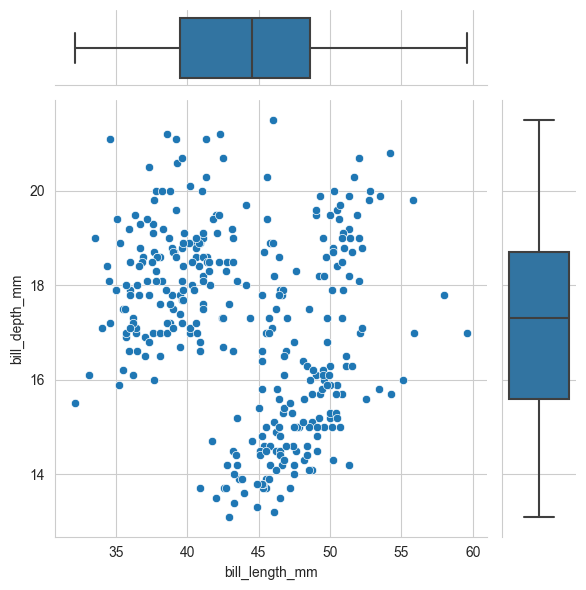

In [621]:
g = sns.JointGrid(data=penguins, x="bill_length_mm", y="bill_depth_mm")
g.plot_joint(sns.scatterplot)
g.plot_marginals(sns.boxplot)

### **sns.catplot()**

- data: Un objeto de Pandas DataFrame que contiene los datos que desea trazar.

- x: La variable que desea trazar en el eje x.

- y: La variable que desea trazar en el eje y.

- hue: Una variable categórica que desea usar para diferenciar los puntos.

- ax: El objeto AxesSubplot en el que desea trazar el gráfico

- legend: True, False .Si desea mostrar una leyenda para el gráfico

- kind = box, violin, boxen, point, bar, count

- estimator = mean, median, mode

- errorbar = [ci', 'pi', 'se', 'sd']

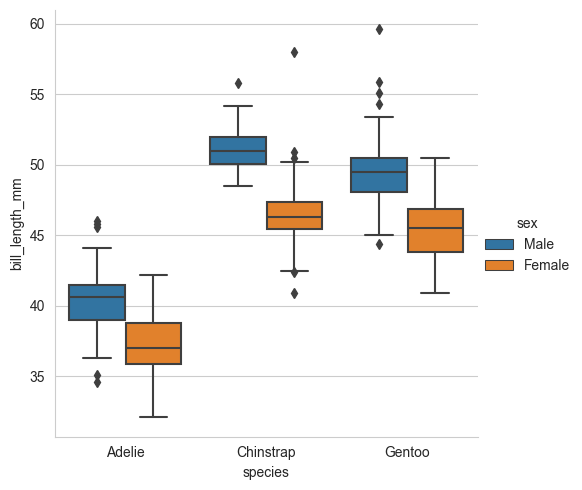

In [629]:
sns.catplot(data=penguins, x='species', y="bill_length_mm", kind='box', hue= 'sex')

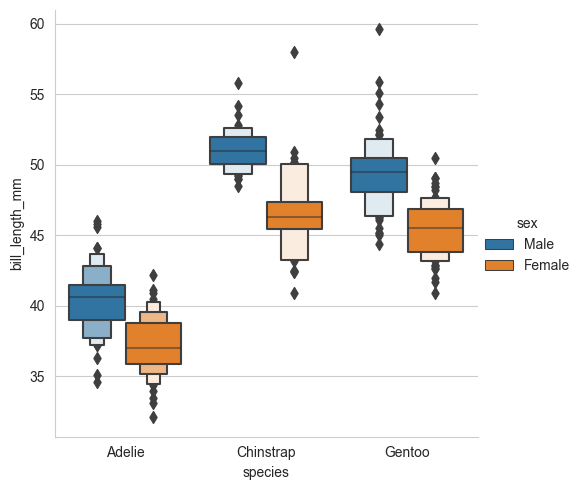

In [631]:
sns.catplot(data=penguins, x='species', y="bill_length_mm", kind='boxen', hue= 'sex')

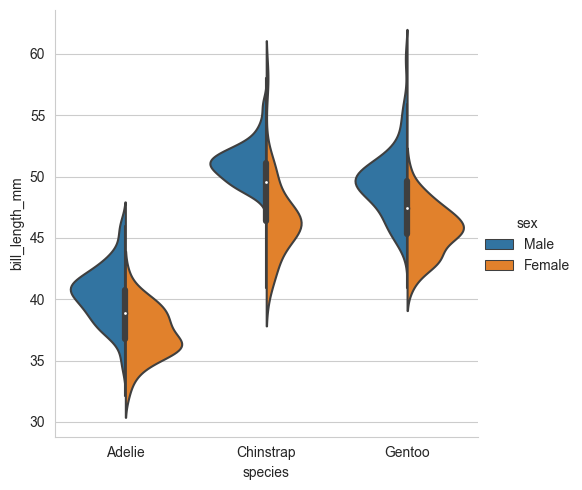

In [633]:
sns.catplot(data=penguins, x='species', y="bill_length_mm", kind='violin', hue= 'sex', split=True)

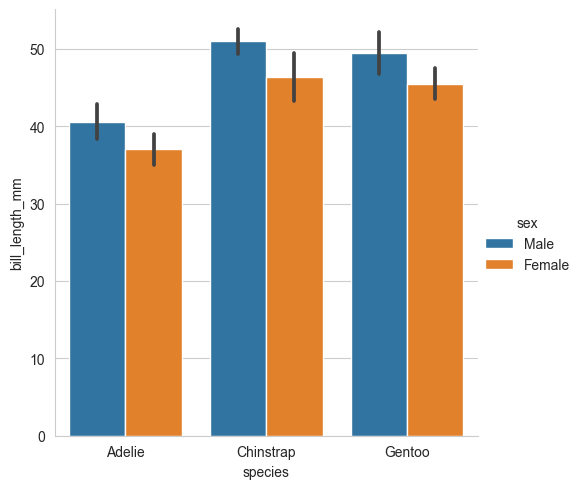

In [645]:
sns.catplot(data=penguins, x='species', y="bill_length_mm", kind='bar', hue= 'sex', errorbar='sd', estimator='median')

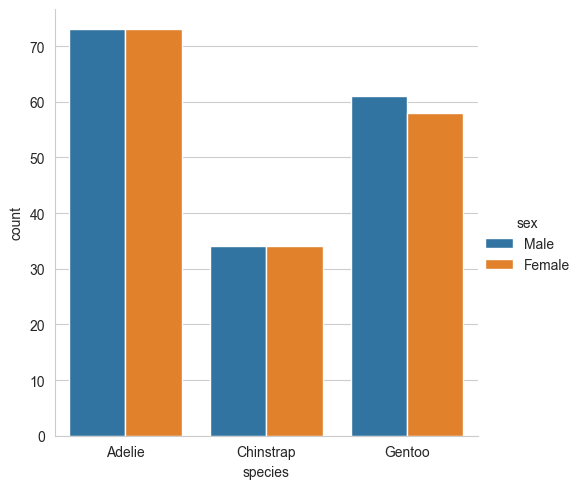

In [644]:
sns.catplot(data=penguins, x='species',  kind='count', hue= 'sex', errorbar=None)

### **Multiple plots**

In [199]:
tips = sns.load_dataset("tips")

In [661]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


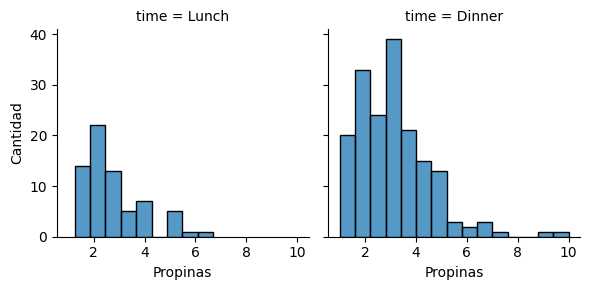

In [832]:
g = sns.FacetGrid(tips, col="time")
g.map(sns.histplot, "tip")
g.set_axis_labels('Propinas', 'Cantidad')
plt.show()

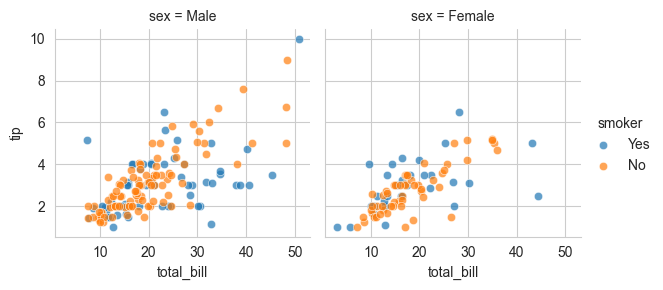

In [660]:
g = sns.FacetGrid(tips, col="sex", hue="smoker")
g.map(sns.scatterplot, "total_bill", "tip", alpha=.7)
g.add_legend()

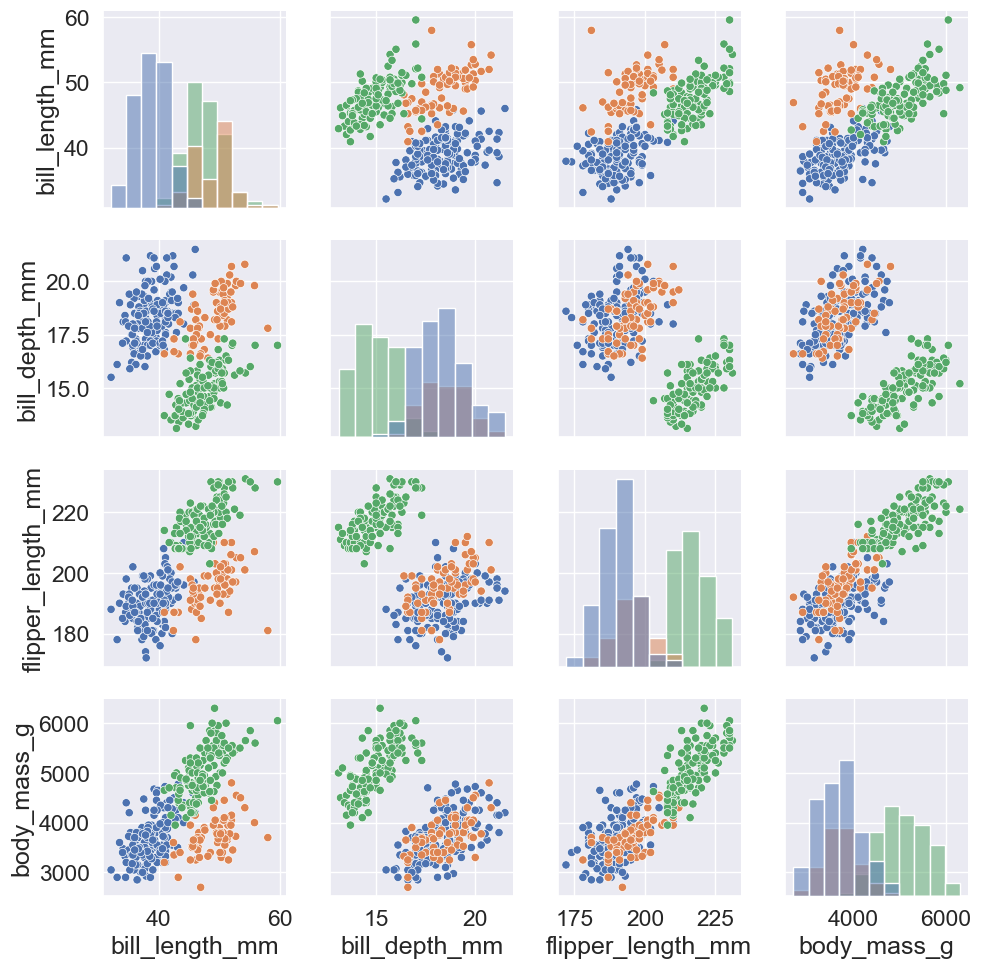

In [802]:
g = sns.PairGrid(penguins, hue="species")
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)

### **sns.heatmap()**

In [66]:
penguins_numeric = penguins[['bill_length_mm', 'bill_depth_mm' ,'flipper_length_mm', 'body_mass_g']]

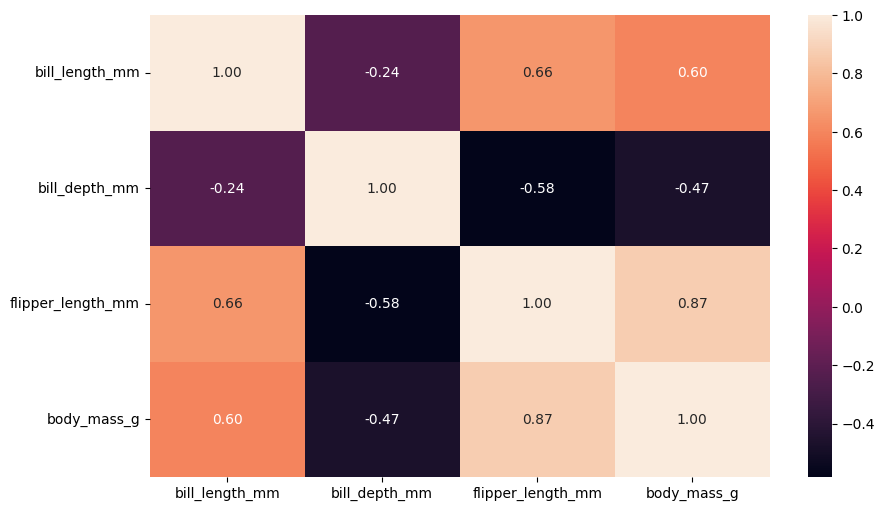

In [8]:
plt.figure(figsize=(10, 6))
# Crear un heatmap de la matriz de correlación
sns.heatmap(penguins_numeric.corr(), annot=True, fmt=".2f", cmap='rocket')
plt.show()

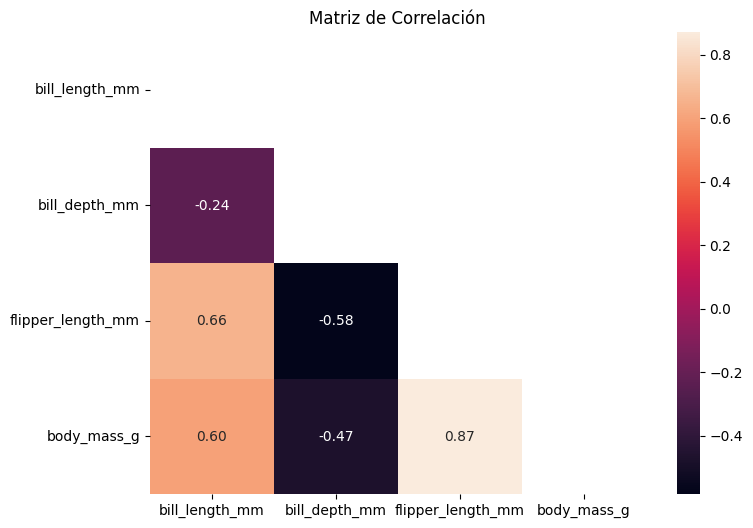

In [10]:
correlation_matrix = penguins_numeric.corr()

mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

plt.figure(figsize=(8, 6))

sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="rocket", mask=mask)

plt.title("Matriz de Correlación")

plt.show()

# **Tercera parte**

## **Preprocesamiento**

In [187]:
penguins = sns.load_dataset('penguins')
penguins = penguins.dropna()
penguins_numeric = penguins[['bill_length_mm', 'bill_depth_mm' ,'flipper_length_mm', 'body_mass_g']]
penguins_numeric.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,39.1,18.7,181.0,3750.0
1,39.5,17.4,186.0,3800.0
2,40.3,18.0,195.0,3250.0
4,36.7,19.3,193.0,3450.0
5,39.3,20.6,190.0,3650.0


### **StandarScaler()**

Estandariza los datos, transformándolos de manera que tengan una media de 0 y una desviación estándar de 1. Esto ayuda a convertir los datos en una distribución normal, lo que puede ser beneficioso para ciertos modelos y algoritmos.

La clase StandardScaler tiene los siguientes argumentos:

- with_mean = True, False. Indica si se debe restar la media a los datos. Por defecto es True

- with_std. True, False. Si se debe dividir los datos por la desviación estándar. Por defecto es True

- copy = True, False. Indica si se debe copiar la matriz de datos, por defecto es True


In [122]:
from sklearn.preprocessing import StandardScaler

# Seleccionar las columnas que deseas estandarizar
cols_para_estandarizar = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']

# Crear una instancia del StandardScaler
scaler = StandardScaler(with_mean=True, with_std=True, copy=True)

# 1. Datos estandarizados
data_standardized = scaler.fit_transform(penguins[cols_para_estandarizar])

# Mostrar resultados
print("Datos estandarizados:")
data_standardized

Datos estandarizados:


array([[-0.89604189,  0.7807321 , -1.42675157, -0.56847478],
       [-0.82278787,  0.11958397, -1.06947358, -0.50628618],
       [-0.67627982,  0.42472926, -0.42637319, -1.1903608 ],
       ...,
       [ 1.17338426, -0.74499437,  1.50292796,  1.91906927],
       [ 0.22108196, -1.20271231,  0.78837197,  1.23499466],
       [ 1.08181673, -0.54156417,  0.85982757,  1.48374906]])

##### Mantener el formato dataframe

In [123]:
# 2. Datos estandarizados manteniendo el formato DataFrame

df_standardized = penguins.copy()  # Crear una copia del DataFrame original
df_standardized.loc[:, cols_para_estandarizar] = scaler.fit_transform(df_standardized[cols_para_estandarizar])

# Mostrar resultados
print("DataFrame original con datos estandarizados:")
df_standardized.head()

DataFrame original con datos estandarizados:


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,-0.896042,0.780732,-1.426752,-0.568475,Male
1,Adelie,Torgersen,-0.822788,0.119584,-1.069474,-0.506286,Female
2,Adelie,Torgersen,-0.676280,0.424729,-0.426373,-1.190361,Female
4,Adelie,Torgersen,-1.335566,1.085877,-0.569284,-0.941606,Female
5,Adelie,Torgersen,-0.859415,1.747026,-0.783651,-0.692852,Male


##### Invertir el standarizado

In [124]:
# 3. Revertir los datos standarizados en formato dataframe

df_standardized.loc[:, cols_para_estandarizar] = scaler.inverse_transform(df_standardized[cols_para_estandarizar])

print("DataFrame original con datos estandarizados:")
df_standardized.head()

DataFrame original con datos estandarizados:


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


### **MinMaxScaler()**

El MaxAbsScaler es una técnica de escalamiento que se utiliza para normalizar las características de un conjunto de datos al rango [0, 1] al dividir cada característica por su valor absoluto máximo.

Algunas consideraciones adicionales que podrían ser útiles incluir son:

Ventajas y desventajas: El MaxAbsScaler preserva la forma de la distribución original de los datos, lo que puede ser beneficioso en ciertos casos. Sin embargo, es importante tener en cuenta que esta técnica puede ser sensible a valores atípicos, lo que puede afectar su desempeño en ciertos escenarios.

Impacto en modelos específicos: Es importante considerar cómo el uso de MaxAbsScaler puede afectar diferentes tipos de modelos de machine learning. Por ejemplo, en algoritmos sensibles a la escala de las características, como Support Vector Machines (SVM) o K-Means Clustering, el efecto de esta técnica puede ser más notorio.

Ejemplos de uso:

- Para comprender mejor la aplicación práctica de MaxAbsScaler, es útil proporcionar ejemplos concretos.
- Por ejemplo, en un problema de clasificación o regresión específico, se puede mostrar cómo se aplica esta técnica y cómo afecta el rendimiento del modelo.

Al incluir estas consideraciones adicionales, la explicación de MaxAbsScaler se vuelve más completa y proporciona una comprensión más amplia de su uso y aplicabilidad en el contexto del machine learning.

In [127]:
from sklearn.preprocessing import MinMaxScaler

cols_para_estandarizar = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']

# Create the MinMaxScaler model
min_scaler = MinMaxScaler(feature_range=(-2,2))


# 1. Datos estandarizados
data_standardized = min_scaler.fit_transform(penguins[cols_para_estandarizar])

# Mostrar resultados
print("Datos estandarizados:")
data_standardized

Datos estandarizados:


array([[-0.98181818,  0.66666667, -1.38983051, -0.83333333],
       [-0.92363636,  0.04761905, -1.05084746, -0.77777778],
       [-0.80727273,  0.33333333, -0.44067797, -1.38888889],
       ...,
       [ 0.66181818, -0.76190476,  1.38983051,  1.38888889],
       [-0.09454545, -1.19047619,  0.71186441,  0.77777778],
       [ 0.58909091, -0.57142857,  0.77966102,  1.        ]])

In [128]:
df_standardized = penguins.copy()  

df_standardized.loc[:, cols_para_estandarizar] = min_scaler.fit_transform(df_standardized[cols_para_estandarizar])

# Mostrar resultados
print("DataFrame original con datos estandarizados:")
df_standardized.head()

DataFrame original con datos estandarizados:


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,-0.981818,0.666667,-1.389831,-0.833333,Male
1,Adelie,Torgersen,-0.923636,0.047619,-1.050847,-0.777778,Female
2,Adelie,Torgersen,-0.807273,0.333333,-0.440678,-1.388889,Female
4,Adelie,Torgersen,-1.330909,0.952381,-0.576271,-1.166667,Female
5,Adelie,Torgersen,-0.952727,1.571429,-0.779661,-0.944444,Male


In [129]:
df_standardized.loc[:, cols_para_estandarizar] = min_scaler.inverse_transform(df_standardized[cols_para_estandarizar])

print("DataFrame original con datos estandarizados:")
df_standardized.head()

DataFrame original con datos estandarizados:


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


### **Normalizer()**

Normalizer es una técnica que escala los datos de forma que su norma tenga un valor específico. Por defecto, utiliza la norma L2, que se basa en los cuadrados de las componentes del vector. La norma L1, por otro lado, se basa en los valores absolutos de las componentes del vector.

Norma L1:

- Sensible a los valores extremos.
- Se basa en los valores absolutos de las componentes del vector.
- Utilizada cuando se quiere dar más importancia a los valores extremos.

Norma L2:

- Más robusta a los ruidos.
- Se basa en los cuadrados de las componentes del vector.
- Menos afectada por valores extremos.

Argumentos:
norm = 
Especifica el tipo de norma a utilizar. Puede ser 'l1' o 'l2'.

En general, la norma L1 se utiliza cuando se quiere dar más importancia a los valores extremos de los datos. Por ejemplo, la norma L1 se puede utilizar para escalar los datos de forma que todos los valores tengan la misma importancia, independientemente de su magnitud.

**Aclaracion: Normalizer no posee el metodo inverse_transform**

In [130]:
from sklearn.preprocessing import Normalizer

cols_para_estandarizar = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']

# Create the MinMaxScaler model

normalizer = Normalizer(norm='l2')

data_standardized = normalizer.fit_transform(penguins[cols_para_estandarizar])

# Mostrar resultados
print("Datos estandarizados:")
data_standardized

Datos estandarizados:


array([[0.01041385, 0.00498054, 0.04820733, 0.99877064],
       [0.01038164, 0.00457318, 0.04888569, 0.99873995],
       [0.0123766 , 0.00552801, 0.05988679, 0.99811314],
       ...,
       [0.00875832, 0.00272829, 0.03857833, 0.99921347],
       [0.00868473, 0.00284367, 0.04073369, 0.99912825],
       [0.00923313, 0.00297902, 0.03941194, 0.99917595]])

In [131]:
df_standardized = penguins.copy()  

df_standardized.loc[:, cols_para_estandarizar] = normalizer.fit_transform(df_standardized[cols_para_estandarizar])

# Mostrar resultados
print("DataFrame original con datos estandarizados:")
df_standardized.head()

DataFrame original con datos estandarizados:


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,0.010414,0.004981,0.048207,0.998771,Male
1,Adelie,Torgersen,0.010382,0.004573,0.048886,0.998740,Female
2,Adelie,Torgersen,0.012377,0.005528,0.059887,0.998113,Female
4,Adelie,Torgersen,0.010620,0.005585,0.055851,0.998367,Female
5,Adelie,Torgersen,0.010752,0.005636,0.051981,0.998574,Male


### **MaxAbsScaler()**

Divide cada característica por su valor absoluto máximo. Esto tiene el efecto de centrar cada característica en 0 y normalizarla en el rango [0, 1].

El MaxAbsScaler tiene el efecto de reducir la influencia de las características con valores absolutos grandes. \
\
Por ejemplo, si una característica tiene un valor absoluto máximo de 100, el MaxAbsScaler la dividirá por 100. Esto significa que la característica tendrá un impacto menor en el modelo que una característica con un valor absoluto máximo de 10.

In [136]:
from sklearn.preprocessing import MaxAbsScaler

cols_para_estandarizar = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']

# Create the MinAbsScaler model
max_scaler = MaxAbsScaler()

# 1. Datos estandarizados
data_standardized = max_scaler.fit_transform(penguins[cols_para_estandarizar])

# Mostrar resultados
print("Datos estandarizados:")
data_standardized

Datos estandarizados:


array([[0.65604027, 0.86976744, 0.78354978, 0.5952381 ],
       [0.66275168, 0.80930233, 0.80519481, 0.6031746 ],
       [0.6761745 , 0.8372093 , 0.84415584, 0.51587302],
       ...,
       [0.84563758, 0.73023256, 0.96103896, 0.91269841],
       [0.75838926, 0.68837209, 0.91774892, 0.82539683],
       [0.83724832, 0.74883721, 0.92207792, 0.85714286]])

In [137]:
df_standardized = penguins.copy()  

df_standardized.loc[:, cols_para_estandarizar] = max_scaler.fit_transform(df_standardized[cols_para_estandarizar])

# Mostrar resultados
print("DataFrame original con datos estandarizados:")
df_standardized.head()

DataFrame original con datos estandarizados:


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,0.656040,0.869767,0.783550,0.595238,Male
1,Adelie,Torgersen,0.662752,0.809302,0.805195,0.603175,Female
2,Adelie,Torgersen,0.676174,0.837209,0.844156,0.515873,Female
4,Adelie,Torgersen,0.615772,0.897674,0.835498,0.547619,Female
5,Adelie,Torgersen,0.659396,0.958140,0.822511,0.579365,Male


In [138]:
df_standardized.loc[:, cols_para_estandarizar] = max_scaler.inverse_transform(df_standardized[cols_para_estandarizar])

print("DataFrame original con datos estandarizados:")
df_standardized.head()

DataFrame original con datos estandarizados:


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


### **RobustScaler**

Es un escalador de datos que es más robusto a los valores atípicos que otros escaladores, como StandardScaler.

- Funciona calculando la mediana y la desviación intercuartil (IQR) de los datos.

- Luego, los datos se escalan de forma que tengan una mediana de 0 y una IQR de 1.

- Reduce la influencia de los outliers

Tiene los siguientes argumentos:

- quantile_range =  El rango de percentiles que se utilizará para calcular la mediana y la IQR. Por defecto es (0.25 - 0.75)

- with_centering = Indica si se debe centrar los datos antes de escalarlos. El valor predeterminado es True.

- with_scaling = Indica si se debe escalar los datos después de centrarlos. El valor predeterminado es True.

Ventajas de RobustScaler

- Es más robusto a los valores atípicos que otros escaladores, como StandardScaler.

- Puede ayudar a mejorar el rendimiento de los modelos de aprendizaje automático que son sensibles a los valores atípicos.

Desventajas de RobustScaler

- Puede ser menos eficiente que otros escaladores, como StandardScaler.
- Puede no ser tan efectivo como otros escaladores para escalar datos que están distribuidos de forma normal.

In [145]:
from sklearn.preprocessing import RobustScaler

cols_para_estandarizar = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']

# Create the MinAbsScaler model
robust = RobustScaler(quantile_range=(0, 0.5))

# 1. Datos estandarizados
data_standardized = robust.fit_transform(penguins[cols_para_estandarizar])

# Mostrar resultados
print("Datos estandarizados:")
data_standardized

Datos estandarizados:


array([[ -4.2721519 ,   8.43373494,  -4.81927711,  -2.        ],
       [ -3.9556962 ,   0.60240964,  -3.31325301,  -1.66666667],
       [ -3.32278481,   4.21686747,  -0.60240964,  -5.33333333],
       ...,
       [  4.66772152,  -9.63855422,   7.53012048,  11.33333333],
       [  0.55379747, -15.06024096,   4.51807229,   7.66666667],
       [  4.2721519 ,  -7.22891566,   4.81927711,   9.        ]])

In [146]:
df_standardized = penguins.copy()  

df_standardized.loc[:, cols_para_estandarizar] = robust.fit_transform(df_standardized[cols_para_estandarizar])

# Mostrar resultados
print("DataFrame original con datos estandarizados:")
df_standardized.head()

DataFrame original con datos estandarizados:


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,-4.272152,8.433735,-4.819277,-2.000000,Male
1,Adelie,Torgersen,-3.955696,0.602410,-3.313253,-1.666667,Female
2,Adelie,Torgersen,-3.322785,4.216867,-0.602410,-5.333333,Female
4,Adelie,Torgersen,-6.170886,12.048193,-1.204819,-4.000000,Female
5,Adelie,Torgersen,-4.113924,19.879518,-2.108434,-2.666667,Male


In [147]:
df_standardized.loc[:, cols_para_estandarizar] = robust.inverse_transform(df_standardized[cols_para_estandarizar])

print("DataFrame original con datos estandarizados:")
df_standardized.head()

DataFrame original con datos estandarizados:


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


### **PowerTransformer**

Es un escalador de datos que transforma los datos utilizando una función de potencia. Es útil para escalar datos que están distribuidos de forma no normal.

Tiene los siguientes argumentos:

- method =  método que se utilizará para estimar el parámetro de potencia. Las opciones son "box-cox" y "yeo-johnson". El valor predeterminado es "box-cox".

- standardize = Indica si se debe centrar y escalar los datos antes de transformarlos. El valor predeterminado es False.

Ventajas de PowerTransformer

- Es útil para escalar datos que están distribuidos de forma no normal.

Desventajas de PowerTransformer

- Puede ser más lento que otros escaladores, como StandardScaler o RobustScaler.
- Puede no ser tan efectivo como otros escaladores para escalar datos que están distribuidos de forma normal.

In [148]:
from sklearn.preprocessing import PowerTransformer

cols_para_estandarizar = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']

# Create the MinAbsScaler model
power = PowerTransformer(method='yeo-johnson')

# 1. Datos estandarizados
data_standardized = power.fit_transform(penguins[cols_para_estandarizar])

# Mostrar resultados
print("Datos estandarizados:")
data_standardized

Datos estandarizados:


array([[-0.89103736,  0.77274057, -1.59922696, -0.48550951],
       [-0.81500573,  0.09095517, -1.11652176, -0.41171534],
       [-0.66373437,  0.40248494, -0.34384796, -1.31334867],
       ...,
       [ 1.16513984, -0.76174113,  1.41321928,  1.67484223],
       [ 0.24120926, -1.1947232 ,  0.84418353,  1.20573251],
       [ 1.07778556, -0.56515793,  0.90491051,  1.38447666]])

In [149]:
df_standardized = penguins.copy()  

df_standardized.loc[:, cols_para_estandarizar] = power.fit_transform(df_standardized[cols_para_estandarizar])

# Mostrar resultados
print("DataFrame original con datos estandarizados:")
df_standardized.head()

DataFrame original con datos estandarizados:


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,-0.891037,0.772741,-1.599227,-0.485510,Male
1,Adelie,Torgersen,-0.815006,0.090955,-1.116522,-0.411715,Female
2,Adelie,Torgersen,-0.663734,0.402485,-0.343848,-1.313349,Female
4,Adelie,Torgersen,-1.353002,1.095848,-0.505776,-0.960963,Female
5,Adelie,Torgersen,-0.852988,1.813755,-0.758838,-0.637556,Male


In [150]:
df_standardized.loc[:, cols_para_estandarizar] = power.inverse_transform(df_standardized[cols_para_estandarizar])

print("DataFrame original con datos estandarizados:")
df_standardized.head()

DataFrame original con datos estandarizados:


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


### **LabelEncoder()**
LabelEncoder es una técnica de preprocesamiento de datos que codifica las etiquetas de una variable categórica en valores numéricos.

LabelEncoder afecta a los datos de las siguientes maneras:

- Codifica las etiquetas de una variable categórica en valores numéricos.

- Elimina la información de orden de las etiquetas. Esto se debe a que las etiquetas se codifican en valores numéricos, que no tienen un orden natural.

Ventajas de LabelEncoder

- Es una técnica sencilla y fácil de implementar.

- Puede mejorar el rendimiento de los modelos de aprendizaje automático que son sensibles a las diferencias en la escala de las variables.

Desventajas de LabelEncoder


- Elimina la información de orden de las etiquetas.

- Puede introducir sesgo en los datos si las etiquetas no están distribuidas uniformemente.

In [163]:
from sklearn.preprocessing import LabelEncoder

cols_para_codificar =['species', 'island','sex']

# Create the LabelEncoder model
label = LabelEncoder()

penguins[cols_para_codificar] = penguins[cols_para_codificar].apply(lambda col: label.fit_transform(col))

penguins.sample(5)


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
213,1,1,46.8,16.5,189.0,3650.0,0
329,2,0,48.1,15.1,209.0,5500.0,1
292,2,0,48.2,15.6,221.0,5100.0,1
278,2,0,43.2,14.5,208.0,4450.0,0
154,1,1,51.3,19.2,193.0,3650.0,1


### **OnetHotEncoder**
Es una técnica de preprocesamiento de datos que codifica las etiquetas de una variable categórica en un vector de variables binarias.

Tiene los siguientes argumentos:

- categories = Una lista de las categorías de la variable categórica.

- handle_unknown = Un método para manejar las etiquetas desconocidas. Las opciones son "error", "ignore" y "replace".

- n_values = El número de valores posibles para la variable categórica.

- drop =  Indica si se deben eliminar las variables originales del conjunto de datos.

- sparse_output = True, False. Devuelve una matriz si es true y un array si es False. Por defecto True

- drop = 'first', None. Indica si se debe eliminar la primera variable binaria del conjunto de datos. Esto puede ser útil para evitar la multicolinealidad en los modelos de aprendizaje automático.

Ventajas de OneHotEncoder

- Conserva la información de orden de las etiquetas.

- Puede mejorar el rendimiento de los modelos de aprendizaje automático que son sensibles a las diferencias en la escala de las variables.

Desventajas de OneHotEncoder

- Puede aumentar el tamaño del conjunto de datos.

- Puede introducir sesgo en los datos si las etiquetas no están distribuidas uniformemente.


In [185]:
from sklearn.preprocessing import OneHotEncoder

one_hot = OneHotEncoder(handle_unknown='ignore', sparse_output=False, drop='first')

# Codificar las variables categóricas
encoded_data = one_hot.fit_transform(penguins[cols_para_codificar])

#Convertirmos en Dataframe las columnas transformadas
encoded_data = pd.DataFrame(encoded_data, columns= one_hot.get_feature_names_out(cols_para_codificar))

print(encoded_data)

encoded_data = pd.concat([encoded_data, penguins], axis=1)

encoded_data.head()

     species_1  species_2  island_1  island_2  sex_1
0          0.0        0.0       0.0       1.0    1.0
1          0.0        0.0       0.0       1.0    0.0
2          0.0        0.0       0.0       1.0    0.0
3          0.0        0.0       0.0       1.0    0.0
4          0.0        0.0       0.0       1.0    1.0
..         ...        ...       ...       ...    ...
328        0.0        1.0       0.0       0.0    0.0
329        0.0        1.0       0.0       0.0    0.0
330        0.0        1.0       0.0       0.0    1.0
331        0.0        1.0       0.0       0.0    0.0
332        0.0        1.0       0.0       0.0    1.0

[333 rows x 5 columns]


,species_1,species_2,island_1,island_2,sex_1,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,0.0,0.0,0.0,1.0,1.0,0.0,2.0,39.1,18.7,181.0,3750.0,1.0
1,0.0,0.0,0.0,1.0,0.0,0.0,2.0,39.5,17.4,186.0,3800.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,2.0,40.3,18.0,195.0,3250.0,0.0
3,0.0,0.0,0.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.0,0.0,0.0,1.0,1.0,0.0,2.0,36.7,19.3,193.0,3450.0,0.0


### **OrdinalEncoder**
Es una técnica de preprocesamiento de datos que codifica las etiquetas de una variable categórica en valores numéricos que conservan el orden natural de las etiquetas.

Tiene los siguientes argumentos:

- categories = Una lista de las categorías de la variable categórica.

- handle_unknown = Un método para manejar las etiquetas desconocidas. Las opciones son "error", "ignore" y "replace".

Ventajas de Ordinal Encoding

- Conserva la información de orden de las etiquetas.
- Puede mejorar el rendimiento de los modelos de aprendizaje automático que son sensibles a las diferencias en la escala de las variables.

Desventajas de Ordinal Encoding

- No puede aumentar el tamaño del conjunto de datos.
- Puede introducir sesgo en los datos si las etiquetas no están distribuidas uniformemente.

In [221]:
penguins.head()
penguins_copy = penguins.copy()

In [222]:
penguins['species'].unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [223]:
from sklearn.preprocessing import OrdinalEncoder

# Seleccionamos los valores de la columna en el orden que necesitemos
encoder = OrdinalEncoder(categories=[['Adelie', 'Chinstrap', 'Gentoo']])

# Reemplazamos los valores categoricos por los numeros ordinales
penguins_copy[['species']] = encoder.fit_transform(penguins_copy[['species']])

penguins_copy.sample(5)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
250,2.0,Biscoe,47.3,15.3,222.0,5250.0,Male
138,0.0,Dream,37.0,16.5,185.0,3400.0,Female
215,1.0,Dream,55.8,19.8,207.0,4000.0,Male
139,0.0,Dream,39.7,17.9,193.0,4250.0,Male
154,1.0,Dream,51.3,19.2,193.0,3650.0,Male


## **Imputadores**

In [5]:
water = pd.read_csv('water_potability.csv')
water.head()
                         

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


#### Con fines practicos para la demostracion manipularemos un poco el dataframe para mostrar las diferencias concretas

In [6]:
sample = water.sample(5,random_state=583)
sample = sample[['ph', 'Hardness','Solids',	'Chloramines','Sulfate']]

### **SimpleImputer()**

SimpleImputer es un imputador basado en la estadística que rellena los valores faltantes con un valor constante.

Argumentos:

- strategy: mean, median, most_frequent, constant

- fill_value: El valor constante a utilizar si la estrategia es constant.

- copy: Si True, el imputador copiará los datos de entrada. Si False, el imputador modificará los datos de entrada

Ventajas

- Es un imputador simple y fácil de usar. También es relativamente rápido, lo que lo hace adecuado para conjuntos de datos grandes.

Desventajas

- Puede no ser adecuado para conjuntos de datos con distribuciones no normales. Además, puede no ser capaz de capturar las relaciones entre las características.

Cuando utilizarlo

- Especialmente adecuado para conjuntos de datos con distribuciones normales y/o tamaños relativamente pequeños.

In [321]:
from sklearn.impute import SimpleImputer

# Crea un imputador basado en la media
imputer = SimpleImputer(strategy="most_frequent",copy=True)

# Rellenar los valores faltantes
sample_imputed = imputer.fit_transform(sample)

print(sample_imputed)

[[5.55443651e+00 1.69974849e+02 2.34036373e+04 8.51972985e+00
  2.34285621e+02]
 [8.41608682e+00 2.08326022e+02 2.82349069e+04 7.78412305e+00
  2.97330528e+02]
 [5.55443651e+00 2.29122829e+02 3.13444604e+04 7.76143106e+00
  2.34285621e+02]
 [5.55443651e+00 1.34679257e+02 3.02118330e+04 4.79236101e+00
  2.34285621e+02]
 [6.19317010e+00 2.25683422e+02 1.28837265e+04 4.73936012e+00
  2.34285621e+02]]


##### Si queremos conservar el formato dataframe demos realizar unos pasos extras

In [322]:
columns = sample.columns

imputer = SimpleImputer(strategy="most_frequent",copy=True)

# Rellenar los valores faltantes
sample_imputed = pd.DataFrame(imputer.fit_transform(sample), columns=columns)


print(sample)
sample_imputed.head()

            ph    Hardness        Solids  Chloramines     Sulfate
252        NaN  169.974849  23403.637304     8.519730         NaN
1550  8.416087  208.326022  28234.906857     7.784123  297.330528
198   5.554437  229.122829  31344.460394     7.761431         NaN
1206       NaN  134.679257  30211.832991     4.792361  234.285621
293   6.193170  225.683422  12883.726496     4.739360         NaN


,ph,Hardness,Solids,Chloramines,Sulfate
0,5.554437,169.974849,23403.637304,8.519730,234.285621
1,8.416087,208.326022,28234.906857,7.784123,297.330528
2,5.554437,229.122829,31344.460394,7.761431,234.285621
3,5.554437,134.679257,30211.832991,4.792361,234.285621
4,6.193170,225.683422,12883.726496,4.739360,234.285621


### **KNNImputer**

Es un imputador basado en el k-vecinos más cercanos que rellena los valores faltantes con el valor de la muestra más similar a la muestra que contiene el valor faltante.

- La similitud entre las muestras se mide utilizando la distancia euclidiana.

- El número de vecinos que se utilizarán para calcular la similitud se puede especificar con el argumento

Los argumentos de KNNImputer son los siguientes:

- n_neighbors = El número de vecinos que se utilizarán para calcular la similitud.

- weights = La estrategia para ponderar los valores de los vecinos. Los valores válidos son:

   - uniform = Todos los vecinos se ponderan por igual.

   - distance = Los vecinos más cercanos se ponderan más.

- metric = 'nan_euclidean'. Tambien puede brindarse una predefinida por el usuario

- copy = Si True, el imputador copiará los datos de entrada. Si False, el imputador modificará los datos de entrada.

Ventajas

-  puede ser más preciso para conjuntos de datos con distribuciones no normales. Además, puede capturar las relaciones entre las características.

Desventajas

- KNNImputer puede ser más lento que otros imputados basados en la estadística, especialmente para conjuntos de datos grandes. Además, puede ser sensible a la elección del número de vecinos.

In [7]:
from sklearn.impute import KNNImputer

columns = sample.columns

# Crea un imputador basado en el k-vecinos más cercanos
imputer = KNNImputer(n_neighbors=5,weights='distance', metric="nan_euclidean")

# Rellenar los valores faltantes
sample_imputed = pd.DataFrame(imputer.fit_transform(sample), columns=columns)


print(sample)
sample_imputed.head()

            ph    Hardness        Solids  Chloramines     Sulfate
252        NaN  169.974849  23403.637304     8.519730         NaN
1550  8.416087  208.326022  28234.906857     7.784123  297.330528
198   5.554437  229.122829  31344.460394     7.761431         NaN
1206       NaN  134.679257  30211.832991     4.792361  234.285621
293   6.193170  225.683422  12883.726496     4.739360         NaN


,ph,Hardness,Solids,Chloramines,Sulfate
0,7.080306,169.974849,23403.637304,8.519730,271.161789
1,8.416087,208.326022,28234.906857,7.784123,297.330528
2,5.554437,229.122829,31344.460394,7.761431,252.996427
3,6.676314,134.679257,30211.832991,4.792361,234.285621
4,6.193170,225.683422,12883.726496,4.739360,269.960398


### **IterativeImputer()**

Es un imputador basado en el aprendizaje automático que rellena los valores faltantes de manera iterativa. En cada iteración, el imputador rellena los valores faltantes utilizando un imputador basado en la estadística

Argumentos:

Los argumentos de IterativeImputer son los siguientes:

- estimator: El imputador basado en la estadística que se utilizará en cada iteración. SimpleImputer , KNNImputer, MissForest

- max_iter: El número máximo de iteraciones a realizar.

- tol: La tolerancia para detener el proceso de iteración.

   - Forma precisa: : utilizar un valor alto para max_iter y un valor bajo para tol. Esto asegurará que el imputador iterativo realice muchas iteraciones y que el cambio en los valores rellenados sea muy pequeño.
   
   - Forma rapida, puede utilizar un valor bajo para max_iter y un valor alto para tol. Esto asegurará que el imputador iterativo realice pocas iteraciones y que el cambio en los valores rellenados sea aceptable.


- copy: Si True, el imputador copiará los datos de entrada. Si False, el imputador modificará los datos de entrada.


Nota: Iterative imputer esta dentro de la categoria experimental, por ende debe utilizarse el imputador debe otorgarse como objeto

In [8]:
from sklearn.experimental import enable_iterative_imputer  # noqa
from sklearn.impute import IterativeImputer

# Crear el imputador iterativo con el modelo base
imputer_base = IterativeImputer(max_iter=10, tol=0.001)

# Aplicar el imputador iterativo al DataFrame
df_imputed_base = pd.DataFrame(imputer_base.fit_transform(sample), columns=columns)

print("DataFrame original:")
print(sample)

df_imputed_base


DataFrame original:
            ph    Hardness        Solids  Chloramines     Sulfate
252        NaN  169.974849  23403.637304     8.519730         NaN
1550  8.416087  208.326022  28234.906857     7.784123  297.330528
198   5.554437  229.122829  31344.460394     7.761431         NaN
1206       NaN  134.679257  30211.832991     4.792361  234.285621
293   6.193170  225.683422  12883.726496     4.739360         NaN


,ph,Hardness,Solids,Chloramines,Sulfate
0,13.686832,169.974849,23403.637304,8.519730,451.137390
1,8.416087,208.326022,28234.906857,7.784123,297.330528
2,5.554437,229.122829,31344.460394,7.761431,198.331030
3,18.411308,134.679257,30211.832991,4.792361,234.285621
4,6.193170,225.683422,12883.726496,4.739360,786.214099


In [9]:
from sklearn.ensemble import RandomForestRegressor

# Crear el imputador iterativo con RandomForestRegressor y argumentos adicionales
rf_estimator = RandomForestRegressor(n_estimators=50, max_depth=5)  # Añadir argumentos adicionales aquí
imputer_custom_rf = IterativeImputer(estimator=rf_estimator, max_iter=10, tol=0.001)

# Aplicar el imputador iterativo al DataFrame
df_imputed_custom_rf = pd.DataFrame(imputer_custom_rf.fit_transform(sample), columns=columns)

print("DataFrame original:")
print(sample)
df_imputed_custom_rf


DataFrame original:
            ph    Hardness        Solids  Chloramines     Sulfate
252        NaN  169.974849  23403.637304     8.519730         NaN
1550  8.416087  208.326022  28234.906857     7.784123  297.330528
198   5.554437  229.122829  31344.460394     7.761431         NaN
1206       NaN  134.679257  30211.832991     4.792361  234.285621
293   6.193170  225.683422  12883.726496     4.739360         NaN


,ph,Hardness,Solids,Chloramines,Sulfate
0,6.941309,169.974849,23403.637304,8.519730,270.851667
1,8.416087,208.326022,28234.906857,7.784123,297.330528
2,5.554437,229.122829,31344.460394,7.761431,269.590769
3,6.655650,134.679257,30211.832991,4.792361,234.285621
4,6.193170,225.683422,12883.726496,4.739360,269.590769


In [12]:
from sklearn.svm import SVR  # Estimador ficticio basado en SVM


svm_estimator = SVR()  # Estimador ficticio basado en SVM
imputer_custom = IterativeImputer(estimator=svm_estimator, max_iter=10, tol=0.001)

# Aplicar el imputador iterativo al DataFrame
df_imputed_custom = pd.DataFrame(imputer_custom.fit_transform(sample), columns=columns)

print("DataFrame original:")
print(sample)
df_imputed_custom


DataFrame original:
            ph    Hardness        Solids  Chloramines     Sulfate
252        NaN  169.974849  23403.637304     8.519730         NaN
1550  8.416087  208.326022  28234.906857     7.784123  297.330528
198   5.554437  229.122829  31344.460394     7.761431         NaN
1206       NaN  134.679257  30211.832991     4.792361  234.285621
293   6.193170  225.683422  12883.726496     4.739360         NaN


,ph,Hardness,Solids,Chloramines,Sulfate
0,6.147787,169.974849,23403.637304,8.519730,265.842185
1,8.416087,208.326022,28234.906857,7.784123,297.330528
2,5.554437,229.122829,31344.460394,7.761431,265.795072
3,6.069207,134.679257,30211.832991,4.792361,234.285621
4,6.193170,225.683422,12883.726496,4.739360,265.874596


In [199]:
penguins = sns.load_dataset('penguins')
penguins = penguins.dropna()
penguins = pd.get_dummies(penguins, drop_first= True, dtype= int)
penguins.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,species_Chinstrap,species_Gentoo,island_Dream,island_Torgersen,sex_Male
0,39.1,18.7,181.0,3750.0,0,0,0,1,1
1,39.5,17.4,186.0,3800.0,0,0,0,1,0
2,40.3,18.0,195.0,3250.0,0,0,0,1,0
4,36.7,19.3,193.0,3450.0,0,0,0,1,0
5,39.3,20.6,190.0,3650.0,0,0,0,1,1


### **PCA()**

El PCA (Análisis de Componentes Principales) es una técnica de reducción de dimensionalidad que busca las direcciones en las que hay la mayor varianza en los datos. Es decir,  las direcciones que contienen la mayor cantidad de información sobre los datos.

Para aplicar el PCA a un conjunto de datos, primero necesitamos calcular la descomposición de valores singulares de la matriz de datos. A partir de esta descomposición, 

se obtienen los vectores propios que representan las direcciones de máxima varianza en los datos.

La cantidad de vectores propios que conservamos determina la dimensionalidad del espacio de representación reducido. Por ejemplo, si conservamos dos vectores propios, entonces el espacio de representación reducido tendrá dos dimensiones.

Podemos utilizar los siguientes argumentos:

- n_components: Este argumento indica la cantidad de componentes principales a conservar. Por ejemplo, si establecemos n_components=2, estaremos conservando dos componentes principales, lo que resultará en un espacio de representación de dos dimensiones.

- copy: Este parámetro indica si se debe copiar la matriz de datos antes de realizar el PCA. Por defecto, su valor es True, lo que significa que se realizará una copia de la matriz de datos.

- whiten: [True, False] Cuando whiten se establece en True, se aplica la transformación de "Whitening" a los componentes principales. Por ejemplo, al establecer whiten=True, se realiza la normalización de la varianza de las características en el espacio de las componentes principales.

En resumen, el PCA es una técnica poderosa para reducir la dimensionalidad de los datos, preservando al mismo tiempo la mayor cantidad posible de información presente en los mismo, y ofrece la flexibilidad de ajustar su comportamiento a través de estos argumentos.

In [104]:
penguins.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,species_Chinstrap,species_Gentoo,island_Dream,island_Torgersen,sex_Male
0,39.1,18.7,181.0,3750.0,0,0,0,1,1
1,39.5,17.4,186.0,3800.0,0,0,0,1,0
2,40.3,18.0,195.0,3250.0,0,0,0,1,0
4,36.7,19.3,193.0,3450.0,0,0,0,1,0
5,39.3,20.6,190.0,3650.0,0,0,0,1,1


Text(0.5, 1.0, 'Importancia Acumulativa de Componentes Principales')

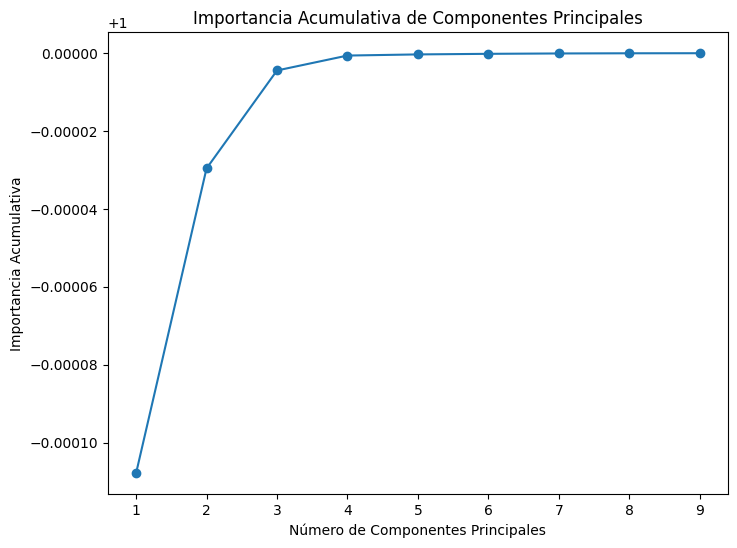

In [106]:
import matplotlib.pyplot as plt

# Supongamos que 'X_pca' contiene los datos transformados por <link>PCA</link> a dos componentes principales
# Supongamos que 'y' contiene las etiquetas de clase correspondientes

plt.figure(figsize=(8, 6))

pca = PCA()

pca_result = pca.fit_transform(penguins)

# Calcula la importancia de cada componente principal
explained_var_ratio = pca.explained_variance_ratio_

# Visualiza la importancia acumulativa de los componentes principales
cumulative_explained_var = explained_var_ratio.cumsum()

# Grafica la importancia acumulativa
plt.plot(range(1, len(cumulative_explained_var) + 1), cumulative_explained_var, marker='o')
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Importancia Acumulativa')
plt.title('Importancia Acumulativa de Componentes Principales')

          PC1        PC2
0 -457.324981  13.368424
1 -407.252387   9.183658
2 -957.044742  -8.148776
3 -757.115910  -1.857301
4 -557.177189   3.411544


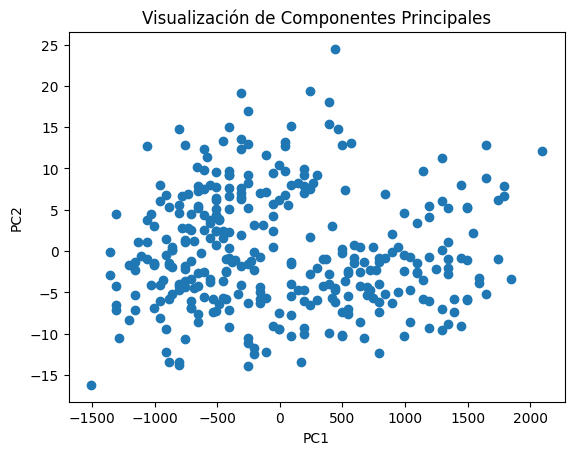

In [107]:
num_components = 2

# Selecciona solo las primeras 'num_components' columnas de pca_result
pca_result_selected = pca_result[:, :num_components]

# Crea un nuevo DataFrame con las componentes principales seleccionadas
df_pca = pd.DataFrame(data=pca_result_selected, columns=[f'PC{i+1}' for i in range(num_components)])

# Visualiza las primeras filas del nuevo DataFrame
print(df_pca.head())

# Grafica las componentes principales
plt.scatter(df_pca['PC1'], df_pca['PC2'])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Visualización de Componentes Principales')
plt.show()

### **Train_test_split()**

Se utiliza para dividir un conjunto de datos en dos partes: un conjunto de entrenamiento y un conjunto de prueba.

Tiene los siguientes argumentos:

- X: Los datos.

- y: Las etiquetas.

- test_size: El porcentaje de datos que se utilizará para el conjunto de prueba.

- random_state: La semilla aleatoria para el proceso de división.

- shuffle: Si se debe barajar los datos antes de dividirlos.

- stratify =  True, False.Si se debe estratificar la división en función de las etiquetas. Por default False

- stratify_arg =Los datos a utilizar para estratificar la división

In [31]:
from sklearn.model_selection import train_test_split

# Crea un conjunto de datos

X = penguins.drop(columns='sex_Male')

y= penguins['sex_Male']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y)



## **Cross Validation**

### **K-folds()**

La validación cruzada k-folds es una buena opción para la mayoría de los problemas de aprendizaje automático. Es una técnica robusta que proporciona una estimación precisa del rendimiento del modelo en datos nuevos.

- El modelo se entrena en k-1 conjuntos de entrenamiento y se evalúa en el conjunto de prueba restante. 

- El rendimiento del modelo se calcula como el promedio del rendimiento en los k conjuntos de prueba.

- Un valor pequeño de k puede dar lugar a un rendimiento optimista, ya que el modelo se entrena en un conjunto de datos relativamente grande.

- Un valor grande de k puede dar lugar a un rendimiento pesimista, ya que el modelo se entrena en un conjunto de datos relativamente pequeño.

Parametros:

- estimator: El estimador a evaluar.

- X: Los datos de entrenamiento.

- y: Las etiquetas de los datos de entrenamiento.

- cv: El número de conjuntos de entrenamiento y prueba.

- scoring: La métrica a utilizar para evaluar el rendimiento del modelo.

- n_jobs: El número de procesos a utilizar para evaluar el rendimiento del modelo.

- verbose: El nivel de verbosidad.

In [38]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

# Crea un conjunto de datos
X = penguins.drop(columns='sex_Male')

y= penguins['sex_Male']

# Crea un clasificador de árboles de decisión
clf = DecisionTreeClassifier()

# Evalua el clasificador utilizando validación cruzada k-folds con 5 particiones
scores = cross_val_score(clf, X, y, cv=5)

# Imprime el rendimiento del clasificador
print ("Scores de validación cruzada:")
print(scores)
print("Promedio del rendimiento:")
print(scores.mean())

Scores de validación cruzada:
[0.7761194  0.82089552 0.67164179 0.89393939 0.89393939]
Promedio del rendimiento:
0.8113071008593395


### **StratifiedKFold()**

Es una variante de k-folds que asegura que la distribución de las clases en los conjuntos de entrenamiento y prueba sea similar. Esto es importante para problemas de clasificación, donde las clases están desbalanceadas.

Tiene los siguientes argumentos:

- n_splits: El número de conjuntos de entrenamiento y prueba.

- random_state: La semilla aleatoria para el proceso de división.

- shuffle: Si se debe barajar los datos antes de dividirlos.

In [36]:
from sklearn.model_selection import StratifiedKFold

# Crea un conjunto de datos
X = penguins.drop(columns='sex_Male')

y= penguins['sex_Male']

# Crea un clasificador de árboles de decisión
clf = DecisionTreeClassifier()

# Evalua el clasificador utilizando validación cruzada estratificada con 5 particiones
# sin barajar los datos
scores = cross_val_score(clf, X, y, cv=StratifiedKFold(n_splits=5, shuffle=True))

# Imprime el rendimiento del clasificador
print ("Scores de validación cruzada:")
print(scores)
print("Promedio del rendimiento:")
print(scores.mean())


Scores de validación cruzada:
[0.92537313 0.91044776 0.91044776 0.81818182 0.89393939]
Promedio del rendimiento:
0.891677973767526


### **GroupKFold()**
Validación cruzada por grupo: Esta variante de la validación cruzada tiene en cuenta los grupos de datos. Los datos se dividen en grupos, y luego cada grupo se divide en k conjuntos de entrenamiento y prueba.

El rendimiento del modelo se calcula como el promedio del rendimiento en los k conjuntos de prueba.

Tiene los siguientes argumentos:

- n_splits = El número de conjuntos de entrenamiento y prueba.

- groups = Los grupos de datos.

  - La variable groups debe ser una lista de enteros que indica a qué grupo pertenece cada dato. 
  
  - Los valores de groups pueden ser cualquier tipo de secuencia de enteros. Por ejemplo, una lista de enteros que indica el país de origen de cada cliente.

- random_state = La semilla aleatoria para el proceso de división.


In [49]:
penguins.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,species_Chinstrap,species_Gentoo,island_Dream,island_Torgersen,sex_Male
0,39.1,18.7,181.0,3750.0,0,0,0,1,1
1,39.5,17.4,186.0,3800.0,0,0,0,1,0
2,40.3,18.0,195.0,3250.0,0,0,0,1,0
4,36.7,19.3,193.0,3450.0,0,0,0,1,0
5,39.3,20.6,190.0,3650.0,0,0,0,1,1


In [50]:
from sklearn.model_selection import GroupKFold
from sklearn.tree import DecisionTreeClassifier

# Crea un conjunto de datos
X = penguins.drop(columns='sex_Male')

y= penguins['sex_Male']

groups = penguins['species_Chinstrap']

# Crea un clasificador de árboles de decisión
clf = DecisionTreeClassifier()

# Evalúa el clasificador utilizando validación cruzada por grupo con 5 particiones
group_kfold = GroupKFold(n_splits=2)

scores = cross_val_score(clf, X, y, groups=groups, cv=group_kfold)

# Muestra los puntajes obtenidos
print("Puntajes de validación cruzada:", scores)


Puntajes de validación cruzada: [0.50943396 0.51470588]


## **Modelos Base**

### **KNNRegresor()**

KNNRegresor es un modelo de aprendizaje automático supervisado que se utiliza para realizar regresión. KNN significa "K vecinos más cercanos".

- El modelo KNN funciona calculando la distancia entre un nuevo punto de datos y los puntos de datos de entrenamiento. 

- El modelo asigna el nuevo punto de datos a la clase con la que se encuentran más cerca sus K vecinos más cercanos.

Parametros :

- n_neighbors: El número de vecinos más cercanos a considerar.

- weights: [uniform, distance, None] El método de ponderación de las distancias a los vecinos.

- p: El p-norm utilizado para medir la distancia entre los puntos. Puede ser 1, 2 o infinity.

- metric: [euclidean, manhattan, chebyshev, minkowski, seuclidean] La métrica utilizada para medir la distancia entre los puntos.

- algorithm: [auto, ball_tree, kd_tree, brute] El algoritmo utilizado para encontrar los vecinos más cercanos.
  
- leaf_size: El tamaño de las hojas del árbol.

- metric_params: Parámetros adicionales para la métrica utilizada.

Para acceder a todos los hiperparámetros del modelo KNeighborsRegressor, se puede utilizar el método **get_params()**. Este método devuelve un diccionario con todos los hiperparámetros del modelo y sus valores actuales.

In [51]:
from sklearn.neighbors import KNeighborsRegressor

# Crear el modelo
knn = KNeighborsRegressor()

# Acceder a los hiperparámetros
params = knn.get_params()

# Imprimir los hiperparámetros
params

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

##### Implementamos el modelo y corroboramos las predicciones. En este caso tuvimos que modificar un poco la columna porque habia valores unicos y nos daba un error

In [59]:

# Elimina las instancias de la clase que tiene solo 1 miembro
penguins_filtered = penguins.groupby('bill_depth_mm').filter(lambda x: len(x) > 1)

X = penguins_filtered.drop(columns='bill_depth_mm')
y = penguins_filtered['bill_depth_mm']

# Divide el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y)

# Luego continúa con tu modelo de KNeighborsRegressor
knn_r = KNeighborsRegressor(n_neighbors=5, weights='distance', p=2, metric='manhattan', algorithm='ball_tree')
knn_r.fit(X_train, y_train)

# Realiza predicciones en el conjunto de prueba
predict = knn_r.predict(X_test)

print(predict)


[18.84152618 14.44943848 19.13730766 18.01919017 14.76590031 17.17552728
 15.68927267 14.84912815 19.11650307 14.55756981 17.47143503 18.64220257
 17.46447478 18.84513611 14.65827893 17.95071988 17.96790373 18.10877846
 18.0876635  18.66248101 17.49095102 14.87861812 16.07177542 19.00803769
 15.22964507 19.22702172 15.81733276 16.07537119 18.09190516 17.39721731
 17.0319844  19.43393087 17.98205369 18.1169907  18.51969633 18.21896475
 17.67898196 17.48160246 17.24646333 16.02358709 15.58867719 17.16398185
 16.35494683 14.47166327 19.29248696 19.1473095  17.525534   14.93625834
 16.96526739 14.31220984 15.04472497 17.70211113 18.6338874  16.29094757
 15.23055138 18.60182818 15.80458989 19.37225977 18.67915274 19.21203737
 16.7        18.9800195  18.6616488  14.95477889 14.9126344  17.07541447
 16.79117441 14.89468856 15.4789175  15.02194598 16.76334486 18.71295038
 18.9399626  18.9551034  18.16824827 17.6196113  15.994582   14.23980321
 18.21844084 18.60482158 18.96195144]


### **DecisionTreeClassifier**
DecisionTreeClassifier es un modelo de aprendizaje automático supervisado que se utiliza para realizar clasificación. 

DecisionTreeClassifier funciona construyendo un árbol de decisión. El árbol de decisión es una estructura de datos jerárquica que representa\
las relaciones entre las características y las clases.

Parametros: 

- criterion = gini, entropy. Criterio utilizado para dividir los nodos. Por defacult gini

- splitter = best, random .Método utilizado para dividir los nodos.

- max_depth: La profundidad máxima del árbol.

- min_samples_split: El número mínimo de muestras necesarias para dividir un nodo.

- min_samples_leaf: El número mínimo de muestras necesarias para que un nodo sea una hoja.

- min_weight_fraction_leaf: La fracción mínima de peso de las muestras necesarias para que un nodo sea una hoja.

- max_features: auto, sqrt, log2, int El número máximo de características a considerar al dividir un nodo.

- max_leaf_nodes: El número máximo de hojas del árbol.

- min_impurity_decrease: La disminución mínima de la impureza necesaria para dividir un nodo.

- min_impurity_split: La impureza mínima necesaria para dividir un nodo.

- class_weight: Un diccionario que asigna pesos a las clases.

- random_state: La semilla aleatoria utilizada para generar el árbol.

Acceso a los hiperparámetros del modelo DecisionTreeClassifier

Para acceder a todos los hiperparámetros del modelo DecisionTreeClassifier, se puede utilizar el método **get_params()**. Este método devuelve un diccionario con todos los hiperparámetros del modelo y sus valores 

In [944]:
from sklearn.tree import DecisionTreeClassifier

# Crear el modelo
dtc = DecisionTreeClassifier()

# Acceder a los hiperparámetros
params = dtc.get_params()

# Imprimir los hiperparámetros
params

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [63]:
X = penguins_filtered.drop(columns='sex_Male')

y = penguins_filtered['sex_Male']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y)

dtc = DecisionTreeClassifier(criterion = 'entropy', max_leaf_nodes = 3, min_samples_leaf=2, min_samples_split = 3)

dtc.fit(X_train, y_train)

predict = dtc.predict(X_test)

print(predict)

[0 0 0 0 0 1 1 0 1 1 0 0 1 0 0 0 1 0 0 1 0 1 1 1 0 1 1 0 1 1 1 1 0 0 0 0 1
 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1 0 1 1 1 1 1 1 0 0 0 0 0 1 1 1 0 0 1 1 0 1
 0 1 0 0 1 1 1]


## **Ensambladores**

Los ensambladores son métodos que combinan las predicciones de varios estimadores individuales para mejorar la generalización y el rendimiento del modelo. Dos ensambladores populares en Scikit-Learn son Bagging y Boosting.

### **RandomForest()**

Es un modelo de aprendizaje automático supervisado que se utiliza para realizar clasificación o regresión. Random Forest es una variante del modelo de árboles de decisión.

- El modelo Random Forest funciona construyendo un conjunto de árboles de decisión independientes. 

- Cada árbol de decisión se entrena en un subconjunto aleatorio de los datos de entrenamiento.

- Las predicciones de los árboles de decisión se combinan para producir una predicción final.

- La combinación de las predicciones de los árboles de decisión ayuda a reducir la varianza del modelo.

- La varianza es una medida de la sensibilidad del modelo a los datos de entrenamiento.

- Los árboles de decisión en Random Forest se construyen de forma aleatoria. Esto ayuda a reducir el sesgo del modelo. 

- El sesgo es una medida de la capacidad del modelo para generalizar a nuevos datos.

Parametros:
- n_estimators: El número de árboles de decisión a construir.

- criterion = gini, entropy. Criterio utilizado para dividir los nodos. Por defacult gini

- splitter = best, random .Método utilizado para dividir los nodos.

- max_depth: La profundidad máxima del árbol.

- min_samples_split: El número mínimo de muestras necesarias para dividir un nodo.

- min_samples_leaf: El número mínimo de muestras necesarias para que un nodo sea una hoja.

- min_weight_fraction_leaf: La fracción mínima de peso de las muestras necesarias para que un nodo sea una hoja.

- max_features: auto, sqrt, log2, int El número máximo de características a considerar al dividir un nodo.

- max_leaf_nodes: El número máximo de hojas del árbol.

- min_impurity_decrease: La disminución mínima de la impureza necesaria para dividir un nodo.

- min_impurity_split: La impureza mínima necesaria para dividir un nodo.

- class_weight: Un diccionario que asigna pesos a las clases.

- random_state: La semilla aleatoria utilizada para generar el árbol.

- bootstrap: Si se utiliza o no el muestreo con reemplazo para construir los árboles de decisión.

- oob_score: Si se calcula la puntuación OOB del modelo.


In [72]:
from sklearn.ensemble import RandomForestClassifier

# Asignar pesos a las clases al inicializar el modelo
class_weight = {0: 1, 1: 2}

X = penguins_filtered.drop(columns='sex_Male')

y = penguins_filtered['sex_Male']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y)

rfc = RandomForestClassifier(class_weight=class_weight, criterion= 'entropy', max_features='log2', max_leaf_nodes=3)

# Entrenar el modelo
rfc.fit(X_train, y_train)

predict = rfc.predict(X_test)

# Obtener parámetros del modelo
params = rfc.get_params()
print(predict)
params


[1 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 0 1 0 1 0 1 0 0 1 1 1 1 1 1 1 1 0 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 0 1 0 0 0 1 1 1 1 0 1 1 0 1
 0 1 1 1 1 1 1]


{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': {0: 1, 1: 2},
 'criterion': 'entropy',
 'max_depth': None,
 'max_features': 'log2',
 'max_leaf_nodes': 3,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

##### Utilizamos el metodo feature_importances_ para averiguar que columnas son las mas importantes

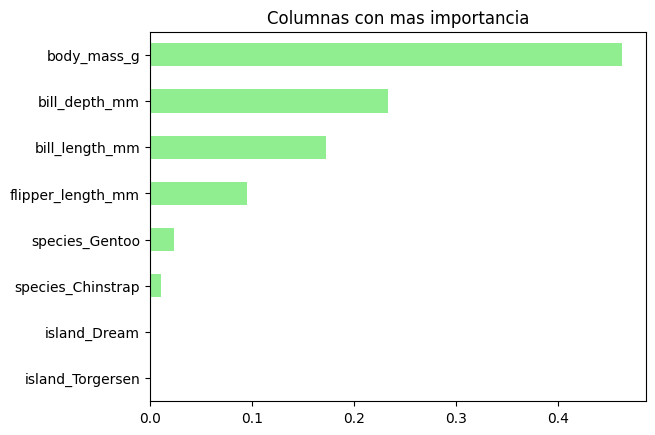

In [109]:

importancia = pd.Series(data=rfc.feature_importances_,
                        index= X_train.columns)

# Sort importances
importancia_ord =importancia.sort_values()

# Draw a horizontal barplot of importances_sorted
importances_sorted.plot(kind='barh', color='lightgreen')
plt.title('Columnas con mas importancia')
plt.show()

### **Bagging**

También conocido como agregación de bootstrap, es una técnica de aprendizaje automático supervisado que se utiliza para mejorar la estabilidad y la precisión de los algoritmos de aprendizaje automático.

Funciona construyendo un conjunto de modelos base independientes. Cada modelo base se entrena en un subconjunto aleatorio de los datos de entrenamiento.

Las predicciones de los modelos base se combinan para producir una predicción final, lo que ayuda a reducir la varianza del modelo y mejorar su rendimiento general.

Parámetros:

- n_estimators: El número de modelos base que se crearán. Por defecto es 10.

- max_features: El número máximo de características que se utilizarán en cada modelo base. Por defecto es None, lo que significa que todas las características se utilizarán en cada modelo base.

- max_samples: El número máximo de muestras que se utilizarán en cada modelo base. Por ej: 10. Por default es None, lo que significa que todas las muestras se utilizarán en cada modelo base.

- bootstrap: Un valor booleano que indica si se debe utilizar el muestreo con reemplazo para crear los subconjuntos de entrenamiento de los modelos base. Por defecto es True.

- bootstrap_features: Un valor booleano que indica si se debe utilizar el muestreo con reemplazo para crear los subconjuntos de características de los modelos base. Por defecto es False.

- oob_score: Un valor booleano que indica si se debe calcular la puntuación OOB del modelo. Por defecto es False.

- warm_start: Un valor booleano que indica si se debe utilizar el estado de entrenamiento anterior del modelo para inicializar el entrenamiento del nuevo modelo. Por defecto es False.

Ventajas de Bagging:

- Reduce la varianza del modelo, lo que ayuda a prevenir el sobreajuste y mejorar la generalización.

- Reduce el sesgo del modelo al combinar múltiples modelos base independientes.

- Es relativamente simple de implementar y puede ofrecer mejoras significativas en la precisión de los modelos.

Desventajas de Bagging:

- Puede ser más lento que otros modelos, ya que implica la creación y entrenamiento de múltiples modelos base.

- Puede ser menos eficaz que otros modelos para problemas con sesgo alto, donde la combinación de modelos independientes no logra mejorar significativamente la precisión.

In [77]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier



X = penguins_filtered.drop(columns='sex_Male')

y = penguins_filtered['sex_Male']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y)

# Crear los modelos de clasificación base
knn = KNeighborsClassifier()


# Crear el modelo de bagging
bclf = BaggingClassifier(n_estimators=100, estimator = knn)

# Entrenar el modelo
bclf.fit(X_train, y_train)

predict = bclf.predict(X_test)

print(predict)

bclf.get_params()

[1 0 1 1 1 1 0 0 0 1 1 0 0 1 1 0 0 1 1 0 1 0 0 1 1 0 1 1 1 0 0 0 0 1 1 1 0
 1 0 0 1 1 1 0 1 1 0 0 0 0 1 0 1 1 1 1 0 0 0 0 0 0 1 1 1 1 1 0 1 0 1 0 0 0
 0 1 1 1 1 1 0]


{'base_estimator': 'deprecated',
 'bootstrap': True,
 'bootstrap_features': False,
 'estimator__algorithm': 'auto',
 'estimator__leaf_size': 30,
 'estimator__metric': 'minkowski',
 'estimator__metric_params': None,
 'estimator__n_jobs': None,
 'estimator__n_neighbors': 5,
 'estimator__p': 2,
 'estimator__weights': 'uniform',
 'estimator': KNeighborsClassifier(),
 'max_features': 1.0,
 'max_samples': 1.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

### **AdaBoosting()**
Adaboosting, también conocido como aprendizaje adaptativo por refuerzo, es un metaalgoritmo de aprendizaje automático que se utiliza para mejorar la precisión de los modelos de aprendizaje automático, especialmente en problemas de clasificación.

Funciona combinando un conjunto de modelos base débiles para crear un modelo fuerte. Los modelos base débiles son modelos que tienen un rendimiento inferior al azar. Por ejemplo, un árbol de decisión con poca profundidad podría considerarse un modelo base débil. Sin embargo, cuando se combinan, pueden producir un modelo con un rendimiento superior al de los modelos base individuales.

Durante el entrenamiento, AdaBoost asigna pesos a las muestras de los datos de entrenamiento. Aquellas que son clasificadas incorrectamente por un modelo base se les asignan pesos más altos en el siguiente modelo base. Esto ayuda a que los modelos base futuros se centren en las muestras que son más difíciles de clasificar, lo que puede llevar a un mejor rendimiento del modelo final.

Parametros:

- n_estimators: Número de modelos base que se crearán. Por defecto es 50.

- learning_rate: Tasa de aprendizaje. El valor predeterminado es 1.

- algorithm: SAMME, SAMME.R. El algoritmo de base determina cómo se combinan las predicciones de los modelos base. El algoritmo SAMME es el algoritmo de base predeterminado y generalmente es una buena opción. 
El algoritmo SAMME.R puede ser más preciso en algunos casos, pero puede ser más lento para entrenar.

- loss: linear, square. Este parámetro determina la función de pérdida utilizada al actualizar los pesos de las muestras durante el entrenamiento.

Ventajas de Adaboosting:

- - Puede mejorar la precisión de los modelos de aprendizaje automático débiles, lo que lo hace útil en una variedad de aplicaciones de clasificación.
Es relativamente simple de implementar en comparación con algunos otros métodos de ensemble más complejos.

Desventajas de Adaboosting:

- Puede ser sensible al ruido en los datos de entrenamiento, lo que significa que el rendimiento podría degradarse si los datos contienen demasiado ruido o errores.
- Puede ser lento para entrenar en grandes conjuntos de datos debido a la creación secuencial de modelos base y la actualización de pesos en cada iteración

In [87]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

X = penguins_filtered.drop(columns='sex_Male')

y = penguins_filtered['sex_Male']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

# Crear el modelo
dtc = DecisionTreeClassifier()

# Instantiate ada

ada_dtc = AdaBoostClassifier(estimator=dtc, n_estimators=50, learning_rate=1.0)

# Fit ada to the training set

ada_dtc.fit(X_train, y_train)


# Compute the probabilities of obtaining the positive class
ada_pred = ada_dtc.predict(X_test)

print(ada_pred)


[0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 1 1 1 1 1 1 1 0 1 0 0 0 0 0
 1 1 1 1 0 0 1 1 1 1 1 0 0 1 1 1 0 0 0 0 1 0 0 0 1 0 1 1 0 1 1 0 0 0 1 0 1
 1 1 0 1 0 0 1]


### **Stacking()**
También conocido como "aprendizaje jerárquico", Stacking es un metaalgoritmo de aprendizaje automático que se utiliza para mejorar la precisión de los modelos de aprendizaje automático combinando las predicciones de varios modelos.

Parámetros:

- estimators: Representa la cantidad de modelos base o estimadores que se utilizarán en el proceso de Stacking.

- final_estimator: Especifica el tipo de modelo que se utilizará como metaaprendizaje para combinar las predicciones de los modelos base.

- cv: Número de particiones para validación cruzada, que se utiliza para entrenar los modelos base y el modelo de metaaprendizaje.

Conformación del modelo de stacking:

El modelo de Stacking se compone de dos partes:

- Modelos base: Estos modelos de aprendizaje automático se utilizan para generar predicciones que luego se utilizarán para entrenar el modelo de metaaprendizaje.

- Modelo de metaaprendizaje: Utiliza las predicciones de los modelos base para generar la predicción final, lo que ayuda a mejorar la precisión general del modelo.

Estas actualizaciones proporcionan una visión más detallada de los parámetros y la estructura del modelo de Stacking, lo que facilita su comprensión y aplicación en el contexto de aprendizaje automático.

In [93]:
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

X = penguins_filtered.drop(columns='sex_Male')

y = penguins_filtered['sex_Male']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

# Crear los modelos base
dtc_1 = DecisionTreeClassifier()
dtc_2 = KNeighborsClassifier()


lr = LogisticRegression()

# Crear el modelo de stacking
sclf = StackingClassifier(estimators= [('Decision_tree', dtc_1), ('KN_Clasi', dtc_2)], final_estimator=lr, cv=5)

# Entrenar el modelo
sclf.fit(X_train, y_train)

sclf_pred = sclf.predict(X_test)

print(sclf_pred)
sclf.get_params()



[0 0 1 0 1 0 1 0 0 0 1 1 1 1 0 1 1 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 0 1 1
 0 0 1 0 1 1 0 0 0 1 0 0 0 0 1 1 1 0 0 0 1 1 1 1 1 0 0 1 0 1 0 1 0 1 0 1 1
 0 1 1 1 0 1 0]


{'cv': 5,
 'estimators': [('Decision_tree', DecisionTreeClassifier()),
  ('KN_Clasi', KNeighborsClassifier())],
 'final_estimator__C': 1.0,
 'final_estimator__class_weight': None,
 'final_estimator__dual': False,
 'final_estimator__fit_intercept': True,
 'final_estimator__intercept_scaling': 1,
 'final_estimator__l1_ratio': None,
 'final_estimator__max_iter': 100,
 'final_estimator__multi_class': 'auto',
 'final_estimator__n_jobs': None,
 'final_estimator__penalty': 'l2',
 'final_estimator__random_state': None,
 'final_estimator__solver': 'lbfgs',
 'final_estimator__tol': 0.0001,
 'final_estimator__verbose': 0,
 'final_estimator__warm_start': False,
 'final_estimator': LogisticRegression(),
 'n_jobs': None,
 'passthrough': False,
 'stack_method': 'auto',
 'verbose': 0,
 'Decision_tree': DecisionTreeClassifier(),
 'KN_Clasi': KNeighborsClassifier(),
 'Decision_tree__ccp_alpha': 0.0,
 'Decision_tree__class_weight': None,
 'Decision_tree__criterion': 'gini',
 'Decision_tree__max_depth': N

### **VotingClassifier**

Es un meta-estimador de scikit-learn que combina múltiples clasificadores de aprendizaje automático y utiliza sus predicciones para calcular una predicción final. Este enfoque puede mejorar el rendimiento general del modelo al combinar las fortalezas de varios clasificadores.

Los clasificadores de votación pueden ser útiles cuando se trabaja con un conjunto diverso de modelos de clasificación, cada uno con sus propias ventajas y desventajas.

- Hard Voting: En este enfoque, cada clasificador contribuye con un voto y la clase predicha es la que obtiene la mayoría de votos.

- Soft Voting: En este enfoque, se tienen en cuenta las probabilidades de clase predichas por cada clasificador, y se realiza una combinación ponderada de estas probabilidades para generar la predicción final.

In [112]:
from sklearn.metrics import accuracy_score

# Instantiate knn
knn =KNeighborsClassifier(n_neighbors=27)

# Instantiate dt
dt = DecisionTreeClassifier(min_samples_leaf=0.13)

# Define the list classifiers
classifiers = [('KN_Clasi', knn), ('Decision Tree', dt)]


for clf_name, clf in classifiers:    
 
    # Fit clf to the training set
    clf.fit(X_train, y_train)    
   
    # Predict y_pred
    y_pred = clf.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test,y_pred) 
   
    # Evaluate clf's accuracy on the test set
    print('{:s} : {:.3f}'.format(clf_name, accuracy))


    # Import VotingClassifier from sklearn.ensemble
from sklearn.ensemble import VotingClassifier

# Instantiate a VotingClassifier vc
vc = VotingClassifier(estimators=classifiers)     

# Fit vc to the training set
vc.fit(X_train, y_train)   

# Evaluate the test set predictions
y_pred = vc.predict(X_test)

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
print('Voting Classifier: {:.3f}'.format(accuracy))

KN_Clasi : 0.765
Decision Tree : 0.827
Voting Classifier: 0.778


## **Outliers**

## **IsolationForest()**

Es un algoritmo de detección de anomalías basado en árboles de decisión. Funciona aislando las anomalías en el conjunto de datos

IsolationForest es conocido por ser rápido y eficiente, lo que lo hace adecuado para detectar anomalías en grandes conjuntos de datos.

Ventajas y desventajas: Sería útil incluir una discusión sobre las ventajas y desventajas de IsolationForest en comparación con otros algoritmos de detección de anomalías. Por ejemplo, una ventaja es su capacidad para manejar conjuntos de datos grandes, pero una desventaja podría ser su sensibilidad a la dimensionalidad de los datos.

Tiene los siguientes argumentos:

- n_estimators = El número de árboles de decisión que se utilizarán. El valor predeterminado es 100.

- max_samples = El número máximo de muestras que se utilizarán para entrenar cada árbol de decisión. El valor predeterminado es None, que significa que se utilizarán todas las muestras.

- max_depth = La profundidad máxima de cada árbol de decisión. El valor predeterminado es None, que significa que los árboles de decisión crecerán hasta alcanzar sus hojas.

- contamination = La proporción esperada de anomalías en el conjunto de datos. El valor predeterminado es 0.1, que significa que se espera que el 10% de las observaciones sean anomalías.

- random_state = La semilla para el generador de números aleatorios. El valor predeterminado es None, que significa que se utilizará una semilla aleatoria.

- bootstrap = Indica si se utilizará la remuestreo con reemplazo para entrenar los árboles de decisión. El valor predeterminado es False.

- sample_weight = Los pesos de las muestras. Las muestras con pesos más altos tendrán más influencia en el entrenamiento del modelo.

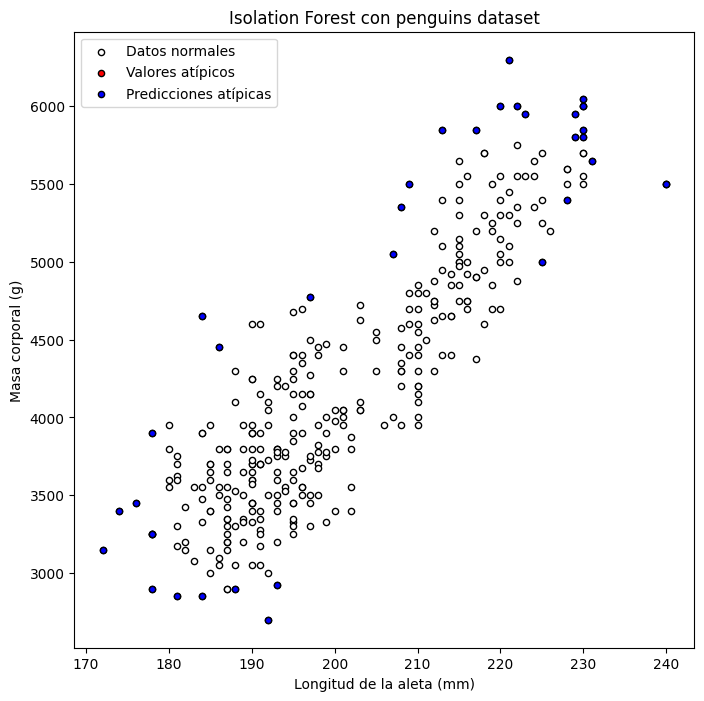

In [195]:
from sklearn.ensemble import IsolationForest

# Seleccionar dos características para simplificar la visualización
X_train = penguins[['flipper_length_mm', 'body_mass_g']].values

# Agregar algunos valores atípicos
outliers = np.array([[230, 6000], [240, 5500]])
X_train = np.vstack([X_train, outliers])

# Entrenar el modelo Isolation Forest
clf = IsolationForest(contamination=0.1, random_state=42)
clf.fit(X_train)

# Predecir valores atípicos
y_pred = clf.predict(X_train)

# Visualizar los resultados
plt.figure(figsize=(8, 8))

# Plot de los datos normales
plt.scatter(X_train[:, 0], X_train[:, 1], c='white', edgecolor='k', s=20, label='Datos normales')

# Plot de los valores atípicos
plt.scatter(outliers[:, 0], outliers[:, 1], c='red', edgecolor='k', s=20, label='Valores atípicos')

# Plot de las predicciones del modelo
plt.scatter(X_train[y_pred == -1, 0], X_train[y_pred == -1, 1], c='blue', edgecolor='k', s=20, label='Predicciones atípicas')

plt.title('Isolation Forest con penguins dataset')
plt.xlabel('Longitud de la aleta (mm)')
plt.ylabel('Masa corporal (g)')
plt.legend()
plt.show()

### **LocalOutlierFactor()**

El algoritmo calcula la densidad local de cada observación y asigna un puntaje de anomalía a cada una, lo que permite identificar las observaciones más atípicas en el conjunto de datos.

Las observaciones con un puntaje de anomalía alto se consideran más propensas a ser anomalías en comparación con las que tienen puntajes más bajos.

El algoritmo LocalOutlierFactor es especialmente efectivo para detectar anomalías en conjuntos de datos de alta dimensión, donde otros métodos pueden tener dificultades.

Tiene los siguientes argumentos con sus respectivos valores por defecto:

Tiene los siguientes argumentos:

- n_neighbors = El número de vecinos que se utilizarán para calcular la densidad local. El valor predeterminado es 20.

- metric = La métrica que se utilizará para calcular la distancia entre las observaciones. Las opciones son "euclidean", "manhattan", "minkowski", y "chebyshev". Por default es "euclidean".

- p = El exponente que se utilizará para calcular la distancia minkowski. El valor predeterminado es 2.

- novelty = Indica si el algoritmo se utilizará para detectar anomalías o nuevas observaciones.Por default es False

- algorithm = El algoritmo que se utilizará para calcular la densidad local. Las opciones son:  "auto", "ball_tree", "kd_tree", y "brute". Por default es "auto".

- contamination = La proporción esperada de anomalías en el conjunto de datos. Por default es 0.1, 

- n_jobs = El número de trabajos paralelos que se utilizarán para calcular la densidad local. Por default es 1.

Ventajas y desventajas: Se podría incluir información sobre las ventajas y desventajas del algoritmo LocalOutlierFactor en comparación con otros métodos de detección de anomalías.

Interpretación de los resultados: Sería útil proporcionar orientación sobre cómo interpretar los puntajes de anomalía calculados por el algoritmo, y cómo establecer un umbral para identificar las observaciones como anomalías basadas en estos puntajes.

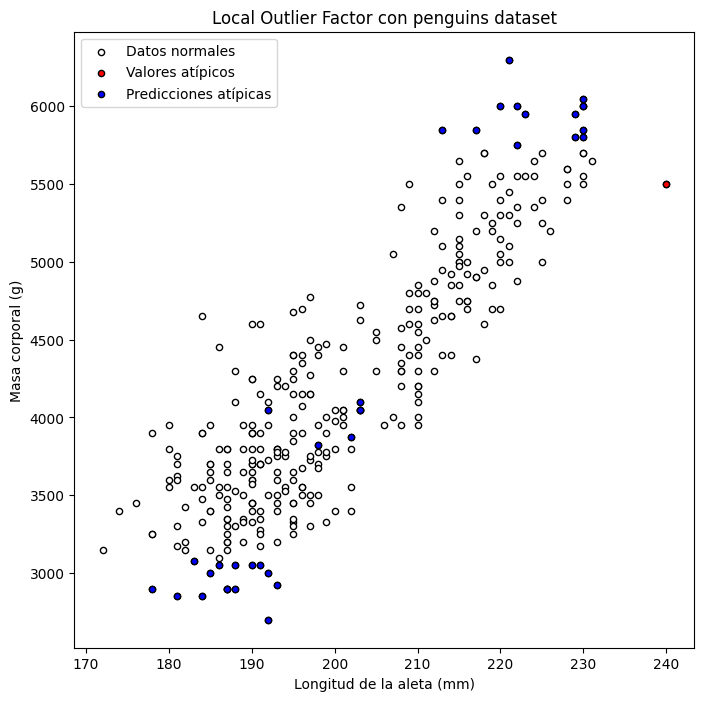

In [200]:
from sklearn.neighbors import LocalOutlierFactor

# Seleccionar dos características para simplificar la visualización
X_train = penguins[['flipper_length_mm', 'body_mass_g']].values

# Agregar algunos valores atípicos
outliers = np.array([[230, 6000], [240, 5500]])
X_train = np.vstack([X_train, outliers])

# Entrenar el modelo Local Outlier Factor
lof = LocalOutlierFactor(contamination=0.1)
y_pred = lof.fit_predict(X_train)

# Visualizar los resultados
plt.figure(figsize=(8, 8))

# Plot de los datos normales
plt.scatter(X_train[:, 0], X_train[:, 1], c='white', edgecolor='k', s=20, label='Datos normales')

# Plot de los valores atípicos
plt.scatter(outliers[:, 0], outliers[:, 1], c='red', edgecolor='k', s=20, label='Valores atípicos')

# Plot de las predicciones del modelo
plt.scatter(X_train[y_pred == -1, 0], X_train[y_pred == -1, 1], c='blue', edgecolor='k', s=20, label='Predicciones atípicas')

plt.title('Local Outlier Factor con penguins dataset')
plt.xlabel('Longitud de la aleta (mm)')
plt.ylabel('Masa corporal (g)')
plt.legend()
plt.show()


### **OneClassSVM**

OneClassSVM es un algoritmo de detección de anomalías basado en máquinas de vectores de soporte.

- El algoritmo aprende un modelo que representa el conjunto de datos normales.

- Las observaciones que no se encuentran dentro del modelo se consideran anomalías. 

- El algoritmo OneClassSVM es bueno para detectar anomalías en conjuntos de datos de baja dimensión.

Tiene los siguientes argumentos:

- kernel = El kernel que se utilizará para el algoritmo SVM. Las opciones son "linear", "poly", "rbf", "sigmoid", y "precomputed".Por default es "linear".

- gamma = El parámetro gamma para el kernel rbf. Por default es "auto".

- nu = El parámetro nu para el algoritmo SVM. Por default es 0.5.

- tol = La tolerancia para el algoritmo SVM. EPor default es 1e-3.

- max_iter = El número máximo de iteraciones para el algoritmo SVM. Por default es -1

- shrinking = Indica si se utilizará el factor de contracción en el algoritmo SVM.Por default es True.

- cache_size = El tamaño de la caché para el algoritmo SVM. Por default es 200.

- verbose = El nivel de verbosidad del algoritmo SVM. Por default es 0.

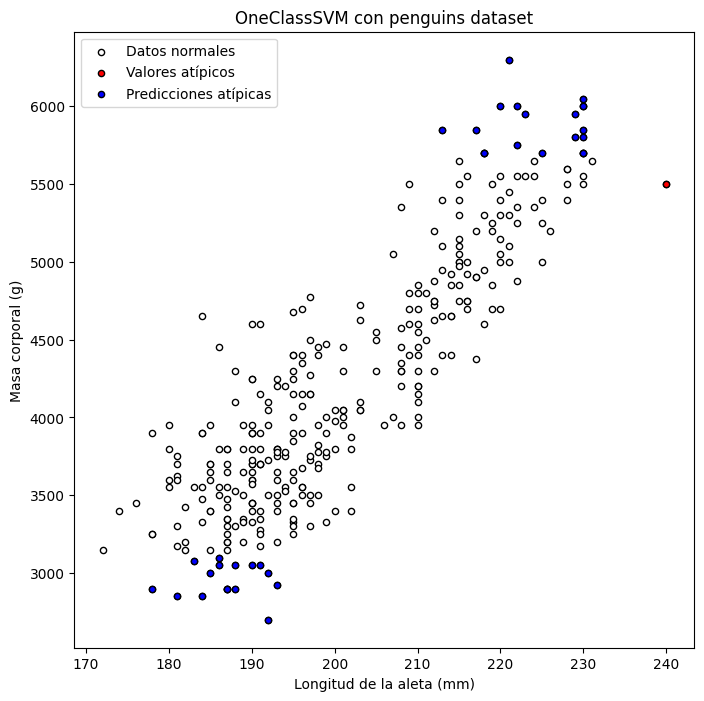

In [201]:
from sklearn.svm import OneClassSVM

# Cargar el conjunto de datos penguins

# Seleccionar dos características para simplificar la visualización
X_train = penguins[['flipper_length_mm', 'body_mass_g']].values

# Agregar algunos valores atípicos
outliers = np.array([[230, 6000], [240, 5500]])
X_train = np.vstack([X_train, outliers])

# Entrenar el modelo OneClassSVM
svm = OneClassSVM(nu=0.1)
y_pred = svm.fit_predict(X_train)

# Visualizar los resultados
plt.figure(figsize=(8, 8))

# Plot de los datos normales
plt.scatter(X_train[:, 0], X_train[:, 1], c='white', edgecolor='k', s=20, label='Datos normales')

# Plot de los valores atípicos
plt.scatter(outliers[:, 0], outliers[:, 1], c='red', edgecolor='k', s=20, label='Valores atípicos')

# Plot de las predicciones del modelo
plt.scatter(X_train[y_pred == -1, 0], X_train[y_pred == -1, 1], c='blue', edgecolor='k', s=20, label='Predicciones atípicas')

plt.title('OneClassSVM con penguins dataset')
plt.xlabel('Longitud de la aleta (mm)')
plt.ylabel('Masa corporal (g)')
plt.legend()
plt.show()


## **Manejo de clases desbalanceadas**

#### pip install imblearn

### **RandomUnderSampler()**

RandomUnderSampler es un algoritmo que se utiliza para disminuir el número de muestras de la clase mayoritaria en un conjunto de datos. 
- Esto se hace eliminando aleatoriamente muestras de la clase mayoritaria.

Desventajas
- Puede eliminar muestras importantes de la clase mayoritaria

Tiene los siguientes argumentos:

- random_state = La semilla para el generador de números aleatorios. EPor default es None, que significa que se utilizará una semilla aleatoria.

- replacement = Indica si se pueden reemplazar las muestras eliminadas. Por defaultes False, que significa que las muestras eliminadas no se pueden reemplazar.

- verbose = El nivel de verbosidad del algoritmo. Por default es 0.

- sampling_strategy= ['auto', float]. Indica el porcentaje de la cantidad de muestreo a mantener

In [209]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42,sampling_strategy='auto')

X = penguins_filtered.drop(columns='sex_Male')

y = penguins_filtered['sex_Male']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

X_train_resampled, y_train_resampled = rus.fit_resample(X_train, y_train)

# Contar la cantidad de muestras en cada clase después de aplicar RandomUnderSampler
print("Clases después de aplicar RandomUnderSampler:", np.bincount(y_train_resampled))

# Entrenar un clasificador (en este caso, un RandomForest)
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_resampled, y_train_resampled)

# Realizar predicciones en el conjunto de prueba
y_pred = clf.predict(X_test)

# Evaluar el rendimiento del modelo
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Clases después de aplicar RandomUnderSampler: [113 113]
Accuracy Score: 0.9135802469135802
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.88      0.89        32
           1       0.92      0.94      0.93        49

    accuracy                           0.91        81
   macro avg       0.91      0.91      0.91        81
weighted avg       0.91      0.91      0.91        81



### **SMOTE**
pip install imblearn

(Synthetic Minority Oversampling Technique) es un algoritmo que se utiliza para aumentar el número de muestras de la clase minoritaria en un conjunto de datos.

- Esto lo hace creando nuevas muestras sintéticas de la clase minoritaria. 

- Las muestras sintéticas se crean interpolando entre muestras minoritarias existentes.

Desventajas
- Puede crear muestras sintéticas que no sean realistas

Tiene los siguientes argumentos:

- ratio = La proporción de muestras de la clase minoritaria que se desea crear. Por default es 1.0.

- k_neighbors. El número de vecinos que se utilizarán para crear nuevas muestras sintéticas. Por default es 5.

- random_state. La semilla para el generador de números aleatorios. El valor predeterminado es None, que significa que se utilizará una semilla aleatoria

- m =  El número de puntos de muestreo que se utilizarán para crear nuevas muestras sintéticas. Por default es 5.

- kind = El tipo de interpolación que se utilizará para crear nuevas muestras sintéticas. Las opciones son "linear", "nearest", y "random". Por default es "linear".

- verbose = El nivel de verbosidad del algoritmo. Por default es 0.

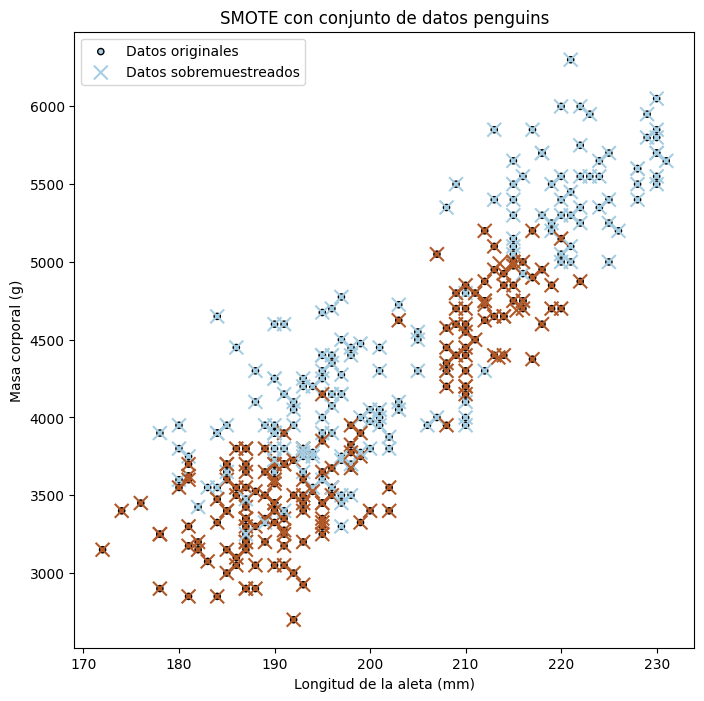

In [214]:
from imblearn.over_sampling import SMOTE

# Cargar el conjunto de datos penguins
penguins = sns.load_dataset('penguins')
penguins = penguins.dropna()

# Seleccionar dos características para simplificar la visualización
X = penguins[['flipper_length_mm', 'body_mass_g']].values
y = penguins['sex'].map({'Male': 0, 'Female': 1}).values  # Convertir las clases a valores numéricos

# Crear el objeto SMOTE
sampler = SMOTE(sampling_strategy='auto', random_state=42, k_neighbors=7)

# Aplicar el sobremuestreo
X_resampled, y_resampled = sampler.fit_resample(X, y)

# Visualizar los resultados
plt.figure(figsize=(8, 8))

# Plot de los datos originales
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap=plt.cm.Paired, s=20, label='Datos originales')

# Plot de los datos sobremuestreados
plt.scatter(X_resampled[:, 0], X_resampled[:, 1], c=y_resampled,  marker='x', cmap=plt.cm.Paired,
            s=100, label='Datos sobremuestreados')

plt.title('SMOTE con conjunto de datos penguins')
plt.xlabel('Longitud de la aleta (mm)')
plt.ylabel('Masa corporal (g)')
plt.legend()
plt.show()


### **GridSearchCV**

Es una técnica de búsqueda de hiperparámetros que se utiliza para encontrar los mejores valores para los hiperparámetros de un modelo de aprendizaje automático.

- Funciona explorando una cuadrícula de valores para los hiperparámetros del modelo

- Para cada combinación de valores de hiperparámetros, Grid Search CV entrena el modelo y evalúa su rendimiento en un conjunto de datos de validación

- El modelo con los mejores resultados en el conjunto de datos de validación se considera el modelo con los mejores hiperparámetros.

Argumentos:
- estimator	= El estimador es el modelo de aprendizaje automático que se utilizará.

- param_grid = Diccionario de parámetros.El diccionario de parámetros especifica la cuadrícula de valores que se explorarán para los hiperparámetros del modelo.

- scoring =	Función de puntuación.	La función de puntuación especifica cómo se evaluará el rendimiento del modelo.

- cv =	Número de particiones para validación cruzada.	El número de particiones para validación cruzada especifica cómo se dividirá el conjunto de datos para la validación cruzada.

- n_jobs = Número de trabajos que se utilizarán.	El número de trabajos que se utilizarán especifica cuántos procesos se utilizarán para entrenar el modelo.

In [113]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],}

gscv = GridSearchCV(
    estimator=DecisionTreeClassifier(),
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
)

# Entrenar el modelo
gscv.fit(X_train, y_train)

# Imprimir los mejores parámetros
print(gscv.best_params_)

{'max_depth': 7, 'min_samples_split': 10}


### **RandomizedSearchCV**

RandomSearchCV es una técnica de búsqueda de hiperparámetros que se utiliza para encontrar los mejores valores para los hiperparámetros de un modelo de aprendizaje automático.

- Funciona explorando aleatoriamente una cuadrícula de valores para los hiperparámetros del modelo

- Para cada combinación de valores de hiperparámetros, RandomSearchCV entrena el modelo y evalúa su rendimiento en un conjunto de datos de validación.

- El modelo con los mejores resultados en el conjunto de datos de validación se considera el modelo con los mejores hiperparámetros

Argumentos:
- estimator	= El estimador es el modelo de aprendizaje automático que se utilizará.

- param_distributions = Diccionario de parámetros.El diccionario de parámetros especifica la cuadrícula de valores que se explorarán para los hiperparámetros del modelo.

- scoring =	['accuracy, f1, precison, recall]	La función de puntuación especifica cómo se evaluará el rendimiento del modelo.

- cv =	Número de particiones para validación cruzada.	El número de particiones para validación cruzada especifica cómo se dividirá el conjunto de datos para la validación cruzada.

- n_jobs = Número de trabajos que se utilizarán. El número de trabajos que se utilizarán especifica cuántos procesos se utilizarán para entrenar el modelo.

RandomSearchCV es similar a GridSearchCV sin embargo:

Ventajas:

- Es menos costoso computacionalmente que GridSearchCV, especialmente si se utiliza un conjunto de datos grande.

- Puede explorar un espacio de búsqueda más amplio que GridSearchCV, lo que puede conducir a mejores resultados.

Desventejas

- Puede tardar más en encontrar los mejores parámetros que GridSearchCV.

- Puede ser menos estable que GridSearchCV, lo que significa que los resultados pueden variar de un experimento a otro

In [119]:
from sklearn.model_selection import RandomizedSearchCV


param_distributions = {
    'max_depth': [5, 10, 20, 30 ,50 , 70],
   'min_samples_split': [2, 4, 6 , 8 , 10 , 20]}

# Crear el objeto RandomSearchCV
rscv = RandomizedSearchCV(
    estimator=DecisionTreeClassifier(),

    param_distributions=param_distributions,

    scoring='accuracy',
    cv=5,
)

# Entrenar el modelo
rscv.fit(X_train, y_train)

# Imprimir los mejores parámetros
print(rscv.best_params_)

{'min_samples_split': 4, 'max_depth': 50}


## **Metricas**

### **Regresion**

En el aprendizaje automático de regresión, la tarea es predecir un valor continuo. Las métricas de regresión más comunes son:

- Error cuadrático medio (MSE): El MSE es la suma de los cuadrados de las diferencias entre las predicciones y los valores reales.

- Raíz del error cuadrático medio (RMSE): La RMSE es la raíz cuadrada del MSE.

- Error medio absoluto (MAE): El MAE es la suma de las diferencias absolutas entre las predicciones y los valores reales.

- R-cuadrado: El R-cuadrado es una medida de la proporción de la variación de los datos que se explica por el modelo.

En general, el MSE y la RMSE son las métricas más utilizadas para evaluar el rendimiento de los modelos de regresión.

- El MAE es una métrica más robusta que el MSE y la RMSE, ya que es menos sensible a los valores atípicos.

- El R-cuadrado es una métrica útil para evaluar el ajuste general del modelo a los datos.

In [965]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import LinearRegression

# Cargar los datos
data = load_iris()
X = data.data
y = data.target

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

# Entrenar el modelo
reg = LinearRegression()
reg.fit(X_train, y_train)

# Predecir los valores de prueba
y_pred = reg.predict(X_test)

# Calcular las métricas de regresión
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("R-cuadrado:", r2_score(y_test, y_pred))


MSE: 0.0493622249030636
RMSE: 0.2221761123592354
MAE: 0.16598669508186945
R-cuadrado: 0.930459460721928


### **Clasificacion**


In [972]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score
import numpy as np
from sklearn.datasets import load_iris


# Cargar los datos
data = load_iris()
X = data.data
y = data.target

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

# Entrenar el modelo
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# Predecir los valores de prueba
y_pred = clf.predict(X_test)

# Calcular las métricas de clasificación
print(accuracy_score(y_test, y_pred))

0.9736842105263158


In [971]:
print(confusion_matrix(y_test, y_pred))

[[15  0  0]
 [ 0 11  1]
 [ 0  1 10]]


In [968]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       0.75      0.86      0.80         7
           2       0.92      0.86      0.89        14

    accuracy                           0.92        38
   macro avg       0.89      0.90      0.90        38
weighted avg       0.93      0.92      0.92        38



### **ROC CURVE**

La curva ROC (Receiver Operating Characteristic) es una herramienta gráfica que se utiliza en problemas de clasificación binaria para evaluar el rendimiento de un modelo y explorar el equilibrio entre la sensibilidad y la especificidad. La curva representa la tasa de verdaderos positivos (sensibilidad) en el eje y y la tasa de falsos positivos (1 - especificidad) en el eje x.



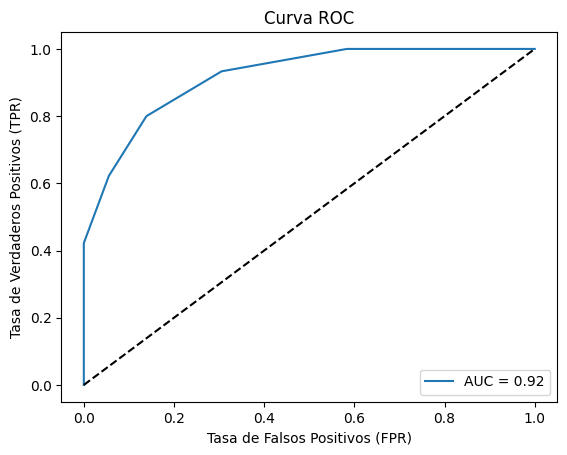

In [128]:
from sklearn.metrics import roc_curve

# Compute predicted probabilities: y_pred_prob
y_pred_prob = clf.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr,tpr,thresholds = roc_curve(y_test, y_pred_prob) #fpr = Tasa de falsos psitivos, tpr= tasa de verdaderos positivos, tresholds= umbrales

# Calculamos el Área bajo la Curva ROC (AUC)
auc = roc_auc_score(y_test, y_pred_prob)

# Graficamos la Curva ROC
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()

# **Ultima parte**

### **Implementando todo**

In [579]:
water = pd.read_csv('water_potability.csv')

### **Primer Vistazo**

In [561]:
water.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability,Hardness_min,Sulfate_min,Solids_min,Conductivity_min
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0,False,False,True,True
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0,False,False,True,True
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0,False,False,True,True
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0,False,False,True,True
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0,False,False,True,True


In [220]:
water.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [542]:
water.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [677]:
water.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

### **Imputando valores faltantes**

In [580]:
rf_estimator = RandomForestRegressor(n_estimators=100, max_depth=15, criterion='poisson', min_samples_split=3) 

imputer_rf = IterativeImputer(estimator=rf_estimator, max_iter=20, tol=0.01)

columns = water.columns.to_list()

# Aplicar el imputador iterativo al DataFrame
imputed_rf = pd.DataFrame(imputer_rf.fit_transform(water), columns=columns)

In [573]:
imputed_rf.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

### **Estandarizar los datos**

In [581]:
potability = imputed_rf['Potability']
imputed_rf = imputed_rf.drop(columns='Potability')

In [583]:
columns = imputed_rf.columns

In [584]:
from sklearn.preprocessing import MinMaxScaler

min_max = MinMaxScaler(copy=True)

imputed_rf_scaled = min_max.fit_transform(imputed_rf)

In [585]:
imputed_rf_scaled = pd.DataFrame(imputed_rf_scaled)
imputed_rf_scaled.columns = columns             

In [587]:
imputed_rf_scaled = pd.concat([imputed_rf_scaled, potability], axis=1)

In [588]:
imputed_rf_scaled.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,0.522178,0.571139,0.336096,0.543891,0.680385,0.669439,0.313402,0.699753,0.286091,0.0
1,0.265434,0.297400,0.300611,0.491839,0.561423,0.719411,0.497319,0.450999,0.576793,0.0
2,0.578509,0.641311,0.321619,0.698543,0.545263,0.414652,0.562017,0.532866,0.303637,0.0
3,0.594055,0.605536,0.356244,0.603314,0.647347,0.317880,0.622089,0.808065,0.601015,0.0
4,0.649445,0.484851,0.289922,0.484900,0.514545,0.379337,0.358555,0.253606,0.496327,0.0


### **Buscando correlaciones**

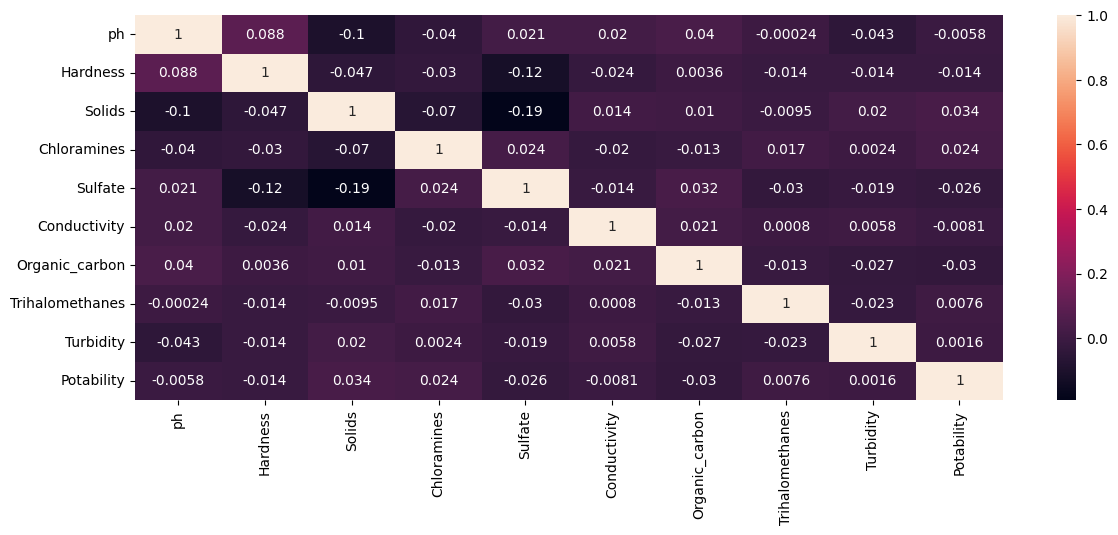

In [589]:
fig = plt.figure(figsize=(14,5))
sns.heatmap(imputed_rf_scaled.corr(), annot=True, cmap='rocket')
plt.show()

### **Entrenamiento y modelado**

In [695]:
X = imputed_rf_scaled.drop(columns='Potability')
y = imputed_rf_scaled['Potability']

In [689]:
y.value_counts()

Potability
0.0    1998
1.0    1278
Name: count, dtype: int64

### Utilizando SMOTE para balancear los datos

In [690]:
from imblearn.over_sampling import SMOTE
# Crear el objeto SMOTE
sampler = SMOTE(sampling_strategy='minority', random_state=42, k_neighbors=5)

# Aplicar el sobremuestreo
X_resampled, y_resampled = sampler.fit_resample(X, y)

In [691]:
y_resampled.value_counts()

Potability
0.0    1998
1.0    1998
Name: count, dtype: int64

In [692]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, random_state=42)

In [693]:
rf = RandomForestClassifier()

rf.fit(X_train, y_train)

predict = rf.predict(X_test)

In [694]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

print(accuracy_score(y_test, predict))

print(classification_report(y_test, predict))

0.7737737737737738
              precision    recall  f1-score   support

         0.0       0.76      0.80      0.78       494
         1.0       0.79      0.75      0.77       505

    accuracy                           0.77       999
   macro avg       0.77      0.77      0.77       999
weighted avg       0.77      0.77      0.77       999



### Modelado sin balancear

In [696]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [697]:
from sklearn.model_selection import cross_val_score

rf = RandomForestClassifier()

# Evalua el clasificador utilizando validación cruzada k-folds con 5 particiones
scores = cross_val_score(rf, X_train, y_train, cv=10)

# Imprime el rendimiento del clasificador
print ("Scores de validación cruzada:")
print(scores)
print("Promedio del rendimiento:")
print(scores.mean())

Scores de validación cruzada:
[0.69512195 0.69512195 0.74796748 0.67479675 0.71138211 0.67073171
 0.71138211 0.68163265 0.73877551 0.66122449]
Promedio del rendimiento:
0.6988136718101876


In [698]:
rf = RandomForestClassifier()

rf.fit(X_train, y_train)

predict = rf.predict(X_test)

In [699]:
print(accuracy_score(y_test, predict))

print(classification_report(y_test, predict))

0.7216117216117216
              precision    recall  f1-score   support

         0.0       0.73      0.88      0.80       510
         1.0       0.70      0.46      0.55       309

    accuracy                           0.72       819
   macro avg       0.71      0.67      0.68       819
weighted avg       0.72      0.72      0.71       819

